# Modeling the Joint Distribution of Wind Speed and Direction  using Gaussain Mixture Models

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Models, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython
%R require(movMF)

from import_file import *
from helpers.parallel_helper import *
load_libs()

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0.
plt.rcParams['axes.ymargin'] = 0.
mpl.rcParams['patch.force_edgecolor'] = True

In [2]:
mpl.rcParams['legend.handlelength'] = 1.8

In [3]:
# mpl.rcParams['savefig.dpi'] = 600
# pdf_fig_size=(3.2, 2.2)
pdf_fig_size=(3.5, 2.5)

## 1.2 Read Data

In [4]:
# file_path, bandwidth= './data/NCDC/europe/uk/marham/dat.txt', 1.7
# file_path, bandwidth= './data/NCDC/europe/uk/tiree/dat.txt', 1.9
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/NCDC/europe/uk/boscombe_down/dat.txt', 1.5, 4
# file_path, bandwidth= './data/NCDC/europe/uk/middle_wallop/dat.txt', 1.3
# file_path, bandwidth= './data/NCDC/europe/uk/bournemouth/dat.txt',1.3 # 4?
# file_path= "./data/NCDC/europe/uk/weybourne/dat.txt"
# file_path= "./data/NCDC/europe/uk/skye_lusa/dat.txt" # 
# file_path= "./data/NCDC/europe/uk/wattisham/dat.txt"
# file_path= "./data/NCDC/europe/uk/south_uist_range/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/holbeach/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/cambridge/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/us/baltimore/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/bealach_na_ba/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/benbecula/dat.txt" # truncate (untruncate in m/s), 4?
# file_path= './data/NCDC/europe/uk/southhamption/dat.txt' # high 0, trend

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = "./data/NCDC/europe/germany/landsberg_lech/dat.txt", 0.9, 4 
# file_path, bandwidth= "./data/NCDC/europe/germany/neuburg/dat.txt", 0.7
# file_path, bandwidth= "./data/NCDC/europe/germany/laupheim/dat.txt", 0.7 # double peak, 4?, trend
# file_path, bandwidth= './data/NCDC/europe/germany/niederstetten/dat.txt', 0.9 # get the peak
# file_path, bandwidth= "./data/NCDC/europe/germany/holzdorf/dat.txt", 0.9 # 2008 year
# file_path,  NUMBER_OF_GAUSSIAN= './data/NCDC/europe/france/nantes/dat.txt', 4 # unit shift, one direction deviate big
# file_path= './data/NCDC/europe/france/pau_pyrenees/dat.txt'# unit shift, 2; 
# file_path= "./data/NCDC/europe/france/avord/dat.txt" # try 4, initial speed (should be good with m/s), incompete dataset
# file_path= "./data/NCDC/europe/france/vatry/dat.txt"  # double peak, initial speed, incompete dataset
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= "./data/NCDC/europe/spain/valladolid/dat.txt", 1.1, 4
# file_path= './data/NCDC/europe/spain/jerez/dat.txt' # high 0
# file_path, bandwidth= "./data/NCDC/europe/spain/barayas/dat.txt", 0.7 # not good fit
# file_path, bandwidth= './data/NCDC/europe/spain/malaga/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= './data/NCDC/europe/spain/tenerife_sur/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= './data/NCDC/europe/spain/almeria/dat.txt', 0.7 # negative dimensions?
# file_path, bandwidth= './data/NCDC/europe/greece/eleftherios_intl/dat.txt',0.7 # some direction might be blocked
# file_path= './data/NCDC/europe/ciampino/dat.txt' # try 4, bandwidth?; time irregular
# file_path= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer, 4?
# file_path= './data/NCDC/gibraltar/dat.txt' # bad fit

# MidEast
# file_path= './data/NCDC/mideast/uae/al_maktoum/dat.txt'
# file_path= './data/NCDC/mideast/uae/sharjah_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/dubai_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/abu_dhabi_intl/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/uae/bateen/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/buraimi/dat.txt' # not good dataset
# file_path= './data/NCDC/mideast/turkey/konya/dat.txt' 
# file_path= './data/NCDC/mideast/turkey/sivas/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/balikesir/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/bartin/dat.txt' # bad dataset

# file_path, bandwidth = "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt", 0.6
# file_path, bandwidth= "./data/NCDC/cn/shanghai/pudong/dat.txt", 0.8
# file_path, bandwidth= "./data/NCDC/cn/hefei_luogang/dat.txt", 0.6 # few 0, trend
# file_path, bandwidth= "./data/NCDC/cn/nanjing_lukou/dat.txt", 0.5
# file_path= "./data/NCDC/cn/zhengzhou_xinzheng/dat.txt" 
# file_path= "./data/NCDC/cn/tianjin/binhai/dat.txt" # few 0, trend, stationary speed, unstationary direction
# file_path= "./data/NCDC/cn/tianjin/tianjing/dat.txt" # 16 sectors
# file_path= "./data/NCDC/cn/shijiazhuang_zhengding/dat.txt" 
# file_path= "./data/NCDC/cn/henan_gushi/dat.txt" # 16 sectors, fit not very good
# file_path= "./data/NCDC/cn/nanning_wuxu/dat.txt" # unstationary speed
# file_path= './data/NCDC/cn/macau/dat.txt'  
# file_path= "./data/NCDC/cn/hk_intl/dat.txt" # few 0
# file_path= './data/NCDC/cn/gaoqi/dat.txt' 

# file_path= './data/NCDC/southeast_asia/malaysia/mersing/dat.txt' # 2 mode, paper comparison
# file_path= './data/NCDC/southeast_asia/malaysia/penang/dat.txt'
# file_path= './data/NCDC/southeast_asia/malaysia/butterworth/dat.txt' # 2 mode 
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_mahmud/dat.txt" # stable
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_ismail/dat.txt" # 
# file_path= "./data/NCDC/southeast_asia/singapore/changi/dat.txt" # trend, no 0, questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/paya_lebar/dat.txt" # questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/seletar/dat.txt"
# file_path= "./data/NCDC/east_asia/cheongju_intl/dat.txt" # 2005-2009  may have problem, fit is good; numpy problem
# file_path= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year may have problem, but fit is generally good; numpy problem

# file_path, bandwidth= "./data/NCDC/oceania/auckland_intl/dat.txt", 0.9  # Good data, double mode
# file_path= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" # high 0, few data 
# file_path= "./data/NCDC/oceania/narrandera/dat.txt" # high 0, few data
# file_path, bandwidth= "./data/NCDC/oceania/canberra/dat.txt", 0.7 # high 0, bad fit
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= './data/NCDC/oceania/horsham/dat.txt', 0.9, 4 # get the peak

# file_path, bandwidth= './data/NCDC/us/boston_16nm/dat.txt', 0.9 # Offshore, mixed type

# file_path= 'D:/data/NCDC/altdorf/dat.txt' 
# file_path= 'D:/data/NCDC/san_fran_bay_reserve/dat.txt'
# file_path= 'D:/data/NCDC/veracurz_harbor/dat.txt', # Dir problem
# file_path= 'D:/data/NCDC/senj/dat.txt', # Bad dir, may be update in recent years?
# file_path= 'D:/data/NCDC/leninogorsk/dat.txt', # Bad dir

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/asos/minneapolis_MN/hr_avg.csv', 1.1, 4
# file_path, bandwidth, NUMBER_OF_GAUSSIAN  = './data/asos/bismarck_ND/hr_avg.csv', 1.1, 4
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/asos/aberdeen_SD/hr_avg.csv', 1.7, 2 # only to 2012
# file_path, bandwidth = './data/asos/lincoln_NE/hr_avg.csv', 0.9
# file_path, bandwidth = './data/asos/des_moines_IA/hr_avg.csv', 1.3
# file_path, bandwidth = './data/asos/springfield_IL/hr_avg.csv', 1.1 
# file_path, bandwidth = './data/asos/denver/hr_avg.csv', 1.3
# file_path= 'D:/data/asos/olympia_WA/hr_avg.csv'
# file_path= 'D:/data/asos/olympia_WA/minute_avg.csv'
# file_path= 'D:/data/asos/topeka_KS/hr_avg.csv' # High 0
# file_path, bandwidth = 'D:/data/asos/topeka_KS/minute_avg.csv', 0.9 

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/NDAWN/baker/hr_avg.csv', 0.7, 4 
# file_path, bandwidth = './data/NDAWN/dickinson/hr_avg.csv', 0.6
# file_path = './data/NDAWN/rugby/hr_avg.csv'
# file_path = './data/NDAWN/bowman/hr_avg.csv'
# file_path = './data/NDAWN/grand_forks/hr_avg.csv'
# file_path = './data/NDAWN/williston/hr_avg.csv'
# file_path = './data/NDAWN/jamestown/hr_avg.csv'

# file_path= 'data/ECMWF/yemen/13N42E/dat.csv'
# file_path= 'data/ECMWF/spain/28N16W/dat.csv'
# file_path= 'data/ECMWF/usa/56N88W/dat.csv'
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= 'data/ECMWF/usa/38N122W/dat.csv', 0.7, 4
# file_path= 'data/ECMWF/usa/47N123W/dat.csv'
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = 'data/ECMWF/usa/47N123W/dat.csv', 0.4, 4 #good
# file_path, bandwidth = 'data/ECMWF/usa/48.75N98.25W/dat.csv', 0.8# Olga, good accordance; might have overfitting problem in 4
# file_path, bandwidth= 'data/ECMWF/venezuela/8N67W/dat.csv', 0.3 # good, but the data might be problematic.
# file_path = 'D:/ECMWF/8N68W/dat.csv' 
# file_path = 'D:/ECMWF/9N68W/dat.csv' 
# file_path, bandwidth = 'data/ECMWF/chile/52S75W/dat.csv', 1.1 # good
# file_path, bandwidth = 'data/ECMWF/iceland/65N17W/dat.csv', 1.1 # good
# file_path, NUMBER_OF_GAUSSIAN  = 'data/ECMWF/germany/49N9E/dat.csv', 4 # good
# file_path, bandwidth= 'data/ECMWF/sudan/18N32E/dat.csv', 0.5 # good, good for angular linear
# file_path= 'data/ECMWF/china/24N121E/dat.csv'# good
# file_path, NUMBER_OF_GAUSSIAN, bandwidth= 'data/ECMWF/china/20N120E/dat.csv', 2, 1.1 # China East Sea
# file_path, NUMBER_OF_GAUSSIAN, bandiwdth = 'data/ECMWF/australia/37S142E/dat.csv', 5, 0.5

# file_path= 'd:/data/ECMWF/28.5N16.5W/dat.csv' # Tenerife

file_path, NUMBER_OF_GAUSSIAN, bandwidth= 'data/portus/cabo_de_gata/dat.csv', 4, 0.7 # need to remove 0 speed
# file_path = 'd:/data/portus/alboran/dat.csv' # problem data

# USA Comparison
# file_path = 'd:/data/ECMWF/47.25N102.75W/dat.csv' # Green R, good accordance
# file_path= 'd:/data/ECMWF/48N103W/dat.csv' # Ray W, bag accordance

# Comparison with On the select of ...
# file_path= 'data/ECMWF/greece/38N25E/dat.csv' # Andors, good accordance, good
# file_path= 'D:/data/ECMWF/36N25E/dat.csv' # Crete, bad accordance
# file_path= 'D:/data/ECMWF/37N22E/dat.csv' # Pylos, general good accordance
# file_path= 'data/ECMWF/greece/38N25E/dat.csv' # Zak, bad accordance
# file_path= 'D:/data/ECMWF/36.75N2.25W/dat.csv' # Cabo de Gata, general good accordance
# file_path= 'data/ECMWF/portugal/36N5W/dat.csv' # Mar de Alboran, bad accordance

# US offshore
# file_path = 'D:/data/NDBC/46086/10_min.csv' # strong directionality
# file_path = 'D:/data/NDBC/42057/10_min.csv' # strong directionality
# file_path = 'D:/data/NDBC/46014/10_min.csv' # strong directionality, too weird
# file_path = 'D:/data/NDBC/cdrf1/10_min.csv' 
# file_path = 'D:/data/NDBC/46081/10_min.csv'  # strong directionality
# file_path = 'D:/data/NDBC/44013/10_min.csv' 

# file_path = 'D:/data/ECMWF/32N118W/dat.csv' #46086
# file_path = 'D:/data/ECMWF/17N81W/dat.csv' # 42057
# file_path = 'D:/data/ECMWF/39N124W/dat.csv' # 46014
# file_path = 'D:/data/ECMWF/29N83W/dat.csv' #cdrf1
# file_path = 'D:/data/ECMWF/61N148W/dat.csv' #46081, big difference with NDBC
# file_path = 'D:/data/ECMWF/42N71W/dat.csv' #44013

In [5]:
if "cn_database" in file_path: 
    df = read_cn_database(file_path)
elif 'NCDC' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed','wind_type']]
    integer_data = True
    detect_sample_time = True
elif 'NDAWN' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    integer_data = False
    convert_to_knot = False
elif 'asos' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    integer_data = False # may have some problem
    knot_unit = True
    convert_to_knot = False
elif 'NDBC' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    integer_data = False
    convert_to_knot = False
    BIN_WIDTH=0.5
elif 'portus' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True)
    df['time']=pd.to_datetime(df['time'])
    df['date']=df['time'].dt.strftime('%Y%m%d').astype(int)
    df['HrMn']=df['time'].dt.strftime('%H00')
    integer_data = False
    convert_to_knot = False
    BIN_WIDTH=0.5
else:
    # ECMWF
    df = pd.read_csv(file_path, header=0, skipinitialspace=True)
    df.rename(columns={'U':'x','V':'y'}, inplace=True)
    df.x, df.y=-df.x, -df.y
    df['speed']=np.sqrt(df.x**2+df.y**2)
    df['dir']=np.degrees(np.arctan2(df.y, df.x))%360
    df['time']=pd.to_datetime('1979-01-01T00:00:00Z')+pd.to_timedelta(df['time'], unit='h')
    df['date']=df['time'].dt.strftime('%Y%m%d').astype(int)
    df['HrMn']=df['time'].dt.strftime('%H00')
    integer_data = False
    cartesian = True
    convert_to_knot = False
    BIN_WIDTH=0.5

In [6]:
df.dropna(subset=['dir','speed'], inplace=True)
if 'knot_unit' not in globals():
    knot_unit = False
if 'cartesian' not in globals():
    cartesian = False
if not {'type', 'wind_type'}.issubset(df.columns):
    df['type']='default'
    df['wind_type']='default'
if 'detect_sample_time' not in globals():
    detect_sample_time = False
if 'BIN_WIDTH' not in globals():
    BIN_WIDTH = 1
df.head()

time  speed    dir      date  HrMn     type wind_type
0 2006-01-01 00:00:00    9.1  250.0  20060101  0000  default   default
1 2006-01-01 01:00:00    7.7  239.0  20060101  0100  default   default
2 2006-01-01 02:00:00    2.8  244.0  20060101  0200  default   default
3 2006-01-01 03:00:00    4.4  230.0  20060101  0300  default   default
4 2006-01-01 04:00:00    5.1  258.0  20060101  0400  default   default

In [7]:
if 'NCDC' in file_path:
    lat, long = get_lat_long(file_path)
    print(lat,long)
    map_osm = folium.Map(location=[lat, long], zoom_start=4)
    folium.Marker([lat, long]).add_to(map_osm)
    display(map_osm)

In [8]:
df['time']=pd.to_datetime(df["date"].astype(str).map(str) + df["HrMn"], format='%Y%m%d%H%M')
df.set_index(['time'], inplace=True)
df['HrMn']=df['HrMn'].astype(int)
df = df.query("(dir <= 999) & (speed < 99) ")['1970':'2016']

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


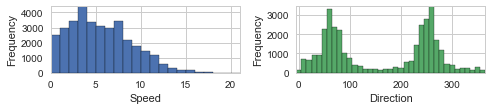

In [9]:
plot_speed_and_angle_distribution(df.speed, df.dir)

In [10]:
# Dir [10,360]=> [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360 if x < 999 else x) 
# Convert Windrose coordianates to Polar Cooridinates 
if cartesian == True:
    df['dir_windrose'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
else:
    df['dir_windrose'] = df['dir']
    df['dir'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
display(df.describe())
df.plot(y='speed',legend=True,figsize=(20,5))

speed           dir          date          HrMn  dir_windrose
count  34115.000000  34115.000000  3.411500e+04  34115.000000  34115.000000
mean       5.501375    137.779540  2.008465e+07   1149.397626    161.625121
std        3.406453     98.942513  1.672337e+04    692.130641    100.279183
min        0.000000      0.000000  2.006010e+07      0.000000      0.000000
25%        2.800000     34.000000  2.007062e+07    500.000000     64.000000
50%        5.100000    172.000000  2.008101e+07   1100.000000    180.000000
75%        7.700000    206.000000  2.010091e+07   1700.000000    253.000000
max       20.600000    358.000000  2.011123e+07   2300.000000    357.000000

In [11]:
if "portus" in file_path: 
    df = df.query('speed >0 ')
    N_VM_DIR = 5
    N_VM_PHI = 2
else:
    N_VM_DIR = 4
    N_VM_PHI = 3

In [12]:
# if "portus" in file_path: 
#     df['dir'] = df['dir_windrose']

## 1.3 General Data Info

### 1.3.1 Unit Detection

False


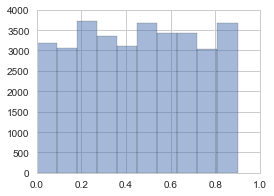

In [13]:
df['decimal'] = df.speed % 1
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4, 3))

if 'convert_to_knot' not in globals():
    convert_to_knot = True if len(df.query('decimal >= 0.2')) / len(df) > 0.3 else False
    
if convert_to_knot:
    knot_unit = True
    df['speed'] = df['speed'] * 1.943845
    df['decimal'] = df.speed % 1
    df.decimal.hist(alpha=0.5, label='knot')
    # need more elaboration, some is not near an integer
    if integer_data:
        df['speed'] = df['speed'].apply(lambda x: int(round(x)))
    plt_configure(xlabel='Decimal', ylabel='Frequency', legend={'loc': 'best'}, title='Decimal Distribution')
    
df.drop(['decimal'], 1,inplace=True)
print(knot_unit)

In [14]:
dir_unit_text = ' (degree)'
if knot_unit == True:
    speed_unit_text = ' (knot)'
    bare_speed_unit_text = ' knot'
    dir_power_density_unit=''
    speed_power_density_unit=''
else: 
    speed_unit_text = ' (m/s)'
    bare_speed_unit_text = ' m/s'
    dir_power_density_unit=' (W/(m$^2$rad))'
    speed_power_density_unit=' (W/(m$^3$/s))'

### 1.3.2 Sampling Type Selection

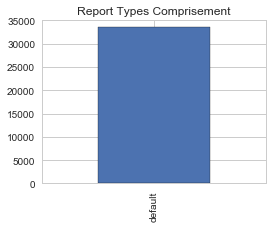

In [15]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement', figsize=(4,3))

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.3.3 Sampling Time Selection

In [16]:
MID_YEAR = int(np.average(df.index.year))

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5,label='Overall')
df[str(MID_YEAR):]['HrMn'].value_counts().sort_index().plot(
    kind='bar', alpha=0.5, label='>= %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 4), 
              title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

In [17]:
if detect_sample_time:
    df['sample_time'] = df.HrMn % 100 
    sample_time = df['2000':]['sample_time']
    sample_times = sample_time.value_counts()[sample_time.value_counts() > 1000]
    sample_times = sample_times.index.tolist()
    # df = df.query("sample_time in @sample_times")
    df = df.query("sample_time == @sample_times[0]")
    df.drop(['sample_time'], 1,inplace=True)
    print(sample_times)

    df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5, figsize=(10, 4))
else:
    sample_times = 'Default'

## 1.4 Error Data handling and Adjustment

### 1.4.1 Artefacts

wrong direction record

In [18]:
if integer_data:
    display(df.query("(dir % 10 >= 0.1) & (dir != 999)"))
    df = df.query('(dir % 10 <= 0.1) | (dir == 999)')

sudden increase in speed

In [19]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True, figsize=(8, 3))

speed    dir      date  HrMn     type wind_type  \
time                                                                       
2010-12-23 22:00:00  20.600000  197.0  20101223  2200  default   default   
2009-01-24 11:00:00  19.400000  203.0  20090124  1100  default   default   
2009-01-23 18:00:00  18.900000  189.0  20090123  1800  default   default   
2010-12-23 21:00:00  18.900000  189.0  20101223  2100  default   default   
2010-12-23 20:00:00  18.900000  192.0  20101223  2000  default   default   
2009-01-24 13:00:00  18.700001  197.0  20090124  1300  default   default   
2009-01-23 19:00:00  18.700001  189.0  20090123  1900  default   default   
2010-12-23 23:00:00  18.700001  186.0  20101223  2300  default   default   
2010-12-23 19:00:00  18.700001  186.0  20101223  1900  default   default   
2010-11-09 08:00:00  18.500000  200.0  20101109   800  default   default   

                     dir_windrose     incre  incre_reverse  
time                                                        
2010-12-23 22:00:00         253.0  1.700000       1.899999  
2009-01-24 11:00:00         247.0  2.300000       1.900000  
2009-01-23 18:00:00         261.0  4.200000       0.199999  
2010-12-23 21:00:00         261.0  0.000000      -1.700000  
2010-12-23 20:00:00         258.0  0.199999       0.000000  
2009-01-24 13:00:00         253.0  1.200001       1.200001  
2009-01-23 19:00:00         261.0 -0.199999       0.900002  
2010-12-23 23:00:00         264.0 -1.899999       1.600001  
2010-12-23 19:00:00         264.0  2.300001      -0.199999  
2010-11-09 08:00:00         250.0  1.200001       3.800000

In [20]:
incre_threshold = 20 if knot_unit else 10
print('sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )')))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

# Check the max speed
display(df.sort_values(by='speed',ascending=False).head(10))
df.drop(['incre', 'incre_reverse'], 1, inplace=True)

sudden increase number 0


speed    dir      date  HrMn     type wind_type  \
time                                                                       
2010-12-23 22:00:00  20.600000  197.0  20101223  2200  default   default   
2009-01-24 11:00:00  19.400000  203.0  20090124  1100  default   default   
2009-01-23 18:00:00  18.900000  189.0  20090123  1800  default   default   
2010-12-23 21:00:00  18.900000  189.0  20101223  2100  default   default   
2010-12-23 20:00:00  18.900000  192.0  20101223  2000  default   default   
2009-01-24 13:00:00  18.700001  197.0  20090124  1300  default   default   
2009-01-23 19:00:00  18.700001  189.0  20090123  1900  default   default   
2010-12-23 23:00:00  18.700001  186.0  20101223  2300  default   default   
2010-12-23 19:00:00  18.700001  186.0  20101223  1900  default   default   
2010-11-09 08:00:00  18.500000  200.0  20101109   800  default   default   

                     dir_windrose     incre  incre_reverse  
time                                                        
2010-12-23 22:00:00         253.0  1.700000       1.899999  
2009-01-24 11:00:00         247.0  2.300000       1.900000  
2009-01-23 18:00:00         261.0  4.200000       0.199999  
2010-12-23 21:00:00         261.0  0.000000      -1.700000  
2010-12-23 20:00:00         258.0  0.199999       0.000000  
2009-01-24 13:00:00         253.0  1.200001       1.200001  
2009-01-23 19:00:00         261.0 -0.199999       0.900002  
2010-12-23 23:00:00         264.0 -1.899999       1.600001  
2010-12-23 19:00:00         264.0  2.300001      -0.199999  
2010-11-09 08:00:00         250.0  1.200001       3.800000

### 1.4.2 Direction re-aligment 
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,50 ...], need to redistribute the angle into 22.5, e.g. [0, 22.5, 45...]

In [21]:
display(df['dir'].value_counts().sort_index())
effective_column = df.query('dir < 999')['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()
if 'SECTOR_LENGTH' not in globals():
    if integer_data:
        SECTOR_LENGTH = 360/len(effective_column) 
    else: 
        SECTOR_LENGTH = 10
print(len(effective_column), SECTOR_LENGTH)

0.0      349
3.0      381
6.0      461
8.0       32
9.0      474
11.0      39
12.0     587
14.0      25
15.0     586
17.0     732
20.0     740
22.0      42
23.0     821
25.0      37
26.0     840
28.0      43
29.0     823
31.0     826
34.0     752
37.0     725
39.0      40
40.0     540
42.0      36
43.0     457
45.0     450
48.0     356
51.0     294
53.0       8
54.0     278
56.0       8
        ... 
304.0     58
307.0     45
309.0      3
310.0     36
312.0      1
313.0     42
315.0     63
318.0     63
321.0     60
323.0      3
324.0     79
326.0      3
327.0     66
329.0      2
330.0     77
332.0     82
335.0     95
337.0      4
338.0     89
340.0      3
341.0    119
343.0      6
344.0    145
346.0    149
349.0    173
352.0    203
354.0     11
355.0    200
357.0     18
358.0    261
Name: dir, Length: 190, dtype: int64

139 10


In [22]:
if integer_data:
    df=realign_direction(df, effective_column)

### 1.4.3 0 Speed

In [23]:
with_too_many_zero, null_wind_frequency = is_with_too_many_zero(df['2005':])
delete_zero = with_too_many_zero
if delete_zero:
    df = df.query('(speed > 0)')
print(delete_zero, null_wind_frequency)

False 0.0604782414971


Series([], Name: speed, dtype: int64)


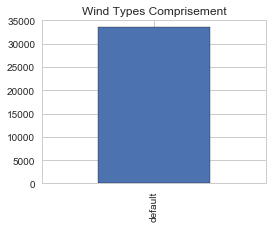

In [24]:
print(df.query('dir == 999')['speed'].value_counts())
df=fill_direction_999(df, SECTOR_LENGTH, integer_data)

## 1.5 Time Shift Comparison

In [25]:
display(df[df['dir'].isnull()])
df.dropna(subset=['dir'], inplace=True)

Empty DataFrame
Columns: [speed, dir, date, HrMn, type, wind_type, dir_windrose]
Index: []

2006 - 2010


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


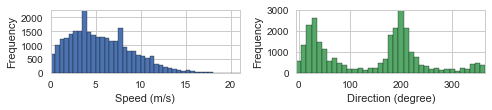

2011 - 2011


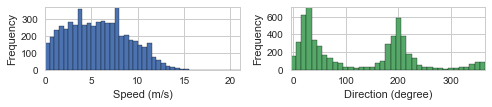

In [26]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
check_time_shift(df, speed_unit_text=speed_unit_text, dir_unit_text=dir_unit_text, bin_width=BIN_WIDTH)

In [27]:
# def plot_speed(df_speed, speed_limit, title=None):
#     bin_width=1
#     bins = np.arange(0, speed_limit + bin_width, bin_width)
#     df_speed.hist(bins=bins)
#     plt.locator_params(axis='y', nbins=5)
#     plt_configure(xlabel="Speed"+speed_unit_text, ylabel="Frequency", tight='y', figsize=(2.7,1.2), title=title)
#     plt.show()

In [28]:
# init_time = (myround(df.date.min() // 10000, 5)+1) * 10000
# speed_limit = df['speed'].quantile(0.999)
# for start_time in range(init_time, 20200000, 50000):
#     end_time = min(start_time + 50000, df.date.max() + 10000)
#     sub_df = df.query('(date >= @start_time) & (date < @end_time)')
#     if len(sub_df) > 0:
#         title = '%s - %s' % (sub_df.date.min() // 10000, sub_df.date.max() // 10000)
#         print(title)
#         plot_speed(sub_df.speed, speed_limit=speed_limit, title=title)

(0, 12.0)

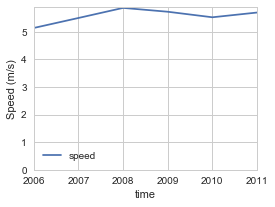

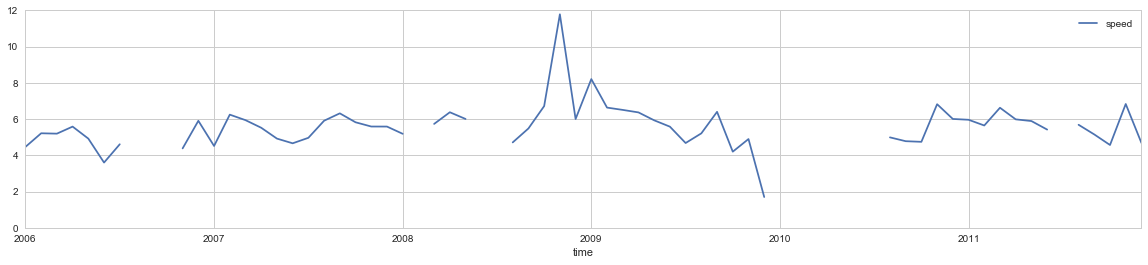

In [29]:
df.resample('A').mean().plot(y='speed', figsize=(4,3))
plt.gca().set_ylim(bottom=0)
plt_configure(ylabel="Speed"+speed_unit_text)
df.resample('M').mean().plot(y='speed', figsize=(20,4))
plt.gca().set_ylim(bottom=0)

In [30]:
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+BIN_WIDTH, BIN_WIDTH)
    else:
        bins = arange(0, 361, 10)
    density_all, _ = np.histogram(df[column], bins=bins, density=True)
    df[column].hist(bins=bins, figsize=(5,3))

    R_squares, years = [], []
    for year in arange(1980, 2016):
        sub_df = df[str(year-1):str(year+1)]
        if len(sub_df) > 1000:
            current_density, _ = np.histogram(sub_df[column], bins=bins, density=True)
            R_square = sector_r_square(density_all, current_density)
            R_squares.append(R_square)
            years.append(year)

    plt.figure()
    plot(years, R_squares)
    ylim = max(min(plt.gca().get_ylim()[0],0.85),0)
    plt.gca().set_ylim(bottom=ylim, top=1)
    plt_configure(figsize=(5,3))
    align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUwAAADECAYAAAD0+hheAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAGiVJREFUeJzt3X1QFPf9B/D38XAE7w4NtZkmNSgYb4wyV3mo1mGCcRqD
YzUao+fcUWyDZpRxNJCKKIrowKhMAmlxxGjqTDtHhF6lTWzso9bIDKFMuqkaUGJ7P3ozPhZJjLen
HHrs7w+HS07ujgVu70Der5nMhO9+j89+XXizT99dlSRJEoiIaEAR4V4BIqLRgoFJRCQTA5OISCYG
JhGRTAxMIiKZGJhERDJFDdTB7XZjx44d6OjogEqlwu7duxETE4OtW7dCpVJh2rRpKC0tRUREBKxW
K+rr6xEVFYW8vDzMnz8f3d3dKCwsRFdXFzQaDSoqKhAfHx+KsRERBdWAe5inT58GANTX1yM/Px9v
v/029u7di/z8fBw9ehSSJOHUqVPo7OyExWJBfX09jhw5gqqqKvT09KCurg56vR5Hjx7FsmXLUFNT
o/igiIiUMOAe5gsvvIDnn38eAHD16lXExcXh448/xuzZswEAmZmZaGpqQkREBFJSUqBWq6FWq5GQ
kID29nYIgoC1a9d6+jIwiWi0GjAwASAqKgpFRUX429/+hurqajQ1NUGlUgEANBoNHA4HRFGETqfz
fEaj0UAURa/2vr4DEQRhKGMhIhpQWlrakD8rKzABoKKiAps3b4bRaITL5fK0O51OxMXFQavVwul0
erXrdDqv9r6+cgxnUMMhCAJrszZrP8K1h2PAc5jvv/8+Dh06BACIjY2FSqVCcnIyWlpaAACNjY1I
T0+HwWCAIAhwuVxwOByw2WzQ6/VITU3FmTNnPH3D9Q9FRDRcA+5hvvjii9i2bRuys7Nx//59FBcX
Y+rUqSgpKUFVVRWSkpKQlZWFyMhI5OTkwGw2Q5IkFBQUICYmBiaTCUVFRTCZTIiOjkZlZWUoxkVE
FHQDBua4cePwi1/8ol97bW1tvzaj0Qij0ejVFhsbi+rq6mGsIhHRyMAb14mIZGJgEhHJxMAkIpKJ
gUlEJBMDk4hIJgYmEZFMDEwiIpkYmEREMjEwiYhkYmASEcnEwCQikomBSUQkEwOTiEgmBiYRkUyy
n7hO/bndbthsNp/Lpk6disjIyBCvEREpiYE5DDabDTnbjmLc+Ce82u989T9Y9pqh1+vDtGZEpAQG
5jCNG/8EtI9/N9yrQUQhwHOYREQyMTCJiGQKeEh+7949FBcX48qVK+jp6UFeXh6efPJJrFu3DlOm
TAEAmEwmLFq0CFarFfX19YiKikJeXh7mz5+P7u5uFBYWoqurCxqNBhUVFYiPjw/FuIiIgi5gYB4/
fhwTJkzAm2++iVu3bmHZsmXYsGEDXn31VeTm5nr6dXZ2wmKxoKGhAS6XC2azGRkZGairq4Ner8fG
jRtx4sQJ1NTUYMeOHYoPiohICQEPyRcuXIjXX38dACBJEiIjI9Ha2oqPPvoI2dnZKC4uhiiKOH/+
PFJSUqBWq6HT6ZCQkID29nYIgoDnnnsOAJCZmYnm5mblR0REpJCAe5gajQYAIIoiNm3ahPz8fPT0
9GDlypVITk7GwYMHceDAAUyfPh06nc7rc6IoQhRFT7tGo4HD4ZC9YoIgDGU8QSG3tt1u97ustbV1
UOMdbG0lsDZrj4XawzHgbUXXrl3Dhg0bYDabsWTJEty+fRtxcXEAgAULFqCsrAzp6elwOp2ezzid
Tuh0Omi1Wk+70+n0fE6OtLS0wY4lKARBkF1bp9MBH173uSw5OXnQ92EOpnawsTZrj5XawxHwkPzm
zZvIzc1FYWEhVqxYAQBYs2YNzp8/DwBobm7GzJkzYTAYIAgCXC4XHA4HbDYb9Ho9UlNTcebMGQBA
Y2Nj2P6RiIiCIeAe5jvvvIPbt2+jpqYGNTU1AICtW7diz549iI6OxsSJE1FWVgatVoucnByYzWZI
koSCggLExMTAZDKhqKgIJpMJ0dHRqKysDMmgiIiUEDAwd+zY4fOqdn19fb82o9EIo9Ho1RYbG4vq
6uphriIR0cjAG9eJiGRiYBIRycTAJCKSiYFJRCQTA5OISCYGJhGRTAxMIiKZGJhERDIxMImIZGJg
EhHJxMAkIpKJgUlEJBMDk4hIJgYmEZFMDEwiIpkYmEREMjEwiYhkYmASEcnEwCQikomBSUQkU8CX
oN27dw/FxcW4cuUKenp6kJeXh2eeeQZbt26FSqXCtGnTUFpaioiICFitVtTX1yMqKgp5eXmYP38+
uru7UVhYiK6uLmg0GlRUVCA+Pj5UYyMiCqqAgXn8+HFMmDABb775Jm7duoVly5Zh+vTpyM/Px5w5
c7Bz506cOnUKs2bNgsViQUNDA1wuF8xmMzIyMlBXVwe9Xo+NGzfixIkTqKmp8fkWSgovt9sNu90O
nU7Xb9nUqVMRGRkZhrUiGnkCBubChQuRlZUFAJAkCZGRkWhra8Ps2bMBAJmZmWhqakJERARSUlKg
VquhVquRkJCA9vZ2CIKAtWvXevr2vdtcDkEQhjqmYZNb2263+13W2toKh8OhWO1gstvtqHjvPMaN
v+7Vfuer/6Eo24DJkycrvg6jYXuz9qNRezgCBqZGowEAiKKITZs2IT8/HxUVFVCpVJ7lDocDoih6
7Z1oNBqIoujV3tdXrrS0tEEPJhgEQZBdW6fTAR9e97ksOTkZer1esdrBpNPpMG78dWgf/26/ZUMZ
x2CFa9ysPTZrD8eAF32uXbuG1atXY+nSpViyZAkiIr7+iNPpRFxcHLRaLZxOp1e7Tqfzau/rS0Q0
WgUMzJs3byI3NxeFhYVYsWIFAGDGjBloaWkBADQ2NiI9PR0GgwGCIMDlcsHhcMBms0Gv1yM1NRVn
zpzx9A3XXxUiomAIeEj+zjvv4Pbt26ipqfGcf9y+fTvKy8tRVVWFpKQkZGVlITIyEjk5OTCbzZAk
CQUFBYiJiYHJZEJRURFMJhOio6NRWVkZkkERESkhYGDu2LHD51Xt2trafm1GoxFGo9GrLTY2FtXV
1cNcRSKikYE3rhMRycTAJCKSiYFJRCQTA5OISKaAF33GGk4RJKJAGJjfYLPZfE4RdN66jrJ1GUhM
TPRq7+joCOXqEVGYMTAfMm78E/2mCN756gZ2Hm7GuPE2r/auyxfxrUnPhnL1iCiMGJgy+QtSIho7
GJgKkHp7Ax6u83wo0ejEwFTAXUcndh6+2e8QHnjwyDTLXrPiTwAiouBjYCrE1yE8EY1uvA+TiEim
MbmH6Xa7YbP1P1wOxW1Cgc5vut1uxesT0dCNycC02WzI2XYU48Y/4dUeituE/J3f7HsdRN/rP4ho
5BmTgQmE9zYhnt8kGp14DpOISKYxu4c5Wvg73wrwfk6iUGNgjnD+zrf6m98OMEiJlMLAHCGk3l5c
vXoVly5d8mrv6OgY1Px23hhPpBxZgXnu3Dm89dZbsFgsuHDhAtatW4cpU6YAAEwmExYtWgSr1Yr6
+npERUUhLy8P8+fPR3d3NwoLC9HV1QWNRoOKigrEx8crOR6PQIeyI/EpQ3cdnbCcVqHh05Ne7YGu
3PPiEVFoDRiY7777Lo4fP47Y2FgAQFtbG1599VXk5uZ6+nR2dsJisaChoQEulwtmsxkZGRmoq6uD
Xq/Hxo0bceLECdTU1Ph8qZoS/B3KAiP3KUN8wAfRyDZgYCYkJGD//v3YsmULAKC1tRUdHR04deoU
Jk+ejOLiYpw/fx4pKSlQq9VQq9VISEhAe3s7BEHA2rVrAQCZmZmeV/XKIQjCEIf0gN1u97sH9qiH
UGtrKxwOh+z+drs9aN9rqIa7vVmbtUNhwMDMysrC5cuXPV8bDAasXLkSycnJOHjwIA4cOIDp06d7
PaVco9FAFEW

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUsAAADECAYAAAAWJgMnAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFcxJREFUeJzt3XtMU/ffB/D3KRdFireZLeZxKqBGhRB1RJcwb4uIMTov
ETNqMBE0wBTHnMpFGJoSGdGxTQPOOZYlKKtEFmN+PotTojNR5A8etQF1ZISZKP6c4jYpaivlPH8Q
OpHSHg497Wn7fiVLtnPqzqffgx/O9fsWRFEUQUREDmk8XQARkTdgsyQikoDNkohIAjZLIiIJ2CyJ
iCRgsyQikiDQ2QesVivy8/PR2toKQRCwb98+dHV1IS0tDZMnTwYAJCUlYfny5aiurobBYEBgYCAy
MjKwePFivHjxArt27UJ7eztCQ0NRUlKCsWPHKv29iIhcSnD2nOWFCxdQW1uL4uJi1NfX44cffsD7
77+Pjo4OpKSk2D736NEjpKSkoKamBmazGTqdDjU1NThx4gRMJhMyMzNx9uxZXL9+Hfn5+Yp/MSIi
V3J6ZLlkyRIsWrQIANDW1oaRI0eisbERra2tqK2txaRJk5CXlwej0YjZs2cjODgYwcHBmDhxIu7c
uYOGhgZs3rwZALBgwQKUl5cr+oWIiJTgtFkCQGBgILKzs3H+/HkcOnQIDx8+RGJiIqKjo3HkyBGU
lZVh+vTpCAsLs/2Z0NBQmEwmmEwm2/LQ0FB0dHQ43V5DQ4PMr0NE5Ng777wj689JapYAUFJSgp07
d2L9+vUwGAx46623AADx8fHQ6/WIjY1FZ2en7fOdnZ0ICwuDVqu1Le/s7MTIkSMlbU/uF3K1hoYG
VdSiljoA1jIQ1mKf2mqRy+nd8NOnT+Po0aMAgJCQEAiCgG3btsFoNAIA6urqEBUVhZiYGDQ0NMBs
NqOjowMtLS2YNm0a5syZg19//RUAcPnyZdUMGhHRYDg9sly6dClyc3OxYcMGdHV1IS8vD+PHj4de
r0dQUBDGjRsHvV4PrVaL5ORk6HQ6iKKITz75BMOGDUNSUhKys7ORlJSEoKAgfPHFF+74XkRELuW0
WY4YMQJff/11v+UGg6HfsvXr12P9+vV9loWEhODQoUNDKJGIyPP4UDoRkQSSb/CondVqRUtLy4Dr
IyMjERAQ4MaKiMiX+EyzbGlpQXJuFUaMerPfumf//InKYh2mTZvmgcqIyBf4TLMEgBGj3oR2zP94
ugwi8kE+1SzJv1itVty9e7fPyxCv4qUXciU2S/JaLS0tKDlhxIhR/+23jpdeyNXYLMmr8dILuQsf
HSIikoDNkohIAjZLIiIJ2CyJiCRgsyQikoDNkohIAjZLIiIJ2CyJiCSQFYU7bNgw5OTkQBAETJ06
FYWFhdBoNIzCJSKf5fTI8uLFiwB6JvvNysrCl19+ieLiYmRlZaGqqgqiKKK2thaPHj1CZWUlDAYD
KioqUFpaCovFgh9//BHTpk1DVVUVVq9ezXRHIvJKsqJwr169irlz5wLoibe9cuUKNBoNo3CJyGfJ
isK9cuUKBEEA8G+87auRt73L5UbhAoNPYbt7967D9Y2NjZK3PdRalKKWOgB11KLkPpdLDePSi7W4
lqwoXLPZbFveG2/7auRt73J3RuGGhYUB/+k/+0yv6OhoWTPQqCXGUy11AOqpRal9LpdaxgVgLQNx
exRudHQ06uvrAfTE28bGxjIKl4h8mqwo3MjISBQUFKC0tBQRERFISEhAQEAAo3CJyGfJjsI9fvx4
v2WMwiUiX8WH0omIJGCzJCKSgLES5HHMfCdvwGZJHsfMd/IGbJakCgweI7XjNUsiIgnYLImIJOBp
OKma2N2N1tZWu+sGWk6kBDZLUrXnHY/w2bePMWJU/7vl7fdu440JMzxQFfkjNktSvYFu/jz756EH
qiF/xWuWREQSsFkSEUnAZklEJAGbJRGRBGyWREQSsFkSEUng8NGhly9fIi8vD/fv34fFYkFGRgbG
jx+PtLQ0TJ48GQCQlJSE5cuXMzOciHyaw2Z55swZjB49GgcOHMDff/+N1atXY+vWrdi0aRNSUlJs
n+vNDK+pqYHZbIZOp0NcXJwtMzwzMxNnz55FeXk58vPzFf9SRESu5rBZLlu2DAkJCQAAURQREBCA
xsZGtLa2ora2FpMmTUJeXh6MRqPLM8MZhdufWuoAXFuLs30nF6NwWYsrOWyWoaGhAACTyYTt27cj
KysLFosFiYmJiI6OxpEjR1BWVobp06e7NDMcYBSuWusAXF+Ls30nF6NwWcvrFI3CffDgATZu3IhV
q1Zh5cqViI+PR3R0NAAgPj4et27dcnlmOBGR2jhslo8fP0ZKSgp27dqFdevWAQBSU1NhNBoBAHV1
dYiKimJmOBH5PIen4d988w2ePn2K8vJy2/XGnJwc7N+/H0FBQRg3bhz0ej20Wi0zw4nIpzlslvn5
+XbvXhsMhn7LmBlORL6MD6UTEUngF/NZOpptG2DUKhE55xfN0tFs24xaJSIp/KJZAoxaJaKh4TVL
IiIJ2CyJiCRgsyQikoDNkohIAjZLIiIJ2CyJiCRgsyQikoDNkohIAjZLIiIJ2CyJiCRgsyQikmDQ
UbhTpkxBTk4OBEHA1KlTUVhYCI1GwyhcIvJpDo8se6Nwq6qq8N1330Gv16O4uBhZWVmoqqqCKIqo
ra21ReEaDAZUVFSgtLQUFovFFoVbVVWF1atXDyrdkYhITQYdhdvU1IS5c+cC6Im3vXLlCjQajcuj
cImI1GTQUbglJSUQBMG2vqOjo0/kbe/yoUbh2oustFqtuHfvnt3Pt7W1Qe4lWGf50mrJPFZLHQBz
wwfiq/toqNRUi1xO57N88OABtm7dCp1Oh5UrV+LAgQO2db3xtkpE4dpLgmxubkZmyf9ixKg3+61r
v/cb3pgwQ/L//1WO8qXVknmsljoA5oYPxJf30VCorRa5Bh2FO3PmTNTX1wPoibeNjY11axRu7yS+
r/8TEsYbR0SknEFH4e7ZswdFRUUoLS1FREQEEhISEBAQwChcIvJpsqJwjx8/3m8Zo3CJyJfxoXQi
Ign8JrBsIM5icq1WqxurISK18vtm6SwmN3tDjO25UiLyX37fLAHG5BKRc7xmSUQkAZslEZEEbJZE
RBKwWRIRSaDaGzzNzc39ljl6xIeISEmqbZZpn1/ot6z93m3Zk2UQEQ2FapulvUd5nv3z0AOVEBHx
miURkSRslkREErBZEhFJwGZJRCSBpBs8N2/exMGDB1FZWYlbt24hLS0NkydPBgAkJSVh+fLljMIl
VXE2m1RkZCQCAgLcWBF5O6fN8tixYzhz5gxCQkIAAE1NTdi0aRNSUlJsn+mNwq2pqYHZbIZOp0Nc
XJwtCjczMxNnz55FeXm53cmEiVzN2WxSlcU6t+bzkPdzeho+ceJEHD582PbfjY2NuHTpEjZs2IC8
vDyYTCYYjUZbFG5YWFifKNz58+cD6InCraurU+6bEL1moLwme4F3RM44PbJMSEjoEz8bExODxMRE
REdH48iRIygrK8P06dNdHoWrJmqJ8VRLHYB3ROE6olRMrq/uo6FSUy1yDfqh9Pj4eFukbXx8PPR6
PWJjY10ehasmaojxVFucqDdE4TqiREyuL++joVBbLXIN+m54amoqjEYjAKCurg5RUVFujcIlIvKE
QR9Z7t27F3q9HkFBQRg3bhz0ej20Wi2jcInIp0lqlhMmTEB1dTUAICoqCgaDod9nGIVLRL6MD6UT
EUnAZklEJAGbJRGRBGyWREQSsFkSEUnAZklEJAGbJRGRBGyWREQSsFkSEUnAZklEJIFqo3DJt1it
VrS09J+IF4DDGc2VwFnUSQ42S3KLlpYWJOdW2Z14t/3ebbwxYYbbauEs6iQHmyW5Te/M5a979s9D
1dRCNBBesyQ

## 1.6 Re-distribute Direction and Speed (Optional)
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

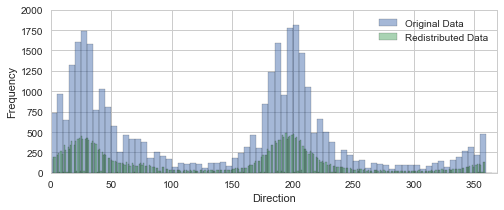

In [31]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

if integer_data:
    df = randomize_angle(df, DIR_REDISTRIBUTE, SECTOR_LENGTH)
    
if 'portus' in file_path:
    df = randomize_angle(df, DIR_REDISTRIBUTE, 1)

In [32]:
if integer_data:
    if delete_zero:
        redistribute_method = 'down'
    else:
        redistribute_method = 'up'

    df, speed_redistribution_info = randomize_speed(df, redistribute_method)
else: 
    speed_redistribution_info = 'None'

## 1.7 Generate (x,y) from (speed,dir)

In [33]:
# There might be a small dot in the centre, which is due to too many zero (more than 1 speed) in center
# Scatter plot in matplot has performance issue, the speed is very slow
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)

# 2. Re-select Data and Overview

## 2.1 Data Overview

In [34]:
## Summery of the data selection
print('Knot unit?', knot_unit)
print('Report type used:', report_type_most_used)
print('Sampling time used:', sample_times)
# print('Speed redistribution info:', speed_redistribution_info )

print(len(df))

Knot unit? False
Report type used: default
Sampling time used: Default
33665


In [35]:
df_all_years = df
if 'ECMWF' in file_path:
    df = df_all_years['2006':'2015']
elif 'portus' in file_path:
    df = df_all_years
else:
    df = df_all_years['2011':'2015']
# df = df.query('(HrMn == 0) and (speed >= 0.5) and (date%10000 > 900) and (date%10000 < 1000)' )
# df = df.query('(HrMn%600 == 0)' )
df.describe()

speed           dir          date          HrMn  dir_windrose  \
count  33665.000000  33665.000000  3.366500e+04  33665.000000  33665.000000   
mean       5.574912    137.094248  2.008449e+07   1150.081687    161.227744   
std        3.368837     98.768947  1.673319e+04    692.448967    100.255742   
min        0.200000     -0.495693  2.006010e+07      0.000000      0.000000   
25%        2.800000     34.275787  2.007061e+07    500.000000     64.000000   
50%        5.100000    171.805020  2.008100e+07   1200.000000    177.000000   
75%        7.900000    203.486283  2.010090e+07   1700.000000    253.000000   
max       20.600000    358.499736  2.011123e+07   2300.000000    357.000000   

                  x             y  
count  33665.000000  33665.000000  
mean      -0.041099      0.648698  
std        5.706875      3.072245  
min      -19.667142    -15.025356  
25%       -4.101633     -1.384359  
50%        0.006477      0.195350  
75%        4.572651      2.476525  
max       17.972588     17.574885

In [36]:
df.plot(y='speed',legend=True, figsize=(9,3))

# import matplotlib.dates as mdates
# myFmt = mdates.DateFormatter('%Y %m')
# plt.gca().xaxis.set_major_formatter(myFmt)

In [37]:
# Accumulation by month
# df.resample('M').count().plot(y='speed', kind='bar',figsize=(9,3))

df_ts = df.resample('M').count()
ax = df_ts.plot(y='speed', kind='bar',figsize=(9,3))

import matplotlib.ticker as ticker
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels = ['']*len(df_ts.index)
# Every 4th ticklable shows the month and day
# ticklabels[::4] = [item.strftime('%m') for item in df_ts.index[::4]]
# Every 12th ticklabel includes the year
ticklabels[::12] = [item.strftime('%Y') for item in df_ts.index[::12]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()

In [38]:
# 90 degree is east
ax = WindroseAxes.from_ax()
viridis = plt.get_cmap('viridis')
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
ax.set_legend()
plt_configure(figsize=(4.5,4.5))

In [39]:
if len(df) > 300000:
    bins=arange(0,362)
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
    
    df = df_all_years.sample(n=300000, replace=True)    
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min resmapled')
    plt_configure(legend=True, figsize=(20,4))

In [40]:
small_fig_size = (3.5,2.5)

In [41]:
# 2. CDF comparison
print('test') # papermill may have bugs on this
x, y_weibull, _, y_cdf_weibull,  weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed)

# 1. Histogram comparison
fig = plt.figure()
df['speed'].hist(bins=arange(0, df.speed.max()+BIN_WIDTH, BIN_WIDTH), alpha=0.5, label='Data', normed=True)             
plot(x, y_weibull, '-', color='black',label='Weibull')   
plt_configure(figsize=small_fig_size, xlabel='V',ylabel='PDF', legend=True)

fig = plt.figure()
df['dir'].hist(bins=arange(0, 360, 10), alpha=0.5, label='Data', normed=True)    
plt_configure(xlabel = "Direction", ylabel='Density', legend=True, figsize=small_fig_size)
align_figures()

test


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAPoAAAC0CAYAAAC9vjEhAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XdYlFe+wPHvMDC0AVGaFcTCWqLBErt4g2uiREFFBDVo
RI1xs0nsUWOJBpVEvSY3tvWuiYnGRcFwo64txoJrW8SQWALGhgUEpAhDccSZ+wfLRJQuw8vMnM/z
zOO85cz8GPlxzpz3vOfItFqtFkEQjJqZ1AEIgqB/ItEFwQSIRBcEEyASXRBMgEh0QTABItEFwQSY
Sx3Ai4qLi5M6BEGoN7p161bmfoNPdCj/h6tv4uLiDCZWMKx4RawVV3pGkeh1TaPRkJWV9dz+hg0b
YmYmvg0J9Y9I9BrIysrimz3nsVXa6/blqXKY4NcdR0dHCSMThLKJRK8hW6U9dvYNpQ5DEKpEb4mu
0Wj4+OOPSUxMRKFQEBYWhru7e6lzCgoKmDhxIsuXL6d169YAjBgxAqVSCUDz5s1ZuXKlvkIUBJOh
t0Q/cuQIarWanTt3Eh8fT3h4OBs3btQdv3jxIkuWLCE1NVW379GjR2i1WrZt26avsATBJOmt5ygu
Lo7+/fsD4OXlxaVLl0odV6vVrF+/nlatWun2JSQkUFBQQGhoKOPHjyc+Pl5f4QmCSdFbja5SqXRN
cAC5XE5RURHm5sVvWdblBSsrKyZNmkRgYCC3bt1iypQpHDx4UFemPHV9LT07O5v793PIVRXo9uWp
HhIfn4+Dg0OFZQ3tur8hxStiLZ/eEl2pVJKXl6fb1mg0lSash4cH7u7uyGQyPDw8cHBwID09nSZN
mlRYrq6vn2ZkZHAt82qpzrjcHGu8vDwr7HU3pGu9YFjx6jPWCRMmMGvWLDp37oxaraZ3795MmzaN
yZMnAxASEsKCBQto3759qXIxMTGkpKTQt29fZs6cya5du6oUa9++fTl16hQhISF8/PHHuv6rylT0
x0NvTfeuXbsSExMDQHx8PJ6enpWWiYqKIjw8HIDU1FRUKhXOzs76ClEQqqRv376cP38eKE6mfv36
ceLECaC4X+nevXu0a9fuuXLe3t4EBQXVaazl0VuNPmjQIE6dOkVwcDBarZYVK1awd+9e8vPzy/3h
R40axfz58xkzZgwymYwVK1ZU2goQTNOcOXOIjIzUbavVahQKRY1eKzAwkFWrVpV7vE+fPmzYsIHQ
0FBOnDhBYGAgq1evJjc3l8uXL9OjRw9iY2NZu3YtcrmcFi1asGzZMvbu3cuNGzcIDg4mMzOTd955
h4yMDDw9PenWrRvz5s3D19cXb29vYmJi2L9/v66iq216yyIzMzOWLVtWal9ZTZCne9gVCgVr1qzR
V0iCUCMdOnTgxo0baLVaYmNjmTlzJr179+b06dMkJibSr18/Fi1axI4dO3B0dOTzzz8nOjq6VCWV
n5/PqlWrsLGxwd/fn4SEhDr9GUR1KRikVatWlaqF9fkd3czMjHbt2hETE4OzszMKhQJvb2+OHz9O
QkIC48aNY9GiRUyfPh2AwsJC+vTpU2rcSLt27bCzswOKK7ybN2+Weg99T90oEl0QqqBv37787W9/
44033gCKO4A3bNgAFN/j0LhxYzZs2ICdnR0//fQTNjY2pKSk6Mpfv36dvLw8LC0tuXbtGm3btuXM
mTOkp6cDcOXKFb3GL+7AEIQq6NOnD3FxcQwYMAAo/pppZ2dHjx49MDMz46OPPuLtt98mODiYHTt2
PNf53KBBA2bMmEFwcDA9e/akTZs2BAYGsnXrVt56661SA8f0QdToglAFzZo1IzExsdS+khodoF+/
fvTr16/U8ZEjR+qe79mzR/e85DJYp06d2Lt373PvderUKYBaHSEqanRBMAEi0QXBBIhEFwQTIBJd
EEyASHRBMAGi110wSM/O25ednU1GRkaNXssU5voTiS4YpGfn7bt/P4drmVer/TpVnevv3LlzTJ8+
nTZt2qDVaikqKmL8+PH4+vqWeX5ycjIJCQn4+PhUOyZ9EIkuGKyn5+3LVRXofQ6/Xr16sXbtWgDy
8vIICQnBw8PjudtTAc6ePcuNGzdEoguCIbO1tSUoKIj9+/ezfft27t+/T1paGj4+Prz//vts3ryZ
wsJCunTpgp2dHevWrUOr1ZKXl0doaGidx2vcX0wEQY8cHR25cuUKXl5ebNmyhaioKCIiIpDL5bz9
9tsMHTqUgQMH8vvvv7Nq1Sq2bdvGa6+9xrlz5+o8VlGjC0INJScn06VLFy5evMjZs2dRKpWo1ern
znN1dWX58uXY2NiQmppK48aN6zxWUaMLQg2oVCoiIyOxs7PDzs6ONWvWEBoaSmFhIVqtFjMzMzQa
DQCLFi1ixYoVhIeH4+LiIkm8okYXDFaeKuep5w/JzbF+odeozNmzZwkJCcHMzIwnT57w3nvv4eHh
waxZs4iPj0ehUODu7k5aWhqenp5s3LiRjh074ufnx7hx47C2tsbJyYmioqJqx/miRKJXw549ezh6
9CguLi7ce2iBe6t2ODdujqVV9X/BhBfTsGFDJvh1123Hx+fj5VX5vITlvVZlevbsyZkzZ8o89vSd
aSVcXV05dOgQgO4e9hJSzFYrEr2Kdu/eTWBgYJkzgTg0dKKRSxN+imxH+/btad++PQEBAVhYWEgQ
qWkwMzMrde3bwcFBrHtXAZHoVXD69GnefPNNbG1t2b59OxkZGez76TwPszJIS71Lespdbl27wo3E
i7oy/v7+7Nq1q8YTFgpCbRKJXonff/8dPz8/Hj9+THR0NIMHDyYjI4PHdu1LDdDIzkqn95+UZGVl
sXz5cn744QdGjRpFZGQklpaWEv4EgiB63Sv04MEDfH19ycjIYOPGjQwePLjcc+Vyc9zc3PDx8WHf
vn289tpr7N27l5EjR1JYWKi3GDUaDRkZGaUeJb29glBC1OjlKCgowM/Pj2vXrrFgwQKmTJlS5bLW
1tb88MMPjBgxgv379zN8+HCio6P1EuezY77FOu1CWUSNXgaNRkNISAhnzpxh7NixhIWFVfs1rKys
iI6O5o033uDQoUP4+/vrrWYvGfNtZ99Ql/CC8DRRo5dh7ty57N69mwEDBvDVV18hk8lq9DpWVlbs
3r2b0aNHs2fPHrKzszl27Bi2tra1HLEgVEzU6M9Yt24da9asoV27dkRHR79wR5qlpSWRkZGMGDGC
2NhYhg4dikqlqqVoBaFqRKI/Zc+ePXzwwQe4uLiwf//+Kg2kqAqFQsHOnTvx8fHh+PHj+Pr6kpub
WyuvLQhVIRL9P2JjYwkODsbKyop//vOfeHh41OrrW1hYsGLFCoKCgjh58iRDhgwhJ6fqwy8F4UWI
RAfS09MZOnQojx49IiIigu7du1deqAbMzc3Zvn07Y8eO5dSpUwQEBIhLYUKdEIkO7Nixg7S0NJYu
XcqwYcP0+l7m5uZ8++23vPHGGxw5coR169bp9f0EAUSiAxAREYGZmVm1rpW/CLlczpYtW3BycuLD
Dz98bqkfQahtJp/oN2/e5OzZs/j4+ODq6grUzWgzV1dXNm3aRGFhIePHj5fk1kXBdJj8dfRdu3YB
EBwcrNv37Giz3Jxs/L3b0KhRIwAyMzOpjeWsAwICePPNN9m+fTvh4eEsXLjwxV9UEMpg8okeERGB
hYUFI0aMKLX/6RlGVbkPifzxCo7OxbODpN2/i10DR+wbvPjlty+//JJjx46xdOlS3njjDbp06fLC
rykIzzLppntiYiLx8fG8/vrrutq6PDZKO90wUxtbu1qLwcHBga+//pqioiJCQkL0egOMYLr0luga
jYbFixcTFBRESEgISUlJz51TUFBAcHAw169fr3KZ2rRz506gdLO9pjQaDZmZmTX6Xj9o0CD+8pe/
cPnyZRYvXvz

In [42]:
plot(log(x), log(-log(1-y_ecdf)),'o', label='ECDF')
plot(log(x), log(-log(1-y_cdf_weibull)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'}, figsize=small_fig_size)

fig = plt.figure()
plot(x, y_ecdf,'-', label='ECDF', color='black')
plot(x, y_cdf_weibull,'--',label='Weibull')
plt_configure(xlabel = "V", ylabel='P', legend=True, figsize=small_fig_size)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAPIAAAC3CAYAAAAo/QN7AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAHpRJREFUeJzt3WlcVnX+//HXtbGLLK7J5pp7CiiupGlmVk6TOq6Yv8oW
dcoyR2G0acoxy3pUapg5j1Gz6e/SpGnLmFvq6IhLKqm4AgqCAiqyCdd2/jccUBQQ9LrOdXHxed7y
Ws/ngG/O+Z7zXTSKoigIIWo1raMLEELcPwmyEC5AgiyEC5AgC+ECJMhCuAAJshAuQK/2Bi0WC7Nm
zSIlJQWNRsNf//pX2rRpo3YZQrgU1Y/I27dvB2DVqlVMnTqVjz/+WO0ShHA5qh+RBw4cSL9+/QDI
yMjA19dX7RKEcDmqBxlAr9czY8YMNm/ezIIFC6p878GDB1WqSgjnFxERUfELigNlZWUp/fr1UwoL
Cyt9z4EDB1SsSH2uvH+uvG+Kov7+VbU91dvI69evZ8mSJQB4enqi0WjQauXiuRD3Q/VT60GDBhEb
G8vYsWMxm83ExcXh4eGhdhlCuBTVg+zl5cWnn36q9maFcGlyTiuEC5AgC+ECJMhCuAAJshAuwCEd
QtS081A6a7ee5vylfEIa12PEgNZEdw1ydFlC2JRLB3nnoXTmf3WzZ1hqZl7Z43sJc0JCAlOnTqVV
q1Zlz/n7+7NgwQJWr17Nhg0b0Gq1mEwmXn/9daKioli4cCHff/89jRo1wmKx4OHhwZtvvkn79u1J
SEhgypQptG3btuz7nnzySUaOHHkfey3qIpcO8tqtpyt9/l6Pyj169LhjoMcPP/zA7t27Wb58OQaD
gbS0NMaNG8e6desAmDBhAqNHjwbg7NmzTJ48me+++w6A9u3bs2LFinuqRYhSLh3k85fyK3w+rZLn
79WqVauIjY3FYDAAEBwczPr16/H397/jvS1btqRDhw4cPHgQnU5n0zqEfd3eTItorqeyrs9qc+kg
hzSuR2pm3h3PBzeud8/fuXfvXmJiYsoeP/zww2RlZREcHFzufRWFuFRgYCBXr16lQYMGHD9+vNz3
LV++XALuhCpqpqVmQosW6U5xzcWlgzxiQOtyP/xbn79XFZ1a79mzh8zMTOrVu/kHYteuXTz44IMV
fkdGRgaDBg3CYrHIqXUtYY9mmi259O2n6K5BTB8XQVhTX3RaDWFNfZk+LsLmP/hhw4YRHx+P2WwG
ICUlhVmzZlV4ZD19+jRnzpyhS5cuNq1B2JdazbR75dJHZLgRZlsG9/ZTa4ClS5eSnZ3NmDFjMBgM
WCwW5s+fT2BgIHDjdPnHH39Eq9Wi1+tZsGABer3L/+hdij2aabakURTnXjLm4MGDlQ+mdgGuvH+u
sG+lF7jOXcyjoqTY4wyvMlX9POWwIEQlbr/AVUqrgZAmvkQ01ztF+xhcvI0sxP2o7AJXSBNfFr7Z
n05hXipXVDlVj8gmk4m4uDguXLiA0WjklVdeYcCAAWqWIMRdlZ5OV9QmBue5wHUrVYO8YcMG/Pz8
mD9/Prm5uTz99NMSZOFUKjudvlXpBS6j1cT+C0fo2qQDep1jW6mqbn3w4ME89thjACiKIh0fhNOp
7HT6ViMGtOZE9lmWpa0jNzmP2OjJdG3aUYXqKqdqkL29vQEoKCjg1VdfZerUqdX6nKtPievK+1fb
9u3cxYpPpwEa+xno2c6L/Vkb2XfqNxQUuvt1wnzhOgczHLufqp8PZGZmMnnyZMaMGcNTTz1Vrc84
yy2MZ599lmnTptG5c2eMRiM9e/bklVde4YUXXgAgJiaGuLg42rVrV+5zO3fuJDMzk969e/PGG2+w
Zs2astequqXQu3dvdu/eTUxMDG+//TYtW7a0387ZQW25/XRrH2q9TovJbL3jPWFNfZn2fCsWJazg
fO4FGns3YIBfD57u84RqdVb1R1HVIOfk5PDcc8/x1ltv0bNnT5t858rD/2Jv2q82+a4eweHEdBlW
6eu9e/fmwIEDdO7cmYMHD9KnTx927NjBCy+8QElJCRcuXCg3JLFUdHQ0AOnp6TapU9jO7W1iq7Wi
bhVWmnfJInbLv7BYLQxs2ZfxDz3DscRj6hV6F6refvr888/Jy8sjPj6emJgYYmJiKC4uVrOE+9Kr
Vy8OHDgAwI4dOxgxYgT5+fnk5+dz6NAhunfvzv79+xk9ejTjxo0jNjYWk8nEt99+y4cffgjAlStX
ePnllxkxYgSfffYZADNnzmTnzp3AjaP3zJkzHbODdVBlbWKDXotOqyEoWENY9DH2Xv4FXzcfYqMn
82LkGDwMzjWFs6pH5FmzZjFr1iybfmdMl2FVHkVtqX379iQnJ6MoCvv37+eNN96gZ8+e7Nmzh5Mn
T9KnTx9mz57N119/TWBgIJ988gnr1q0r1x2zqKiI+fPn4+XlxdixY2natKkqtYuKVdaH2mq18vKL
9fnqyLcYi030ConkhfBR+Lh7q1xh9UjPrhrQarW0bduWnTt30rBhQ9zc3IiOjuaXX37hxIkTjB07
ltmzZ5ddxCsuLqZXr16EhoaWfUfbtm3LRkl16tSJzMzMcttw8h6zLuHWNrFOq7njdFrjdh2ftif4
x6+X8HHzZlL3Z+kV4txtfQlyDfXu3ZslS5bwxBM3LnJEREQQHx8P3BiD3KRJE+Lj46lXrx5bt27F
y8urXFjPnj1LYWEh7u7uJCYmMmbMGC5dukR2djYAx48fV3+n6pCq28QKusAMDKFJGPVmwpt25KVu
4/D3rK9+oTUkQa6hXr16MWvWLD744AMA3NzcqFevHu3atUOr1fLnP/+ZF198EUVR8Pb25oMPPigX
5Pr16/P6669z5coVhgwZQlBQEC1atCAuLo6NGzcSFhbmoD2rGyptE3uY0AYfRet/CYPGjecixvJI
i95oNBqVK7w3MvrJwVx5/5xl3249la7oqrTW7xJuzY+hMRhp37A1k7qPp5FPg7t+r9r7J6OfRJ1V
ZZdLnQlDSBL6hhmgaBnfZThD2vRHq6l9Y4kkyMKlVXYqra13GUOL39C6F2Mt9GVc+1E8+WBXlauz
HQmycGl33F7SWjAEnUTf5DyKosH7WgfGRz5F//DQir+glpAgC5dT2e0ljXcubi0S0XoWoTP5MmfI
JFoG1O4Al5IgC5dS4e0ljRX9A2fQP5AMgPliKC/3GekyIQYJsnAxt7eJNZ75N47C3vkoJZ4EXIti
bHRvp5mix1YkyKJWu331h5vDEBX0TVLQB51Go1WwZAfx1UvT8HSyPtK2IkEWtVZFqz8AaNyLMLRI
RFcvF8XoTklKB0K8WrlsiEGCLGqxO28tKegapmEIOYlGZ8F8uQmmc+3B7MaIp+59dZHaQIIsaq1y
t5YMxbg1P4rOLwfFbMD3cjdyUvwJqyNrYjskyEeOHOHDDz9k5cqVjti8cBE3Vn+4hi4wE0PocTR6
M5bcBjQu7En8G0McXZ6qVA/y0qVL2bBhA56enmpvWtRyt1/YatPCiwzvHegCLqFYdBhT2mPJDmbU
uM6OLlV1qncqDQkJYeHChWpvVtRypRe2UjPzsFoVzl8/w87Cr9EFXMJQ0gDT8d4E6zsyfVyky59G
V8Qho5/S09PvmISuMrVtFkZhH/E/XiIr1wRaM4bQJPQNL6BYNXhcbsurPXrWyoEO9+K+Rj/t27eP
bdu2kZqailarJTQ0lAEDBhAZGWnTIivjDEPh7MVZhvrZgy33LWfVhjsGOhiTO2Eq8aXblG422UZN
OWIYY2WqDHJSUhJz584lICCAyMhIunXrhl6vJz09nS+//JKPP/6YuLg4OnToYPOihShlNBvxf/AM
RfVOoygaTBdaYs5oCYqW4KbOsaypo1UZ5A0bNrBgwQL8/f3veG3s2LFcvnyZL774QoIs7ObslXMs
2ruconoXsV7

In [43]:
df.plot(kind='scatter', x='x', y='y', alpha=0.05, s=2)
plt.gca().set_aspect('equal')
plt_configure(figsize=small_fig_size,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 2.2 Overview by Direction

In [44]:
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 10

In [45]:
%%time
original_incre, incre = SECTOR_LENGTH, rebinned_angle
start, end = -original_incre/2 + incre/2, 360

max_speed = df.speed.max()
max_count = max_count_for_angles(df, start, end, incre, BIN_WIDTH)
plot_range = [0, max_speed, 0, max_count*1.05]

for angle in arange(start, end, incre):
    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)   
    
    fig = plt.figure()
    sub_df['speed'].hist(bins=arange(0, max_speed+BIN_WIDTH, BIN_WIDTH), alpha=0.5, label='Data')
    plt.axis(plot_range)
    plt_configure(figsize=(3,1.5), title='%s (%s - %s), %s' % (angle, start_angle, end_angle, len(sub_df)) )
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAM4AAAB6CAYAAAD3RGynAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEyhJREFUeJzt3XlQE2fcB/BvCKIIKFgUO7V44TEeQLyQWq96gCKC9b7o
eKLTVq2jBQ+8wHrUtmMdUPCu2mpeKq0z1latiu9IpaIgBeoRDxQFASFKuCG/9w9etwQChAVJCL/P
DDPu7pPklyVfn91nlycSIiIwxmrFRN8FMNYYcXAYE4GDw5gIHBzGRODgMCYCB4cxEYwqOMXFxdiy
ZQtcXFzg4uKCnTt3orS0tN7aA4BKpYKnpyeUSmWVbTZs2IAePXpo/GzZsqXK9vfv38fs2bPh5OQE
Dw8PXL16teY3W4MFCxZUquHgwYNVto+JicGkSZPg6OiIyZMn459//hG2nT9/HmvWrKl1DSdOnICb
mxtkMhmWLFmCp0+fCtvUajXCwsIwevRoyGQyTJ8+HTdv3tR4/IULF+Du7g5HR0f4+PggOTm51jW8
NWREtm/fTmPGjKHY2Fi6du0aDRkyhIKDg+utPRFRYGAg7du3r9o2M2bMoJCQEEpPTxd+cnJytLbN
z8+nYcOGUUBAACkUCgoODqa+ffvS48ePa37D1Rg6dChFRERo1JCXl6e1bVpaGslkMtq9ezcpFAra
tGkTubi40KtXr4Q2kydPpujoaJ1fPzw8nHr37k0//vgjPXjwgIKCgmjkyJFCDYcPH6ZBgwbRhQsX
6NGjR7Rjxw5ydnamlJQUIiJKTEykPn360PHjx+nevXv0+eefk5ubGxUXF9dhr9QfowlOQUEBOTk5
0cWLF4V1p0+fJldXVyotLa1zeyKi9PR0cnZ2JqVSWW0tgwYNosjISJ3qjoiIIFdXVyoqKhLWzZkz
h7Zv367T47XJycmh7t27k0Kh0Kn9nj17yNvbW1hWq9U0atQoOnbsmEadc+bM0bmGCRMmUGBgoMZz
uru7k1wuF7aHhoZqPGbs2LF0+PBhIiLy9/enTz/9VNiWm5tLzs7OdOnSJZ1reJuM5lDt33//RX5+
PgYNGiSsGzBgAF6+fIknT57UuT0AnDp1CjKZDK1bt66yjoyMDCiVSnTu3Fmnum/dugWZTIZmzZoJ
6wYOHIjY2FidHq+NQqGAqakp7O3tdWofGxuLgQMHCssSiQT9+/fXqGHkyJGIjY3F3bt3dXrOp0+f
ol+/fhrP2aNHD9y6dQsAEBAQgIkTJ1Z6XE5OjtaaWrZsid69eyMuLk6n13/bjCY4L168gLm5Oays
rIR1bdu2BQCkpaXVuT0AXLlyBUOHDq22DoVCAYlEgv3792P48OEYP348Dh06BLVarbV9eno62rVr
p7HO1tYWL168qPZ1aqrB0tIS/v7++PDDD+Hl5YWIiIgq2+tSQ+vWrdG3b19ERkbqVIOtrW2l/fj8
+XNkZWUBAAYNGoT27dsL265cuYLHjx/D1dUVQNnvR1tNVf1uGprRBCc/Px/NmzfXWGdmZgYAKCoq
qnP70tJSJCUlwcHBodo6Hj58CBMTE9jb2yMsLAzz589HcHAwDhw4UKu6tdWgqwcPHqCgoACurq44
cOAAvL29ERAQgLNnz9apBgcHByQkJOhUg6enJw4ePIj4+HiUlJRALpcjMTERxcXFldoqFAr4+flh
woQJGDBgAACgoKCg3vdLfTLVdwH1pUWLFpV26ptlc3PzOrdXKpUoLS2FjY2NsG7hwoUaI0Fnz57F
rFmz4OHhAWtrawBAjx498OrVKxw5cgSLFy/WuY4WLVpofZ8eHh54/vy5sKztkG7VqlVYsmSJcEjZ
s2dPPH36FMeOHYOHh4foGqytrfHw4UOtdVW0ZMkSpKWlYcaMGQCADz74AN7e3sKh2BsJCQlYtGgR
unXrhq1bt9ZYk7bfjT4YTXDat2+PvLw8qFQqWFpaAig73wAAOzu7OreXSCQAoHHItXXrVhQUFAjL
7dq1g0QiEULzhoODAzIzM1FaWgqpVKqxzc7OTnjdNzIyMrTWAABhYWEoKSnRuu0NqVRa6Tysa9eu
uHLlitb2utZQWloKExPdDlKaN2+Obdu2YcOGDcjPz0ebNm2wfPlydOjQQWhz48YN+Pr6wsnJCSEh
IRpBraqm8uc9+mQ0h2o9e/aEubm5Rg8QExMDW1tbrSfJtW1vY2MDU1NTZGdnC+vs7OzQsWNH4cfU
1BRbt27FvHnzNB6bkJCATp06VQoNAMhkMsTGxmqEISYmBjKZTOv7fO+99zReU5vPPvsM69at01iX
mJiILl26aG0vk8kQExMjLBORMGhRXnZ2tnAeWJNdu3bhxIkTMDc3R5s2bZCfn4/r168L5zB37tzB
4sWLMXDgQISGhlbqSSrWlJeXh6SkpCr3S4PT97BefQoMDKSPPvqIYmJiKCoqioYMGaJxzSU7O5uy
s7N1bl/RlClTKg2hVnT9+nXq2bMnhYaGUnJyMkVERJCzszP9+uuvRERUUlJC6enplJ+fT0REKpWK
hgwZQv7+/qRQKCgkJIQcHR3pyZMnovdDREQE9erVi8LDwyk5OZmOHDlCvXv3phs3bhARUWFhIaWn
p1NhYSEREaWmppKTkxN98803pFAoaPPmzTR48GB6/fq1xvNOmjSJDh06RERl15/S09OppKREaw3H
jx8nV1dXio6OJoVCQYsWLaLp06eTWq0mIiJvb28aO3YspaSkaL3eFR8fT7169aIjR44I13HGjRtX
5es1NAmR/v6QreKV4roqKirC0aNHcf36dTRr1gzDhg3DjBkzhMOLwMBAAGVDobq0r+j06dO4f/8+
/Pz8qq3j77//xunTp5GamgobGxt4enpi1KhRAMoON5YvXw5fX18MHz4cAPD48WMcOnQIycnJsLOz
w5w5c+Do6FinfXHx4kWcO3cOmZmZsLOzw9SpU4XDnKSkJAQFBWH9+vXo1asXgLJe8YcffsCLFy9g
b2+PefPmafRQeXl58PX1xc6dO/Huu+8iMjISoaGh2L17t9ZeSK1WQy6XIzIyEsXFxXB2dsYnn3wC
KysrpKWlYeXKlVrr9vDwwOzZswEAUVFRkMvlUCqV6NatGxYuXFjlIezb0L9//6o36jO1MTEx+nx5
nZSvMS0tjZycnCgjI0OPFWlqqH148uRJ8vHx0Vi3aNEinfZFY/s9a1uuyGjOcRqCnZ0dJk2ahFOn
Tum7lAZFRPjpp5+wdOlSYd2tW7dgYmICW1tbPVamPxycWlq5ciV+++23am/yNDa///47unfvjsGD
BwvrHB0dsXfvXj1WpV9GMxzdUKysrKq8kGisxo0bh3HjxmmsMzVt2h8d7nEYE6HG/zZKS0uxfv16
PHr0CBKJBJs3b0bz5s3h7+8PiUSCbt26YePGjTAxMYFcLsfJkydhamqKpUuXYuTIkQ3xHhhrcDUG
5/LlywCAkydPIjo6Gt999x2ICCtWrICLiws2bNiAP//8E87Ozjh27Bh+/vlnFBYWYtasWRgyZIhw
/xdjxqTG4IwePRojRowAUHZ3a6tWrRAVFSXcjj9s2DBcu3YNJiYmkMlkMDMzg5mZGezt7XHnzp06
X49gzBDpdIZnamoKPz8/XLhwAd9//z2uXbsm3LtlYWGBnJwcqFQqjVv0LSwsoFKpanzu+r4I+jYY
eo2GXh9gfDXqPDSyY8cOrFq1CtOmTUNhYaGwPjc3F61atYKlpSVyc3M11pcPUlWqvTprAG7evGnQ
NRp6fUDjrLGmENU4qvbLL78gNDQUQNnt9hKJBH369EF0dDQA4OrVqxgwYAAcHR1x8+ZNFBYWIicn
Bw8ePED37t3r8l4YM1g19jhjx47FmjVrMHv2bJSUlGDt2rXo2rUrAgIC8O2336JLly5wc3ODVCrF
3LlzMWvWLBA

Wall time: 9.84 s


## 2.3 Overview by Month

In [46]:
%%time
current_df = df.query('speed>=1')
for month in arange(1, 13): 
    sub_df = current_df[current_df.index.month == month]
    ax = WindroseAxes.from_ax()
    ax.bar(sub_df.dir_windrose, sub_df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=plt.get_cmap('viridis'))
    plt_configure(figsize=(2.8, 2.8), title='Month: %s'%(month))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAN4AAADjCAYAAADqg6rEAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAMTQAADE0B0s6tTgAAIABJREFUeJzsnXd81PX9x5+3R+6Su+w9ySAhbEQgKkMBRcSFo2qt1lat
q9XW2tZtHSi1Vq2tv9bZuidu3MgQEWQnJCF73yV3ub3v+/sj3kFMAgm5hFDzejzygPuOz/fzHa/P
5/15T5EgCALjGMc4RhXio92BcYzjx4hx4o1jHEcB48QbxziOAsaJN45xHAWME28c4zgKGCfeOMZx
FDBOvP8RjFuFji2MEy9CWLhwIYWFhTzwwAP97m9paaGwsJDCwkJMJlNEr/3pp59yxx13hH8/9thj
TJs2LaLXsNvtLFiwgI8++iii7f5YMU68CEIkEvHJJ5/0u2/t2rUjdt3nnnuOjo6OEWvfbrfzq1/9
itbW1hG7xo8N48SLIKZNm0ZzczPl5eV99n300UcUFhYehV4ND1u2bGHlypXs27fvaHflfwrjxIsg
Jk6cSEZGRp/ZrbW1ld27d7N06dI+53zyySecc845TJ06lZNOOolHHnkEv98f3r9w4UL+9a9/cccd
d3Dccccxffp0fv/732O32wG45JJL2LJlC19++SWFhYU0NzeHz/3ggw9YsmQJpaWlnH322Xz33Xfh
fc3NzRQWFvLYY48d8p6uueYaCgoK+Pe//31Ez2Qc/WOceBHG4sWL+4iba9euZcqUKSQnJ/fa/sor
r3DttdcyefJkHn/8cS6++GKefvppbrnlll7HPfnkk1itVh5++GF+/etf89577zFjxgzWrVvHHXfc
QXFxMdOnTychIQGv1wuAy+Xir3/9K9dffz1/+9vfcLlcXHfddWFSJyYm8sorr7By5cpD3s8LL7zA
3/72N2JjY4f7aMZxEKRHuwP/a1i6dClPPfUUNTU15OXlAT1i5qmnntrruEAgwCOPPMKyZcvCipGy
sjK0Wi133HEHV1xxBUVFRQAkJyfz8MMPIxKJKCsrY926dWzYsIE77riDd999F41Gg1qtRi6XI5fL
gR4t50MPPcTUqVMB8Pv9XHfddezfv5+ioiLkcnl436FQUFAQsWczjgMYn/EijNLSUlJSUvj4448B
aGtrY9euXSxZsqTXcbW1tZhMpj7i57JlywDYunVrrzZFIlH4d0JCAhKJhLKyMu6///5++yGRSJg8
eXL4d1paGgA2m20YdzeOSGGceBGGSCTqJW6uXbuWyZMnk5KS0us4i8UCQFxcXK/tWq0WuVweXsMB
qFSqPtcAuOWWW/j666/p7u7u0w+FQoFYfOD1hv4fDAaP9NbGEUGME28EsHjxYvbu3UtzczNr167t
I2YC6HQ6ALq6unptt1qteL3e8P5DQaPRcM8991BfX99LITOOsY9x4o0AQoqOl19+mZ07d/YRMwFy
cnLQ6/V9DNIffPBBuI3BoKysDJ1OR01NzfA7Po5Rw7hyZQQgFos55ZRTePbZZ8Nrvh9CIpFw7bXX
cs899xATE8OiRYuorKzkscceY+nSpUNSakyaNIl169YB4PF4BnWO1+ulvLyc5OTkPtrWcYw8xme8
EcLixYvx+Xz92u5CuPjii7n33nv55ptvuOqqq3jhhRe47LLLWL169ZCudcUVVxAdHU0gEGD//v2D
OsdgMHD++efz2muvDela44gMROM5V8YxjtHH+Iw3jnEcBYwTbxzjOAoYJ944Ioo1a9awbNkyli1b
xqpVq/rs37VrF+eccw7Lly/nyiuvxGg0HoVejgEI4xhHhOB0OoVZs2YJnZ2dgs/nE84991xh48aN
4f3BYFA46aSTwtvef/994corrzxa3T2qGDcnjDEIgkAgEMDn8/X683q9+P1+gsEggiCE/0QiUa8/
sViMXC5HJpP1+TvYk2UkEAgECAaDuN1uNBoNgUAAhUIR3m82m3G73cydOxeABQsWcPPNN+P1esM+
pj8WjBPvKEEQBNxuN06nE4fDgcPhwOfz4ff7w4QSi8Xhf8ViMVKptNc2QRCwWq1ER0cDPe5gXq8X
p9NJMBjs9QeE21AqlURFRREVFYVarUYmk0XknjQaDTfccAOnnnoqKpWKWbNm9XIE0Ov1qNVqNmzY
QFlZGe+//z4+nw+z2UxSUlJE+nCsYJx4o4Afksxut+N2uxEEAalUikwmQ6lUotPpUKlUREVFDYoM
gUCAHTt2kJOTg0QiGfC4YDCIx+PB4XDgcrlwuVyYTCYMBgOBQACJRBIm4nDIuG/fPt544w2++OIL
tFotv/3tb3nqqae44oorgB4f00cffZQHHniA1atXs2LFCnQ6XcSIfyxhnHgjhEAggNVqxWw2Y7FY
CAaDYZJFRUWRmppKdHT0iIt/0DPTqVSqPs7WQHjGsVqtmEwmOjo6CAaDKBQK9Ho9Op0OtVrdKzpi
IGzYsIE5c+aEHb/PPvtsXnzxxTDxAKRSKf/9738B6O7u5oknnhiUX+r/GsaJF0F4vV66u7sxm83Y
7XYkEgkKhYLU1FTi4+MPOSsdLchkMhITE0lMTAxvc7vddHR0YDab6ejoQCwWo9Pp0Ol0hxwsioqK
WLVqFddeey1qtZrPP/+ckpKSXsf88Y9/5LbbbmPatGk8/fTTLF26dFQGn7GGcc+VYcLr9dLZ2YnJ
ZMLj8YRntISEhPDaa6QQEjWnTp06YqQOBoPh+3O5XAiCgFarJS4uDp1O14c0//d//8cbb7yBXC5n
0qRJ3H777fz5z39m4cKFLFq0iN27d3PHHXfgdDopLCzk3nvvRaPRjEjfxzLGiXcEEAQBm81GR0cH
VqsVqVRKTEwMycnJKJXKUevHaBDvYAiCQHd3NwaDAafTCfQE5SYkJPTSXo7j8BgXNYcAv99PV1cX
HR0d+P1+oqKiKCgoQKvVHu2ujQpEIhF6vR69Xk8wGMRgMGA0Guno6ECr1ZKUlER0dPSg1oM/dowT
bxBwOBwYDAbMZjMSiYTY2FhSU1PH5JpttCAWi8MhRU6nk+bmZmpqapBKpSQmJhIfH49UOv55DYTx
J3MIuFwumpubsdlsyOVysrOzx7Nt9QO1Wk1BQQGBQICWlhba29tpbW0lOTmZpKSkH/UANRDGidcP
PB4PLS0tmM1mVCoVRUVFqNXqo92tMQ+JREJmZiYZGRkYDAba29vp6OggLS2N+Pj4H6X2ciCME+8g
+Hw+2traMBqNKBQKCgsLf5Qat+FCJBKRlJREQkJCePZrb28nLS2N2NjY8TUg48QDerSDHR0dtLe3
I5VKyc3NRa/XH+1uHfMQi8WkpqaSnJxMU1MTjY2NtLW1kZGR8aNXwvzoiWexWKirqwMgPT29lyF5
HJGBWCwmKyuLtLQ06uvrqampQaPRkJ2d/aNzjg7hR0s8v99PU1MTZrMZnU5Hdnb2+BpkEHjppZd4
+eWXw79bW1uZP38+Dz30UJ9jH330UUQiEddddx3Q4y42YcIEnE4nNTU17N27l8zMzB+l+PmjNKCH
ZjmxWExeXh5RUVFHu0tHhNE2oP8QdXV1/PznP+ell17qFV1gtVq5//77+eCDD7jiiivCxPshWlpa
6Ojo+FHOfkd9iA9VrQmlpwth4cKFvSrf+Hw+pk2b1quo4yWXXMI555wT/m2xWJg2bVq4cMcP4ff7
qa2tpaamhtjYWEpLS49Z0o0F3H333Vx//fV9Qno++eQTcnJyuOyyyw55flpaGiUlJfh8Pvbu3UtX
V9egKtsO9psBePPNNznuuONYsWJFr7/169cP8i5HBmNC1JTJZOECHAN5gchkMmbMmMF3333HySef
jN1ux2g0IggCJpOJ2NhYtm7dyowZM/odOQ+e5QoLC8cJN0xs3bqVzs5OVqxY0WdfaDA8XAkw6Ek1
X1JSQmtrKw0

Wall time: 19.3 s


In [47]:
df.describe()

speed           dir          date          HrMn  dir_windrose  \
count  33665.000000  33665.000000  3.366500e+04  33665.000000  33665.000000   
mean       5.574912    137.094248  2.008449e+07   1150.081687    161.227744   
std        3.368837     98.768947  1.673319e+04    692.448967    100.255742   
min        0.200000     -0.495693  2.006010e+07      0.000000      0.000000   
25%        2.800000     34.275787  2.007061e+07    500.000000     64.000000   
50%        5.100000    171.805020  2.008100e+07   1200.000000    177.000000   
75%        7.900000    203.486283  2.010090e+07   1700.000000    253.000000   
max       20.600000    358.499736  2.011123e+07   2300.000000    357.000000   

                  x             y  
count  33665.000000  33665.000000  
mean      -0.041099      0.648698  
std        5.706875      3.072245  
min      -19.667142    -15.025356  
25%       -4.101633     -1.384359  
50%        0.006477      0.195350  
75%        4.572651      2.476525  
max       17.972588     17.574885

# 3. Create input data and configuration

In [48]:
SPEED_SET = array(list(zip(df.x, df.y)))
if 'NUMBER_OF_GAUSSIAN' not in globals():
    NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7
fig_list = []

In [49]:
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+BIN_WIDTH, BIN_WIDTH)

FITTING_RANGE = [[i,j] for i in fitting_axis_range
                 for j in fitting_axis_range]
        
plot_limit = ceil(df['speed'].quantile(.95))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+BIN_WIDTH, BIN_WIDTH)

# 4. Kernel Density Estimation

In [50]:
sample = SPEED_SET
KDE_KERNEL = 'gaussian'
# KDE_KERNEL, bandwidth = 'tophat', 1

In [51]:
%%time
if 'bandwidth' not in globals():
    bandwidth, fig = bandwidth_selection(df, knot_unit)
print(bandwidth)

0.7
Wall time: 0 ns


In [52]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH
    
points = FITTING_RANGE    
config = create_gmm_config(bandwidth, FITTING_RANGE, fit_limit, BIN_WIDTH, 
                           KDE_KERNEL, FIT_METHOD)

In [53]:
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result, kde = fit_kde(df, config)
print('bandwidth:', bandwidth, len(kde_result))
print(kde_result[:5])

bandwidth: 0.7 2401
[  7.78070522e-06   1.23790173e-05   1.35131111e-05   1.30455899e-05
   1.67796211e-05]


In [54]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
colorbar_lim = 0, kde_Z.max()

plot_3d_prob_density(X,Y,kde_Z)

fig_kde,ax1 = plt.subplots(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, ax=ax1)

with sns.axes_style({'axes.grid' : False}):
    from matplotlib import ticker
    fig_hist,ax2 = plt.subplots(figsize=pdf_fig_size)
    _,_,_,image = ax2.hist2d(df.x, df.y, bins=PLOT_AXIS_RANGE, cmap='viridis',)
    ax2.set_aspect('equal')
    cb = plt.colorbar(image)
    tick_locator = ticker.MaxNLocator(nbins=6)
    cb.locator = tick_locator
    cb.update_ticks()
    plt_configure(ax=ax2, xlabel='x'+speed_unit_text,ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmUbHV9L/rZUw1d1d3V89ynhwOEQVRAzL0J4QblIThE
g5GYFdcjMS/r5Xk1MeZGERCucCJO8PJEuUqWmgvcB1yveUowWS8RhxdnZRGvQNTTfbq7eqiha56r
9vD+qPPb/atde66qPlWH/VmLdQ6nau/921W//anv+PkyiqIo8ODBg4fzFOy5XoAHDx489BIeyXnw
4OG8hkdyHjx4OK/hkZwHDx7Oa3gk58GDh/MaHsl58ODhvIZHch48eDiv4ZGcBw8ezmt4JOfBg4fz
Gh7JefDg4byGR3IePHg4r+GRnAcPHs5reCTnwYOH8xoeyXnw4OG8hkdyHjx4OK/hkZwHDx7Oa3gk
58GDh/MaHsl58ODhvIZHch48eDiv4ZGcBw8ezmt4JOfBg4fzGh7JefDg4byGR3IePHg4r+GRnAcP
Hs5reCTnwYOH8xr8uV6Ah3MPRVFQr9chiiI4joMgCGBZFgzDnOulefDQMRhFUZRzvQgP5w61Wg25
XA7Dw8NoNBoAgP39fYyNjWF4eBgsy3qk52Gg4VlyL2FIkoRKpYJkMolQKARRFCEIAhRFgaIokCQJ
oiiiXq+DYRhwHOeRnoeBg0dyL0EoigJRFCFJEhiGgSRJ2NjYgCRJ4HkesiyjXC7D7/eD54+2CCG9
Wq0GlmXBcRw4jgPP8x7peehbeO7qSwyyLKPRaIB87QcHB0in01heXobP50O9XkcsFgPDMGg0GuB5
HkNDQwgGgxgaGgLHcS3nI+dhGEYlO57n297nwcO5gmfJvURA3E9JkgAAoihid3cXsixDEAQMDw+j
Xq8jEAhAEASMjo4iFAqhVquhXC4jl8shHo+rpEeIjyYzURShKApqtZpHeh76Bh7JvQQgyzJEUYQs
y2AYBoVCAXt7exgfH8fIyAh2dnZa3s8wDBRFAcMwCAQCCAQCGB8fh6IoqFarqFQqyGaziMViEARB
JTwz0mPZZrVSo9HAyMiIR3oejg0eyZ3nIHE0kkyIxWLI5/NYWlpSLTW7EQuGYVQyo0mvXC4jm83i
4OAAPp+vxb0l5KYoCiqVChKJhJrAIH96lp6HXsIjufMUWve0Xq8jGo3C5/NhfX1dTSh0kiygSQ9o
WozE0stkMjg4OIDf71cJjxxDLEWtpeeRnodewCO58xBa9zSTySAWi2F6ehrj4+NtxKa15AgJOQXL
smq8bmJiQiW9crmMdDqNarUKADg8PFTJkbb0PNLz0At4JHeegXZPZVnGwcEBKpUKVldXEQgE2t7f
y7IPmvQAoFQqIZFIAABSqRRqtRoCgYBq6QUCAY/0PHQdHsmdJ1AUBfF4HENDQ/D7/ahWq4hGowiF
QlhfX1fJw+hYoLeEBzRJj2VZTE5OAmhanJVKBeVyGYeHhyrpkZieXdLz+XxejZ4HQ3gkdx6A1L5l
MhnwPI9CoYBkMon5+XmMjo6aHqtHDm7dVStor8WyLEKhEEKhEICjDgzShVGv11W3llh65Bxa0qvX
65AkCWNjYxAEwSM9Dyo8khtwkM4FAuIOrq+vw+fz2TpHv9SDcxyHcDiMcDgM4Ij0yuUyEokEGo1G
m6VHyIwkPILBIKrVaktHhkd6L214JDeg0LZmFYtFVCoVDA8PY2lpyfZDbfS+fiA+M9KLx+MQRVEl
PUL0Wkuv0Wh4pPcSh0dyAwg6uQAA8XgcmUwGgUAAkUik4we4XwlAS3qiKKqkVywW1ZIZYun5/X6P
9Dx4JDdI0Na+NRoN7O7ugmEYrK+vY39/3/E5exV/Ow7wPI/h4WEMDw/D7/ejUqkgHA6rxcmSJKnx
vKGhoZYEBU16JJFBiM8jvfMLHskNCLS1b/l8Hnt7e5icnMTk5GRLkW03MIjEx7KsSnpA09Irl8tq
Gxpt5WlJT5ZlNYFDkx7P8+B53iO9AYZHcgMASZJUQUtFUXBwcIBCoYATJ06oNWiAO6uMHFMqlZDL
5dTuhUGD3n3zPI+RkRGMjIwAaFq+xL3NZrOQZbnF0qMtOJr0Go0GCoUCZmZmPNIbQHgk18fQJhdI
7VsgEMDJkye7UhBLyGF3dxcjIyPIZrMol8vgeV519+jOhH6GFfEIggBBEFpIj1h66XQaiqK0WHqE
9IhFSNxbhmE8S2+A4JFcn4J2TwEgnU4jHo9jZmYGY2NjXalvazQaiEajAIC1tTX13xOJhHpdujOB
WDx06cYgg0hKjY6OQlGUFksvnU4DAILBoCokSpRZgFZLzyO9/oZHcn2ITCYDjuPg9/shyzL29/dR
rVYNW7MInJAcLbdULpchCILqEjMMA5/Ph/HxcQCtnQnaejXSYTHoDzW5Z5/P10J65XIZhUIBtVoN
Z86c0bX0AI/0+hkeyfURiHt6eHiIkZERSJKEaDSK4eFhy9YsJ9eIx+PIZrNYXFxEOBxGMpk0JUe9
zgTi5sViMYiiaJjFPC50O1FCk54gCEin05iZmUG5XEapVMLh4SFYllXvOxgMGpIegJb5GBzHeaR3
jPBIrk9A176R7GmpVLLVmkVgZckR95RlWZw8ebJlfoOT83Acp5vFpAP6RhZPL9GrayiKovbI+nw+
RCIRdYwjqdEjOnk02dMWnEd65w4eyZ1jaGvfJElCqVQCy7KOWrMAc3Ii7unExIRacmLnODvQy2IS
0kulUmAYRn3oB7E0RQ8Mw8Dv98Pv92NsbKyF9AqFgkp6tFS8Eeklk0lEIhGEQiFVYcUjve7BI7lz
CCNZcp7nEYlEHBGcEYh7msvlVDXgXkMvoE8e/nq9rsa26Ie/n0EnHIygR3q1Wg2VSgX5fF6dj0G7
t4T0qtWqmrmt1+sA0DYfwyM99+jv3XUeQ9uaFYvF1DhZPp93tam1FhlRA+Y4rkUN2Og47Z/dAB3b
CgQCiMVimJubQ7lcbnn4jYbj9APcfBb0fAya9PSGAtFZdPK9E+teO/PWIz3n8EjumKGtfSNxMp7n
1ThZoVBw/WCR4/Q6IvoFWouHHo5Dz4kgpGcn4WLH2uoE3egHNhoKJEmSet+0pUeTmUd67uGR3DFC
657mcjns7+9jamoKExMT6kbtxJIiasD5fL6tI8IMxxErM6rto4fj6EmmG6kHHxd6QaD0fefzeczO
zkJRFMOhQB7puYdHcscEWvdNURTs7++jVCphZWWlrZXKLcnJsqy2Zpm5p1poHwiGYVT36bihlUyn
a/RoIU09TblBBZ29tTsUiFi4HulZwyO5HsOoNYsQkV78yQ3J5XI5pNNpDA0NYXl52fGm7rW75xZG
6sG0plwwGISiKGr2ttv30evPRu/8doYC+f3+FktPS3qiKKJer2N/fx8LCwsQBOElSXoeyfUQdGM9
0GyRSiQSmJ2dxdjYmOFxTiwpWZYRi8VQKBTUdi+nG3iQNryRphx58EulkmHTfb/CDonqWbiE9KyG
ApG4HylzoS09QRBayPF8hEdyPQCpfXv++edx8uRJAMD+/j7q9TrW1tbg9/tNj7drydVqNXWW6smT
J5HJZFpI1emauxETPG4QTblarQaGYTAyMtLSdA+gjfSc4lxYclYwc+vpoUDBYLAtcwu0WnrnO+l5
JNdlaBvrS6USYrEYRkZGsLi4aCtobodkSNKCnqXqlpzIcfV6ve9r1qxgVKNHt2LR3RiDfr8EWree
Jj0A2NzcNBVZ0CM9juPUer1BJr3z4xvuE2hr30hz/cLCgtoNYBdGZEXc02Kx2Ja0cEtyJBFSrVbB
MIy6sev1elcKks8V6Bo9bSsW6UqwU6PXj5acFQjpBYNBZLNZrK2tqZPQEomE6SQ04Ggva6XiB5H0
PJLrAoh7Koq

## 4.1 Bootstrap GOF limit

In [55]:
%%time
gof_kde=Parallel(n_jobs=-1)(delayed(resampled_kde)(df, kde_result, config) 
                                       for i in arange(20)) 

Wall time: 23.6 s


In [56]:
for gof_name in [ 'R_square', 'K_S','Chi_square']:
    plt.figure(figsize=(4,3))
    pd.DataFrame(gof_kde)[gof_name].hist()
    plt_configure(title=gof_name)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQkAAADXCAYAAAAJK6SPAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAE2tJREFUeJzt3X9UlvX9x/HnDchvBtrRTUMZOnPMqQNbrZk/Z2o/dEKA
iodmuNasrAwPqOMg/QDhpJVZS51zOYcubR1zdo4dNDLP8uTG0pajmEgUOlFBVJDx8/r+0by/c5PP
TXn/uIzX468b7+u+rvf7Il5d131d9/12WJZlISLSBT9fFyAi9qaQEBEjhYSIGCkkRMRIISEiRgoJ
ETEK8HUB8rlJkyZx/Pjxy/4tNDSUb3/722RlZREfH++jyqSnc+g+CXuYNGkSs2bNIikpCQDLsjh5
8iTPPPMM5eXl7N27l/DwcB9XKT2RTjdsJCwsjL59+9K3b1/69evHyJEjKSwspKGhgffee8/X5UkP
pZCwucDAQAD8/f1dLnv06FHS09OJj4/nBz/4Ab/4xS+4ePGi8/mNGzcybtw4EhISKCgo4KGHHmLN
mjUALFmyhIcffviy9U2aNInf/e53ALS3t/Pss88yadIkhg8fzg9/+EPy8/Pp6Ohwvn7x4sWkpKRw
00038e6779LW1sbKlSsZM2YMo0ePZv78+Rw7dswt+0W8RyFhY/X19eTn59O3b19uvPFGl8tnZmYy
YMAAXn/9ddatW8eBAwdYv349ANu3b2fNmjVkZ2fzyiuvcOLECfbt29ftWjZs2MDrr79OYWEhb775
JllZWRQXF/PWW285l9m1axdz585l06ZNxMfH8/zzz/POO+/w3HPPsW3bNmJjY0lPT+fChQtffGeI
zygkbKSwsJD4+Hji4+MZNWoU48aNo66ujt/85jfdej+ipqaGqKgoBgwYwKhRo3jppZeYMWMGAFu3
bmX27NnceeedDB06lMLCQkJCQrpd27e+9S1WrFjBTTfdRHR0NDNnzmTIkCFUVFQ4l4mNjWXmzJnE
xcXhcDh4+eWXycvL4/vf/z5DhgwhJyeH8PBwdu7c+cV3jviMrm7YyP3338+MGTNobW1ly5YtlJSU
8NBDDzF06NBuvX7hwoUUFRXx2muvceutt3Lbbbdx++23A1BZWUlGRoZz2fDwcIYNG9bt2iZPnszB
gwd5+umnqaqqoqKigs8++4wpU6Y4lxk4cKDz8aeffkpraysZGRk4HA7nv7e0tOiU4xqjkLCR3r17
ExMTA8Dy5cupr69nwYIF7Ny5k/79+7t8/bx585g2bRp79+5l//79ZGVlsX//flasWEFwcDCdnZ2X
LX/p/Q7gsj/kS9rb252PX3jhBTZt2sTdd9/NlClTyMzMJDMz87Llg4ODnY8vvVexceNGrrvuusuW
01Waa4tON2xs+fLl+Pv7k5eX53LZlpYW8vPzaWtrY+7cuaxdu5bc3FzeeOMNAG644QYOHz7sXL61
tZWPP/7Y+XOvXr1oampy/tzU1ER9fb3z51//+tdkZ2ezZMkSZs6cSXR0NCdOnKCrK+iDBg0iICCA
+vp6YmJiiImJYeDAgaxevfqyOsT+FBI21qdPHzIzM3n77bfZs2ePcdmgoCD++te/8sQTT1BRUUFl
ZSUlJSWMHDkSgJ/97Gds27aNV199lWPHjvH4449z+vRp5+tHjBjBX/7yF/bt28exY8fIycnBz+//
//P4+te/zr59+6iurubIkSM88sgjnDt3jtbW1ivWExYWxpw5c8jPz3e+Li8vj9LS0m6fPok9KCRs
Ljk5mfj4eAoKCmhubjYu+9xzz+Hn50daWhrJyckEBgaycuVKAMaOHUtubi4vvvgiSUlJhISEEBcX
53ztj3/8Y+666y4WLVrE3LlziYuLIyEhwfl8YWEhNTU1TJ8+nQcffJDo6GiSk5M5cuRIl/VkZWUx
depUli1bxowZM6ioqGDDhg2XvXch9qc7LnuwpKQkJk6cyMKFC31ditiY3ri8RtTX1zvfDLyS0NBQ
wsLCvFiR9BQKiWtEWloaVVVVXT5/3333sXjxYi9WJD2FTjdExEhvXIqIkUJCRIwUEiJi1K03Ltet
W8dbb71FW1sbc+bMISUlxdN1iYhNuAyJ9957j/fff5+tW7fS3NzMxo0bvVGXiNiEy6sbq1atwuFw
8I9//IPGxkaysrIYMWKEt+oTER9zeSRx9uxZTpw4wdq1a6mpqWHBggXs3r37ip8aFJGvHpchERUV
xeDBgwkMDGTw4MEEBQVRX1//Px//vaSsrMztRYpI94wePdrt63QZEqNHj+a3v/0t9957L6dOnaK5
uZmoqCiXr/GVsrIyn27fl3py72Duv6KigvsL9xDe+/qr3k7j2eOsWzKZG2644arX5U6e+h+0y5CY
OHEif/7zn0lOTsayLHJzc7v1pawi8tXQrUugWVlZnq5DRGxKN1OJiJFCQkSMFBIiYqSQEBEjhYSI
GCkkRMRIISEiRgoJETFSSIiIkUJCRIwUEiJipJAQESOFhIgYKSRExEghISJGCgkRMVJIiIiRQkJE
jBQSImLUre+4TExMJDw8HIDo6GhWrFjh0aJExD5chkRLSwuWZbF582Zv1CMiNuPydOOjjz6iubmZ
jIwM7rnnHg4dOuSNukTEJlweSQQHBzN//nxSUlL45JNPuO+++9i9ezcBAd06UxGRa5zLv/TY2Fhi
YmJwOBzExsYSFRXF6dOn6d+/f5ev8fWoP19v35d6cu/Qdf/V1dVu3c6HH37IhQsX3LpOu3IZEq++
+ioVFRXk5eVRW1tLY2Mjffv2Nb5GY/58oyf3Dub+IyIiYNdJt23ru9/9rsb8XZKcnMzSpUuZM2cO
DoeDgoICnWqI9CAu/9oDAwNZtWqVN2oRERvSzVQiYqSQEBEjhYSIGCkkRMRIISEiRgoJETFSSIiI
kUJCRIwUEiJipJAQESOFhIgYKSRExEghISJGCgkRMVJIiIiRQkJEjBQSImKkkBARI4WEiBgpJETE
qFshUVdXx/jx46msrPR0PSJiMy5Doq2tjdzcXIKDg71Rj4jYjMuv1C8qKmL27NmsX7/eG/XINa6j
o8NtR5wdHR0A+Pv7d2v56urqz4fwXEFVVZVbauqJjCHx2muv0adPH8aOHfuFQsLXo+Z8vX1f8nXv
1dXVFBV/QGhkv6teV11NOSER132xdXUxpauuppzrouOuuqZLNObv3/7whz/gcDg4cOAA5eXlZGdn
89JLL2nMn03ZofeIiAhCI08S3vv6q17XxXO1hEb2c9u63Elj/v6tuLjY+Tg9PZ28vDyXASEiXy26
BCoiRt2e/Lt582ZP1iEiNqUjCRExUkiIiJFCQkSMFBIiYqSQEBEjhYSIGCkkRMRIISEiRgoJETFS
SIiIkUJCRIwUEiJipJAQESOFhIgYKSRExEghISJGCgkRMVJIiIiRQkJEjFx+x2VHRwc5OTlUVVXh
cDh4/PHHbfdV4iLiOS6PJEpLSwH4/e9/z6OPPsqzzz7r8aJExD5cHklMnjyZCRMmAHDixAm+9rWv
ebomEbGRbn2lfkBAANnZ2ZSUlPD888+7XN7Xo+Z8vX1f8nXv1dXVPt2+t2jM3xUUFRWxePFiUlNT
eeONNwgNDe1yWY358w079B4REdHlPM6vkp405s/lexI7duxg3bp1AISEhOBwOPDz00URkZ7C5ZHE
lClTWLp0KXPnzqW9vZ1ly5YRHBzsjdpExAZchkRoaCirV6/2Ri0iYkM6bxARI4WEiBgpJETESCEh
IkYKCRExUkiIiJFCQkSMFBIiYqSQEBEjhYSIGCkkRMRIISEiRgoJETFSSIiIkUJCRIwUEiJipJAQ
ESOFhIgYKSRExMj4HZdtbW0sW7aM48eP09rayoIFC/jRj37krdpExAaMIbFz506ioqJ4+umnaWho
YObMmQoJkR7

## 4.2 Bivariate Empirical Limit

In [57]:
fig1, ax1 = plt.subplots(figsize=(3,2.5))
fig2, ax2 = plt.subplots(figsize=(3,2.5))
gofs_mean_set_bivar, gofs_bivar_set=[], {}

# for year_length, line_style in zip([5, 7, 10], ['-.','--', '-']):
for year_length, line_style in zip([5, 10], ['-.','-']):
    # 1. Set time
    start_year, end_year = df_all_years.index.year[0], 2015-year_length+1
    # 2. Obtain gofs_bivar
    df_standard = df_all_years[str(2015-year_length+1):'2015']
    kde_result_standard, _ = fit_kde(df_standard, config)
    gofs_bivar=Parallel(n_jobs=-1)(delayed(kde_gofs)(df_all_years[str(start_year):str(start_year+year_length-1)], kde_result_standard, config) 
                                   for start_year in arange(start_year, end_year+1)) 
    gofs_bivar_set[year_length] = gofs_bivar = pd.DataFrame(gofs_bivar, index=arange(start_year, end_year+1))
    # 3. Make plot
    if len(gofs_bivar)>0:
        gofs_bivar.plot(y='R_square', ax=ax1, label=str(year_length)+' years', style=line_style)
        gofs_bivar.plot(y='K_S', ax=ax2, label=str(year_length)+' years', style=line_style)
    # 4. Obtain gofs averaged over late 5 years
        year_lim = end_year-year_length-5, end_year-year_length
        gofs_mean = gofs_bivar.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
        gofs_mean['year_lim']=year_lim
        gofs_mean_set_bivar.append(gofs_mean)
    
plt_configure(ax=ax1, ylabel='$\ R^2$', xlabel='Start year')
plt_configure(ax=ax2, ylabel='K-S', xlabel='Start year')
align_figures()
if len(gofs_mean_set_bivar)>0:
    gofs_mean_set_bivar = pd.DataFrame(gofs_mean_set_bivar).set_index('year_lim')
    display(gofs_mean_set_bivar)

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAPAAAAC3CAYAAAAsCNNGAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XlAVPX+//HnDDCA7KLigiK45YaIfl0uuWYuJHlZ3LVc
yvTnkuaCek2pyDXranlRuy73mjc1M1MrtNIyccfcxUIWFxQhUBzWWT6/P8y5cl1YHGaBz+MvmTnL
awbfnDNnPp/3UQghBJIkWSWluQNIklR+soAlyYrJApYkKyYLWJKsmCxgSbJisoAlyYqZrYDPnDnD
yJEjH3l8//79hIeHM3jwYLZt2waAXq9n/vz5DB48mJEjR5KammrquJJkkWzNsdNPP/2UXbt24ejo
WOxxjUbDokWL2L59O46OjgwdOpSePXty6tQpioqK2Lp1K6dPn2bx4sXExMSYI7okWRSzHIEbNGjA
xx9//MjjV65coUGDBri5uaFSqWjXrh0nTpwgPj6eLl26ABAQEMD58+dNHVmSLJJZjsB9+vTh+vXr
jzyuVqtxcXEx/Ozk5IRarUatVuPs7Gx43MbGBq1Wi63tk+PHx8cbN7QkGVm7du2eeRtmKeAncXZ2
Jjc31/Bzbm4uLi4ujzyu1+ufWrwPGOMNelbx8fFmz2EJGSwlh7kyCCFQKBQA3M7K41ryJaNs16Ku
Qjdq1IjU1FTu3LlDUVERJ0+epG3btgQGBnLw4EEATp8+TdOmTc2cVJJK74fjV4n651E0Wh0AtapX
M9q2LeIIvHv3bvLy8hg8eDCzZ89m7NixCCEIDw/Hy8uLF198kbi4OIYMGYIQgoULF5o7siSVyo4D
iWzYcwFnRztuZubSoLarUbdvtgL29vY2fE0UEhJieLxnz5707Nmz2LJKpZJ3333XpPkk6VkIIfjX
Nxf58kAinm4OvDOus9GLFyzkCCxJlYlOp2fV9jN8f/wq9Wo68e64vxj1tPlhsoAlyYiKNDqWfXaS
o+dv0djbjajXO+PmbF9h+5MFLElGkpuvIXrDMc5f+QP/xjX42+gOVHOwq9B9ygKWJCPIvldA1Nqj
JKXd5S/+dZgxvB12tjYVvl9ZwJJkBEs3nSQp7S59OvkwIbwNNkqFSfYrC9hEQkNDDaPJvL29WbRo
kZkTScY0PtSfo+dvMqhXU8OADVOo0gU8NnpfqZd9e2wnGtZxNazXzKc6s0a2L9W6hYWFCCHYtGlT
uXJKlikhJQsPVwe8qlfDp44rPnWM/zVRSap0AZtKQkIC+fn5jBkzBq1Wy1tvvUVAQIDh+UOHDrFt
2zZWrlwJwJAhQ1ixYgWnTp1i48aNKJVK2rVrx4wZM7h16xZRUVEUFhaSkZHB1KlT6dWrF/3796dh
w4bY2dkxYsQIlixZgq2tLY6OjowePdpcL73SSs/K42+rD+NVvRofT++OjY2ZBjWKSurkyZPmjiCE
uJ8jISFBbN26Vej1epGUlCReeOEFodFoDMvo9XrRp08fcefOHfHbb7+J8ePHi+zsbNGvXz+Rl5cn
hBBixowZ4tChQyIuLk4cPXpUCCFEfHy8GDVqlBBCiB49eogLFy4IIYRYvHixWL9+vdDpdOL7778X
sbGxJn7Vj2cJvxNjZtgce0mcuHjLrDnkEdgEfH198fHxQaFQ4Ovri7u7OxkZGdSpUwcAhULByy+/
zJ49e7h+/ToRERFcvXqVrKwsxo0bB9yf2HH16lXat29PTEwM27dvR6FQoNVqi+0HYPz48axevZpX
X30VLy8v+vbta/oXXUmd+S0D/yY1UCgUDOvznLnjWNZkhspq+/btLF68GID09HTUajU1a9Ystkx4
eDixsbGcOHGCbt264e3tTZ06dVi/fj2bNm1ixIgRBAQEsGLFCgYMGMCyZcvo2LEj4qG+/Erl/V/n
rl27CA0NZdOmTTRp0oT9+/eb7sVWUkII/v3tReatOcyOA4nmjmMgj8AmEBERwZw5cxg6dCgKhYKF
Cxc+Mh3Sy8sLJycnAgICsLW1pXr16owaNYqRI0ei0+moV68e/fr1o2/fvixdupS1a9dSu3ZtsrOz
H9mfv78/8+bNw9HREaVSyaBBg0z1UislnV4Q8+UZ9h5NpU4NJ4La1DV3JANZwCagUqlYvnx5icsJ
IYiIiDD8PGDAAAYMGFBsmf79+9O/f/9H1n34KNumTRvDRBGQzQ2ehUar44PN8Rw+exO/em5Evd4J
DxcHc8cykKfQFqCgoICwsDD8/Pzw8fExdxzpT3kFGqI+Pcrhszdp1ciThROCLKp4QR6BLYKDgwM7
duwwdwzpIXfVhUR9eoTE63fp1Ko2M0e0R2VX8UMjy8rkBazX64mKiuLy5cuoVCqio6OLHXV27tzJ
unXrcHFxITQ0lIEDB1JUVMScOXO4du0azs7OzJ8/n4YNG5o6ulRF3M7KY/7aw9zIyOXFDg2YGNHG
fN/zlsDkBfzDDz88sUVsVlYWK1euZMeOHbi6ujJq1Cg6d+7MTz/9RLVq1di2bRtJSUm89957rFu3
ztTRpSog9VYOC9Ye4Y+7BYT3aMyrL7Uw6dDIsjJ5AT+tRez169dp1qwZ7u7uALRu3ZozZ86QmJhI
165dAfDz8+PKlSumji1VERnZ+dxVFzImpCWh3RubO06JTF7AT2sR6+PjQ2JiIpmZmTg5OXHkyBEa
NmxI8+bNOXDgAL169eLMmTOkp6ej0+mwsXn6ZxJLufpqCTksIQNYRo7HZRB/do1UABNf8sLD+a5F
ZC2JyQv4aS1i3dzcmDNnDpMnT8bd3Z2WLVvi4eFB9+7duXLlCsOGDSMwMJCWLVuWWLxgeW1lz5w5
wwcffGCY1JCamsrs2bNRKBQ0adKEBQsWGAZjVFQGc7KEHI/L8POp6+yPv8bfRncw2YUqY/1xMHkB
BwYGcuDAAYKDgx9pEavVarl48SL/+c9/0Gg0jB49mmnTpnHu3Dk6d+7M3LlzOXfuHGlpac+cY9Pp
Lzl67dQzbwegU/1ARgaEP3WZx91OZtGiRUydOpWOHTsyf/58fvzxR1588UWjZJJKRwjB4XNpXE7N
4kaGGt+6buaOVCYmL+DHtYh9uK0s3J87a29vz+jRo6levToAK1asYPXq1bi4uPD++++bOvYze3A7
mVmzZhkeu3DhAh06dACga9euxMXFFSvg6dOnExISYjgDWbJkCatWrWLBggWkpqai1+sNfwBiY2PZ
vHkzWq0WhULBJ598wu+//84HH3xAYWEhY8aMITk5mWPHjqHVaundu7dhnHVVplAomD6sHelZedT3
cil5BUtjlCkRFsgSZr4IUTzHtWvXxMCBAw0/BwUFGf59+PBhMX369GLrHjlyREyZMkUIcX+G0d69
e8XmzZvF0qVLhRBCZGVlieDgYCGEEDExMYaZS2+//bb4+uuvxdGjR0VISIghQ48ePcS1a9dEYWGh
+Pzzzyvg1T6dJfxOTp48KbQ6vYj58ow4cPKqWXMYgxzIYUYPf97Nzc3F1bX4hPCOHTsSHR1NVlYW
cXFxvPXWW7z//vvEx8dz9uxZ4P7HjqysLDw9PYmMjMTJyYmkpCTDfOMHM5QAli1bxvLly8nMzDR8
E1DVaHWCDz47yaEzaVy+mk2Xtt4ma39TEWQBm1GLFi04duwYHTt25ODBg3Tq1KnY8w+mGUZHRxMU
FISdnR1+fn7Url2b8ePHU1BQQExMDHZ2dqxcuZKffvoJgNGjRxtmKT34I1FUVERsbCwffvghAMHB
wbz00kvUq1fPdC/YzPIKNPzn50ySbhXS0s+TeWM6WnXxgixgs4qMjOTtt9/mww8/xM/Pjz59+jyy
TFhYGN27d+frr78G7nfrmDdvHiNGjECtVjNs2DCcnZ0JDAxk8ODB2Nra4urqyu3bt/H29jZsR6VS
4ebmxqBBg3B

Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  \
year_lim                                                                     
(2001, 2006)    0.368445  13023.495223  0.081285  5.173603e-07    0.039272   
(1991, 1996)         NaN           NaN       NaN           NaN         NaN   

              RMSE / Mean  R_square  
year_lim                             
(2001, 2006)     0.435087  0.943203  
(1991, 1996)          NaN       NaN

## 4.3 Univariate GOF Limit

In [58]:
%%time
x = arange(0, df.speed.max() + 1)
fig1, ax1 = plt.subplots(figsize=(2.7,2.4))
fig2, ax2 = plt.subplots(figsize=(2.7,2.4))
fig3, ax3 = plt.subplots(figsize=(2.7,2.4))
gofs_mean_set, gofs_univar_set = [], {}

for year_length, line_style in zip([5, 7, 10], ['-.', '--','-']):
    # 1. Set time
    start_year, end_year =df_all_years.index.year[0], 2015-year_length+1
    # 2. Obtain gofs
    df_standard = df_all_years[str(2015-year_length+1):str(2015)]
    _, _, density, y_ecdf, density_dir = empirical_marginal_distribution(df_standard, x)
    gofs = [univar_gof(df_all_years[str(start_year):str(start_year+year_length-1)], density, y_ecdf, x, density_dir) 
            for start_year in arange(start_year, end_year+1)]
    # 3. Make plot
    if len(gofs)>0:
        gofs_univar_set[year_length]=gofs = pd.DataFrame(gofs, index=arange(start_year, end_year+1))
        ax1.plot(gofs.r_square, line_style, label=str(year_length)+' years')
        ax2.plot(gofs.k_s, line_style, label=str(year_length)+' years')
        ax3.plot(gofs.r_square_dir, line_style, label=str(year_length)+' years')
    # 4. Obtain gofs averaged over late 5 years
        year_lim = end_year-year_length-5, end_year-year_length
        gofs_mean = gofs.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
        gofs_mean['year_lim']=year_lim
        gofs_mean_set.append(gofs_mean)
for ax, ylabel in zip([ax1, ax2, ax3], ['$\ R^2$','K-S', '$\ R^2$']):
    plt_configure(ax=ax, xlabel='Start year', ylabel=ylabel, tight='xtight', legend=True)
align_figures()
if len(gofs_mean_set)>0:
    gofs_mean_set_df = pd.DataFrame(gofs_mean_set).set_index('year_lim')
    display(gofs_mean_set_df)

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAN8AAACyCAYAAADCkxqoAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XlcVPX++PHXrCzDKqCgJoq7JimUaCQi18LM5Ye44b5V
9lVLU0PLXK7c1LrWVeualuXNW5pa12sbegtTQyvFLRdMRDBQWRQXtmGWz+8PYq5cFdRghmE+z8eD
h8yZc+b9HuTNOXPO5/M+CiGEQJIkq1PaOgFJclSy+CTJRmTxSZKNyOKTJBuRxSdJNiKLT5JsxGbF
d/ToUUaPHn3L8qSkJGJjYxk2bBibN28GwGw2M3/+fIYNG8bo0aPJzMy0drqSVOPUtgj63nvvsX37
dlxcXCotNxgMLFmyhK1bt+Li4kJcXBxRUVEcOnSIsrIyPv30U44cOcLSpUtZvXq1LVKXpBpjkz1f
s2bNWLVq1S3Lz549S7NmzfD09ESr1RIaGsqBAwdISUmhR48eAHTu3Jnjx49bO2VJqnE22fNFR0eT
lZV1y/LCwkLc3d0tj3U6HYWFhRQWFuLm5mZZrlKpMBqNqNV3Tj8lJaVmk5akm4SGhv7h17BJ8d2J
m5sbRUVFlsdFRUW4u7vfstxsNldZeBVq4gd0P1JSUmwSu6biCiEQCJQKJWUmA7MSF3OpMM/yvEal
oY1PC55q8ycebhJs9+/3fuLWhDpVfC1btiQzM5OrV6/i6urKwYMHmThxIgqFgl27dtG3b1+OHDlC
mzZtbJ1qvWIWZn67doFTeWmcyksjNS+NZx8ZSUjjTmhVGjydPQhwb0R7v1a092tFS+9A1Ko69atT
q3ILitnxYyYjotuhUipq7HXrxE/wiy++oLi4mGHDhjFnzhwmTpyIEILY2FgaNWrE448/TnJyMsOH
D0cIwWuvvWbrlOuFUqOev+1fx+m8NIoMJZblXs4eFJYVWx4v/tMsW6RXJxSWGFj0/o+cv3SDVk29
6N4poMZe22bF17RpU8ulhP79+1uWR0VFERUVVWldpVLJn//8Z6vmV5+UGvWcuXzu9z3bGeI6DaSN
bxBOKi2ZBVm4aXU80qQz7X7fs/m7+aFQ1NxfeHtlMJpZsv5nzl+6wYAeQTVaeFBH9nxSzSs1lLLl
xFek5qWRXnAekzADoEBB5tVs2vgGoVAoWP7kq7hqXKp5NccjhGDl5sMcS8une6cAJgx4sMZjyOKr
g4QQGM1GDGYjRlP5vwazET/XBqiUKspMBtIunytfbjJiNBspNerZn3eAgOtNaOzhj1al5bv0ZPRG
PUHezWjfsDXtfFvRzrclbk46SyxZeLf3cWIq36dk0TbQmxdHhNToZ70KsvhqyM9ZR7hcXMDV0uv8
lpfF4YO/YjAbCfZvR3izRwD4/OQ3HLt0ylJUZWYDRpMRf3c/Xun5PADfn9vP33/+6LYx1g5YipeL
J4X6Ihbueuu263TJSaWxhz9KpZKFvWbg794QZ7VT7bzpemrHj5l8+u2vBPjoeHVCGM7a2ikTWXy3
IYSwfOYpLCviYPYxrpRc5Urx1fJ/f/+aGjaOYP/2AKw9+DHX9YX/fZFr5f84q50sxZd9/RIn886g
UqrQKNVolGrUKjXmm5oJeDl70t6vteU5jVKNRqUpf6ws/+9y1boQ26EvGlX5sop1ii/doHfQY5bX
au79QG3+mOqllNQc/v7ZUdxdtSx8uhuebrX3h8vhis8szCgV5QN7Lly/xJFLJ7lSco0rJVcpuKnA
1g5chovGmcKy4lv2RBqVhgYuXhjNJsuyMZ0Ho1aq8XbxIP3XdIIf7IRGqcZN+99DvOe6jmFK2FhL
/NvpHNCBzgEdqnwPzmonhnXqf8vylKspDnUJoKadzbrKso8OoFYqmD8xjMZ+btVv9AfU6/+prSe+
tuylCn4vKg9nd5b3eRWAtCuZrD+8pdI2nk7uNHZvRImhFBeNMz4uXkx+ZBQNXLwsXzqt6y1nAyOa
h1m+Lz5/nQc8G9+Sj1qpqoV3KdUEo8nMso8OUlpmIn7MI7Rr3qDWY9br4tt8/AvL99rf91YNdT6W
ZR0atmbGo5MsReXt7HnLnkOj0hAVFG61nCXbUKuUvDgyhHPZ1wgPvvUPZ63EtEoUG3ml5zS8nT1p
4OqFTnPr3srXtQG+rrX/F06quwxGM0aTGRcnNe0CG9Au0Hq/D/W6+B7yr/qzk+TYhBCs2nyYzEs3
WPR0d7zcrXtWWM5klxyW2SzQqFVoVEqcnaz/ebxe7/kkqSoqlZKpQx6itMxUa9fyqiL3fJLDSUnN
YfveswAoFApcnGyzD5J7PsmhpGdfY9lHBzCaBF07+OPvo6t+o1oi93ySw8gtKGbR+/spLTMxc2So
TQsPZPFJDqJiXt6V63om9H/QatfyqiKLT6r3bp6X179HEAMjgmydEiCLT6rnKq7lHUvLp9uD/kwc
8GCdmSgsi0+q1z7ekcqulCzaNPNi5sjQWpmXd7+sXnzVdZ/etm0b/fv3Z8SIEWzZUj7ouaysjJkz
ZzJ06FAmTJhARkaGtdOW7NDOnzL59D+/4u/jyqsTutnkWl5VrJ7Nt99+e8fu01euXGHlypV8/vnn
eHh4MG7cOLp3787333+Pq6srmzdvJj09ncWLF7Nu3Tprpy7ZkdyCYlZ/dhR3Vw0LbTB07G5Yvfiq
6j6dlZVF27Zt8fLyAqBTp04cPXqUtLQ0IiIiAAgKCuLs2bPWTluyMw29XXlxRCg+ns40qeV5effL
6sVXVffpwMBA0tLSyM/PR6fTsX//fpo3b0779u3ZtWsXvXv35ujRo+Tk5GAymVCpqh6PZ8uu1baK
7ehxi0pNuGiVKJUKXIGSK5ByJcMmuVXH6sVXVfdpT09P5s6dy7Rp0/Dy8qJjx454e3sTGRnJ2bNn
GTFiBCEhIXTs2LHawgPZsdrR4haVGIh/ey/+PjrmjH0Etap2TmnU1B8aq59wCQkJYc+ePQC3dJ82
Go2cPHmSTz75hBUrVpCenk5ISAi//PIL3bt3Z+PGjfTp04cHHpC9SaRbKRTg7e6Mn7dLnTqreSdW
3/Pdrvv0zR2rAWJiYnBycmL8+PE0aFA+uXHFihW8++67uLu785e//MXaaUt2wNVZw/xJ3VAqFXXm
Wl5VrF58t+s+3bJlS8v3U6dOZerUqZWeb9CgAevXr7dGepId2vLdrwQGeNC1gz8atf1cuq5bFz4k
6R59+3MmH319isa+Orq0aSiLT5KsIe1iKRt3l1/Le3VimF0VHsjik+yQEIK0rKts3nsZpVLBK+PD
aNrQvfoN6xhZfFKd9+3P5/kt5wYXLxdx6XIRly4XU6I3AhA/JpSOQT7VvELdJItPspnSMiM5l4sp
KjXQoUV5Ae3/5SIffnmCcU914NHf59x9tusMWbnlrfidtCoCfHT4+7jS1LOMxx5qYrP8/yhZfFKt
EUJwo9jApctFXMwv32tdvOn7K9f1APh5u/DBvCcAUKkUFJcaKC41Wl5nckwwGo2SAB8dXu5OlssI
thzBVBNk8Uk1IjXzCpfyi4gMLR8AcSL9MovX/UjRTUVUQakAXy8Xglv5EuCro7GvznJzmkfaN+Kf
i56stP5Dbfys8h6sTRafdM9MZsGJ9HzcXbW0aOwJwIavT3EsLZ9Hgxuj1ajwdneigacLHYN0+Pu6
/n6oqCPAV0dDb9c7npm0h4vjNUUWn3RXKs4w7j6Uzd4jWVy5ricytCkzR5SPrez3WAt6hTal4mZn
jf3c+PtLUXd+QUkWn1S133JusPtwFnsOZ3Mxv3xAvJuLhuhugfQK/e8Y2+6dbN+QyN7I4pNukVdQ
wt4jWew+lE36hfK7fDppVUR0bkLPkKZ0aWtfI0nqKll8UiUX8gt5dsl3AKiUCh7p0IiILk0J6+hv
s87O9ZX8aTq

k_s  r_square  r_square_dir
year_lim                                      
(2001, 2006)  0.046429  0.958321      0.928008
(1997, 2002)       NaN       NaN           NaN
(1991, 1996)       NaN       NaN           NaN

Wall time: 1.04 s


# 5. GMM by Expectation-maximization

In [59]:
sample=SPEED_SET
# clf = mixture.GaussianMixture(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf = mixture.GaussianMixture(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full', max_iter=1, init_params='random')
clf.fit(sample)
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\base.py:237: ConvergenceWarning: Initialization 1 did not converged. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


weight  mean_x mean_y  sig_x  sig_y   corr
1  0.251  -0.049  0.640  5.703  3.070  0.650
2  0.251  -0.003  0.659  5.705  3.069  0.653
3  0.250  -0.066  0.643  5.712  3.075  0.645
4  0.248  -0.047  0.652  5.707  3.074  0.646

In [60]:
fig,ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm_em_result, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

In [61]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points))
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig_em = plt.figure(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig = plt.figure(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,residual_Z,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmYK2d9JvqWqkp77/t+erEBm0AMBsKaywGH4BsgxBkM
ScgkQ+aZuTdjQobJYFaT4AOGgLNgcC6eOMw9doK5PJOHOGGWsCQkkIDBmAk2GJ9e1a1Wq7VLpaVU
y/1D56sulapKtalbatf7POc557Tqq6+krnr1W98fJcuyDB8+fPg4pwic9QX48OHDRy/hk5wPHz7O
NXyS8+HDx7mGT3I+fPg41/BJzocPH+caPsn58OHjXMMnOR8+fJxr+CTnw4ePcw2f5Hz48HGu4ZOc
Dx8+zjV8kvPhw8e5hk9yPnz4ONfwSc6HDx/nGj7J+fDh41zDJzkfPnyca/gk58OHj3MNn+R8+PBx
ruGTnA8fPs41fJLz4cPHuYZPcj58+DjX8EnOhw8f5xo+yfnw4eNcwyc5Hz58nGv4JOfDh49zDZ/k
fPjwca7BnPUF+Dh7yLIMnuchCAJomgbLsggEAqAo6qwvzYcP16BkWZbP+iJ8nB0ajQaKxSKGhobQ
bDYBAMlkEmNjYxgaGkIgEPBJz8dAw7fknsYQRRG1Wg3Hx8eIxWIQBAEsy0KWZciyDFEUIQgCeJ4H
RVGgadonPR8DB5/knoaQZRmCIEAURVAUBVEUsbm5CVEUwTAMJElCtVpFKBQCw5zcIoT0Go0GAoEA
aJoGTdNgGMYnPR99C99dfZpBkiQ0m02QX/vh4SFyuRyWl5cRDAbB8zxSqRQoikKz2QTDMIhGo4hE
IohGo6Bpuu185DwURSlkxzBMx3E+fJwVfEvuaQLifoqiCAAQBAH7+/uQJAksy2JoaAg8zyMcDoNl
WYyMjCAWi6HRaKBaraJYLOLo6EghPUJ8ajITBAGyLKPRaPik56Nv4JPc0wCSJEEQBEiSBIqiUC6X
cXBwgPHxcQwPD2Nvb6/teIqiIMsyKIpCOBxGOBzG+Pg4ZFlGvV5HrVZDoVBAKpUCy7IK4ZmRXiDQ
qlZqNpsYHh72Sc/HqcEnuXMOEkcjyYRUKoVSqYSlpSXFUrMasaAoSiEzNelVq1UUCgUcHh4iGAy2
ubeE3GRZRq1WQzqdVhIY5G/f0vPRS/gkd06hdU95nkcikUAwGMT6+rqSUHCTLFCTHtCyGImll8/n
cXh4iFAopBAeWUMsRa2l55Oej17AJ7lzCK17ms/nkUqlMD09jfHx8Q5i01pyhITsIhAIKPG6iYkJ
hfSq1SpyuRzq9ToAIJPJKOSotvR80vPRC/gkd86gdk8lScLh4SFqtRpWV1cRDoc7ju9l2Yea9ACA
4zik02kAQDabRaPRQDgcViy9cDjsk54Pz+GT3DmBLMs4OjpCNBpFKBRCvV5HIpFALBbD+vq6Qh5G
a4HeEh7QIr1AIIDJyUkALYuzVquhWq0ik8kopEdielZJLxgM+jV6Pgzhk9w5AKl9y+fzYBgG5XIZ
x8fHmJ+fx8jIiOlaPXJw6q52g3avQCCAWCyGWCwG4KQDg3Rh8DyvuLXE0iPn0JIez/MQRRFjY2Ng
WdYnPR8KfJIbcJDOBQLiDq6vryMYDFo6R7/Ug9M0jXg8jng8DuCE9KrVKtLpNJrNZoelR8iMJDwi
kQjq9XpbR4ZPek9v+CQ3oNC2ZlUqFdRqNQwNDWFpacnyQ210XD8QnxnpHR0dQRAEhfQI0WstvWaz
6ZPe0xw+yQ0g1MkFADg6OkI+n0c4HMbo6KjrB7hfCUBLeoIgKKRXqVSUkhli6YVCIZ/0fPgkN0jQ
1r41m03s7++Doiisr68jmUzaPmev4m+nAYZhMDQ0hKGhIYRCIdRqNcTjcaU4WRRFJZ4XjUbbEhRq
0iOJDEJ8PumdL/gkNyDQ1r6VSiUcHBxgcnISk5OTbUW2XmAQiS8QCCikB7QsvWq1qrShqa08LelJ
kqQkcNSkxzAMGIbxSW+A4ZPcAEAURUXQUpZlHB4eolwuY2VlRalBA5xZZeo+VfXPBg1675thGAwP
D2N4eBhAy/Il7m2hUIAkSW2WntqCU5Nes9lEuVzGzMyMT3oDCJ/k+hja5AKpfQuHw9jY2PALYjXo
Rjwsy4Jl2TbSI5ZeLpeDLMttlh4hPWIREveWoijf0hsg+CTXp1C7pwCQy+VwdHSEmZkZjI2NeVbf
po5RuTnPIIJISo2MjECW5TZLL5fLAQAikYgiJKq2eNWWnk96/Q2f5PoQ+XweNE0jFApBkiQkk0nU
63XD1iyCpws59QIURSEYDCIYDLaRXrVaRblcRqPRwPb2tq6lB/ik18/wSa6PQNzTTCaD4eFhiKKI
RCKBoaGhrq1ZbnAeyNHr61eTHsuyyOVymJmZQbVaBcdxyGQyCAQCCuFFIhFD0gPQNh+Dpmmf9E4R
Psn1CdS1byR7ynGcpdYsAq/IalBJr1fEIcuy0iMbDAYxOjqqjHEkNXpEJ0+dyFBbcD7pnR18kjtj
aGvfRFEEx3EIBAK2WrMA5+Q0qKR2lqAoCqFQCKFQCGNjY22kVy6XFdJTS8Ubkd7x8TFGR0cRi8UU
hRWf9LyDT3JnCCNZcoZhMDo6aovgfPQO2hIbPeiRXqPRQK1WQ6lUUuZjqN1bQnr1el3J3PI8DwAd
8zF80nMOn+TOCNrWrFQqhUKhgMXFRZRKJUc3tRuLLJPJoFQqIRwOK6MJfbTg1Dom8zHUpKc3FEid
RSe/d2Lda2fe+qRnH/6dfMrQ1r41m00kEgkwDIONjQ1FKum03E7ygJXLZUxPT7f1gtZqtTZ3y4vE
R6/cYivWlht40Q9sNBRIFEVlPoba0lOTmU96zuGT3ClC654Wi0Ukk0lMTU1hYmJCuVHdWGR21lWr
VSQSCVAUheXlZWVmA1EVJn2gRLo8FAoppKcWtLSKQX0Qe0Gg6vkYpVIJs7OzkGXZcCiQT3rO4ZPc
KUGt+ybLMpLJJDiOw4ULF5RBMAS9TiDIsoxsNovj42MsLCwgmUzqtnWRh4vMayBWnlrQkpCeWvHD
hz2os7dWhwIRy9onve7wSa7HMGrNikQiWF9f123NckNyJLZjBEEQcHBwAEEQlOxtMpnsaq0YqfhW
q1WkUikIgmCo+HEa6GV2uNeusN75rQwFIpa1eiiQmvQEQQDP80gmk1hYWADLsk9L0vNJrodQN9YD
reEt6XQas7OzGBsbM1xnhayM1pk97MQ9HR4extLSkuJuOrnh9bTdqtUqqtUq8vm80geqbn7vNQb1
wbVCotqhQGrS6zYUiMT9SJmL2tJjWbaNHM8jfJLrAUjt2+OPP46NjQ0AQDKZBM/zWFtbQygUMl3v
dd2a1j0lDeraY9zEBNWKH+qWKDKkJhAIIBQKKRbGIGVvz8KS6wY90tMbChSJRDoyt0C7pXfeSW9w
7rQBgbaxnuM4pFIpDA8PY3Fx0VKw3suYnCiK2N/fb3NP9dZ5CXVLlLo7gHRx7OzsKOUT6kyiD+fQ
hhPUpAcAW1tbilS8digQoE96NE0r9XqDTHo+yXkIbe0baa43sp7M4AXJEfeUzH2wMpbQzf5m1xUK
hTA8PAyO47CysqK4WiST6DZz20v0oyXXDYT0IpEICoUC1tbWlElo6XTadBIacHIva6XiB5H0fJLz
AMQ9FQRB0R/b39+HLMtYXl5W4lZW4dZdlWUZuVwO6XTa0VjCXt/A6vIJoD2+pJ2/qvcA6oFkKAcR
vSRRcm47Q4HUk9C0iYxGowGKojo6MvoZPsm5hFFr1vj4OARBcHQDOL3hScIikUhYjv/1A7TxJb0H
8Kwzt70kIaC34gJ659YjPSIgqv7MyeeuLRFSz7zN5XIYHR1FJBJRyLKfiM8nORfQ1r6lUimUSiUs
LS0hFoudauc

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAO0AAAC0CAYAAAB4zKuwAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAHLJJREFUeJztnW1QVOfZx/+7Z1kkgNL4gogBBSTFPBqj+JLEYqNVEsbG
UGqQGDqdOs3U1lQbkxobFJuAmBjNBzG2YaYxKhTUflCnHauRRBN9QjQ+UCIICeoiGIGoxIUS0N3z
fFjPYV/O676f5frNZMLuebuP+uO6z32u+750LMuyIAhCM+gD3QCCINRB0hKExiBpCUJjkLQEoTFI
WoLQGCQtQWgMQ6Ab4A5ffPFFoJtABDkzZsyQ3ef/ak/AaokR3GY0GjFlyhRvN8sraFJaANhfdErx
vuYeM6Kjon3YmsAS6vcHqLvHZwsyFO1ntcQgNqFEcFtH63rFbfM31D0mCI1B0hKExiBpCUJjkLQE
oTFIWoLQGCQtQWiMgEhbV1eH/Px8AIDJZEJeXh6ee+45FBYWwmq1BqJJBKEZ/C5tWVkZCgoK0N/f
DwAoKSnBmjVrUFFRAZZlceLECX83iSA0hd+lTUhIwI4dO/jPFy5cwKxZswAAGRkZOHPmjL+bRBCa
wu8ZUZmZmWhra+M/sywLnU4HAIiMjITZbFZ0HnOPsv3c3V9rhPr9AUPjHpUQ8DRGvX4w2Pf29mL4
8OGKjlOTthfqaX6hfn9AcN2j1WrFpk2b0NTUBKPRiKKiIiQmJvLbq6ursXPnThgMBuTk5ODZZ5/l
t9XV1eHtt9/G3r17AQA3btxAQUEBbt++DYvFgrfeegsJCQmS1w+4tJMnT0ZNTQ1mz56NU6dOYc6c
OYFuEkFI8uGHH2JgYABVVVWora3Fli1bsGvXLgDAnTt3UFJSgoMHDyIiIgJ5eXmYP38+Ro0ahbKy
Mhw+fBgRERH8ubZu3Yqf/vSnyMrKwmeffYZLly7JShvwVz7r1q3Djh07kJubizt37iAzMzPQTSII
Sb744gv86Ec/AgBMmzYNX375Jb+tpaUFCQkJGDFiBIxGI2bMmIGzZ88CcB3PAYDz58+jo6MDv/zl
L3HkyBF+fEeKgETa8ePHY//+/QCAiRMnYt++fYFoBkGgpi9R8PsJEsf09PQgKiqK/8wwDO7evQuD
wYCenh5ERw924yMjI9HT0wPAdTwHANrb2zF8+HDs3r0bpaWlKCsrw+rVqyXbHPBISxBaIyoqCr29
vfxnq9UKg8EguK23t9dBYmdiYmIwf/58AMD8+fMdorYYJC1BqGT69Ok4dco2n7u2thapqan8tuTk
ZJhMJnR3d2NgYADnzp3DI488InquGTNm4OTJkwCAs2fPIiUlRfb6AR+IIgitsXDhQpw+fRrLli0D
y7LYvHkzjhw5gv/+97/Izc3Fq6++ihUrVoBlWeTk5CA2Nlb0XOvWrUNBQQEqKysRFRWFbdu2yV6f
pCUIlej1erz++usO3yUnJ/M/z58/n+/yOmM/ngMA8fHxeP/999VdX9XeBEEEHJKWIDQGSUsQGoOk
JQiNQdIShMag0WPCLzTf7JPcnnp/hOR2YhCSlvAZzqImT3lAcL+W+qv8viSvPCQt4VWUiiq0D8mr
DJKW8Bh3RBWC5FUGSUu4jb2s7ooqhJC8cUavnV7zkLSEKnwlqhD28rb16ZAWJXOAG1zqaRP8foL3
L+U1SFpCEf6U1ZnkKQ+gufYKmm/2eb273G15zKvn8wckLSFJIGW1Jy55JDqvdAfs+sEESUsI4g1Z
6823FO87JfoHsvskT3kAzfVXh/zgFElLuMAJ646s9qImTxqr6JiWr67zxymRd6hD0hI8/pbVeX9O
XjlxffFsqyWCRtrs7Gx+sazx48ejpKQkwC0aOnjSFfZEVme44+u/ui4qbvKUB9BSf9Wj62idoJC2
v78fLMvyCzgT/sHT51ZOWE9lFTs3dZWFCQppL168iL6+PvzqV7/C3bt38dJLL2HatGmBbpZmkUvO
5/BkNNiXwiZPGouWr657/byhQlBIO2zYMKxYsQJLly7FlStX8Otf/xpHjx7ll6UklOGv1zNqha3r
7XL4/HDkaK+3aSgRFFZMnDgRiYmJ0Ol0mDhxImJiYtDV1YW4uDjRY6gAlyONXbYFseOSRwKA4kJm
avjaYitPOi5+uOQ1vmJ7HT6PHzOYytTW2YPzt21RdJIuUvRady0Wl/ObzWZ803ID4yPYkP/7lCIo
pD148CCam5uxadMmdHR0oKenB6NHS/82pgJcgzR29YBhGJ9HVwPDSEZXLqIyYJCaOEZwnzS7v4dm
U6do1DUwjot8m81mREdHo5PpRnTU0B05BoJE2p///OdYv3498vLyoNPpsHnzZuoaK8ST1zRKUNIV
5mQVE1WKut4uzXWXvVk1r7GxEW+88QYYhoHRaMSbb76JUaNGSV4/KMwwGo2KFmkmHOFnwNzrEnsb
XwubmjgGzaZO9xoXQLxZNa+4uBgbNmxAWloaKisrUVZWhvXr10ten9aI0jhiEbbefIv/zx3khK3r
7fJIWC3jzap527dvR1paGgDAYrEgPDxc9vpBEWkJ9Yi91hFKdqi3e30i9+5TSbKEr2UVe93ji6SK
xm6RV0v3iR/jzap5Y8bY/gzPnz+Pffv2oby8XLbNJK2GcY6yYtHROU0QcJVXjayAuLC1dzocPk8L
E69jIzUQJfbLxdvpi5HWNNXHeLNqHgD861//wq5du/Dee+/h/vvvl70+SatBhKKskudP+231AtHM
k2dXe1nTxg3uU3vN9r2UvPZoIali+vTp+Oijj5CVlSVZNe++++7DuXPnsGLFCtFzHTp0CFVVVdi7
dy9iYmIUXZ+k1Sj2UfZrS7/s6xiX491IjJAT1l5WjrRxY9B4Td1gU7CnL3qrap7FYkFxcTHi4uLw
4osvAgBmzpyJ3//+95LXJ2k1RvPNPsHBJ1+kEyqNrkKyeptvWm6AYRifX0cJ3qqaxzAMPv/8c9XX
J2k1hFS32Bn7CKn2PahcdBXrCktRe6fDoYss9KqnRWJ2D0ArM3KQtBpBKImCE5ZLKxSSrdnUqVhg
X8jK7SvURVb6y2SoT8VzhqTVAFJZT8mTxjrk6DrLZv9ZSGDnZH5fdIWVPNPKDUCNj2BVXzdUkZT2
5s2bKC8vR3V1NUwmE/R6PRISErBgwQLk5eUpGp4m3EdK1nrzLYfn2LreLtn3pmICSx3nredWJaPH
Ql1jirKuiEpbXl6OY8eOYdGiRdiyZQvi4+NhMBjQ1taGmpoarFq1Ck8++SR+8Ytf+LO9IY/c9Drn
Vzt1vV2wsBakJYrPiBJCTnB3u8JKcH6elUumSL0/YkjP6nFGVNrY2Fh88MEHLt+npKQgJSUFy5cv
x7///W+fNm6ooLSshpCwgOPUN+fkBkD5O1Lnc/hyVNj5edZfyRShgKi0P/nJT/ifBwYGYDQaYTKZ
cPnyZWRkZECv1yMzM9MvjQxF1NS/EcpWsu/amnvMopGx8Vonv01OXl/I2nitU3LUWCrKkrDCyA5E
lZaWorW1FWvWrMHy5cuRkpKCDz/8EEVFRf5oX0ihtlCVWGqh87Nos8EMBoxocgPgKC8wKLAvu8Fi
A1ByUZaeY6WRlba6uhqVlZXYvXs3nn76afzxj3/Ez372M3+0TfO4U03O+b2rlKyccIkxUbL5rWLR
13mbt+CEVRtl7Z9jCWFkpbVarTAajfjoo4+wZs0aWK1W9PUpWzhsqCGU/OAtUTlSE8e4CGc2m9HE
tgqe+0Fdgst3vs5gkhKWi7KcsPZRloRVhqy0jz76KBYvXoxhw4Zh5syZeP7550VTtIYa7koKSIsK
CCc61N7pcHjubGJb0cS24u4wC6aOdh09bujqRBPbKiiur3BXWA5/C9vQJfIOOeohv7ZDDaLSnjx5
EnPmzMG6deu

## Goodness-of-fit Statistics

In [62]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points))
gof_df(gmm_pdf_result, kde_result, BIN_WIDTH)

R_square    K_S Chi_square          Chi_square_2       MSE RMSE / Max  \
0    0.873  0.056   3323.246  3763941977329370.000  0.000001      0.060   

  RMSE / Mean  
0       0.640

In [63]:
gmm_em = group_gmm_param_from_gmm_param_array(gmm_em_result, sort_group = True)
mixed_model_pdf_em = generate_gmm_pdf_from_grouped_gmm_param(gmm_em)

# 6. GMM by Optimization

In [64]:
sample, points = SPEED_SET, FITTING_RANGE
# max_speed = df.speed.max()
max_speed = df['speed'].quantile(.99)
print(FIT_METHOD)

square_error


In [65]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
#         {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#         {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*(len(x0)//6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points, FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -16.91594359806163
     jac: array([  3.03158855e+00,   4.76837158e-07,  -2.38418579e-07,
         4.76837158e-07,  -4.76837158e-07,   0.00000000e+00,
         3.03159308e+00,   0.00000000e+00,   0.00000000e+00,
        -7.15255737e-07,  -4.76837158e-07,   4.76837158e-07,
         3.03159428e+00,   0.00000000e+00,   0.00000000e+00,
        -2.38418579e-07,   0.00000000e+00,   2.38418579e-07,
         3.03158617e+00,   2.38418579e-07,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 4349
     nit: 165
    njev: 165
  status: 0
 success: True
       x: array([ 0.32289624,  6.16219464,  2.85880866,  2.53615987,  2.68394593,
        0.49236572,  0.33672301, -1.36246405, -0.54781569,  3.31073112,
        1.62250314,  0.6032983 ,  0.08647556,  0.65115029,  2.60912982,
        1.65986104,  2.55268247,  0.63443322,  0.25390519, -6.37709002,
       -1.68750788,  3.85650335,  2.26563623, -0.01749

## 6.1 GMM Result

In [66]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)
pretty_print_gmm(gmm)

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.337  -1.362  -0.548  3.311  1.623   0.603
2  0.323   6.162   2.859  2.536  2.684   0.492
3  0.254  -6.377  -1.688  3.857  2.266  -0.017
4  0.086   0.651   2.609  1.660  2.553   0.634

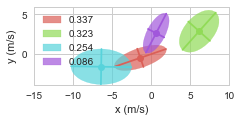

In [67]:
fig_gmm, ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 6.2 Bivariate Goodness-of-fit statistics

In [68]:
gof_df(gmm_pdf_result, kde_result, BIN_WIDTH)

R_square    K_S Chi_square        Chi_square_2           MSE RMSE / Max  \
0    0.995  0.014    797.271  12750988508698.352  4.502970e-08      0.012   

  RMSE / Mean  
0       0.130

In [69]:
# Empirical Power
gofs_mean_set_bivar

Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  \
year_lim                                                                     
(2001, 2006)    0.368445  13023.495223  0.081285  5.173603e-07    0.039272   
(1991, 1996)         NaN           NaN       NaN           NaN         NaN   

              RMSE / Mean  R_square  
year_lim                             
(2001, 2006)     0.435087  0.943203  
(1991, 1996)          NaN       NaN

In [70]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plt.gca().set_xlabel('x')
plt.gca().set_ylabel('y')

plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,kde_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig_gmm = plt.figure(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,pdf_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig = plt.figure(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,residual_Z,  xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXm0I/V9J/qpKpWWK11d3X3fG2NWO4BxNsykJwQbQ04I
OSbOic+Q8Uvm5TB24pDYmMXwDB1jO4bJACZDZzBnGhLg8ZxnEzzvxTZexknsGPfDTgBj+m66m5Z7
te+q5f2h/tX9qVRVqipJ90pNfc7p092SqupXpaqPvuvny8iyLMOBAwcOzlGwR70ABw4cOOgkHJJz
4MDBOQ2H5Bw4cHBOwyE5Bw4cnNNwSM6BAwfnNBySc+DAwTkNh+QcOHBwTsMhOQcOHJzTcEjOgQMH
5zQcknPgwME5DYfkHDhwcE7DITkHDhyc03BIzoEDB+c0HJJz4MDBOQ2H5Bw4cHBOwyE5Bw4cnNNw
SM6BAwfnNBySc+DAwTkNh+QcOHBwTsMhOQcOHJzTcEjOgQMH5zQcknPgwME5DYfkHDhwcE7DITkH
Dhyc03BIzoEDB+c0XEe9AAdHD1mWUalUIAgCOI4Dz/NgWRYMwxz10hw4aBmMLMvyUS/CwdGhXC4j
nU6jv78f1WoVALCzs4PBwUH09/eDZVmH9Bz0NBxL7i0MURRRLBYRj8fh9/shCAJ4nocsy5BlGaIo
QhAEVCoVMAwDjuMc0nPQc3BI7i0IWZYhCAJEUQTDMBBFESsrKxBFES6XC5IkoVAowOPxwOU6uEUI
6ZXLZbAsC47jwHEcXC6XQ3oOuhaOu/oWgyRJqFarIF/77u4uEokE5ubm4Ha7UalUEIlEwDAMqtUq
XC4X+vr64PP50NfXB47j6vZH9sMwjEJ2Lper4XMOHBwVHEvuLQLifoqiCAAQBAFbW1uQJAk8z6O/
vx+VSgVerxc8z2NgYAB+vx/lchmFQgHpdBrRaFQhPUJ8NJkJggBZllEulx3Sc9A1cEjuLQBJkiAI
AiRJAsMwyGaz2N7extDQEILBIMLhcN3nGYaBLMtgGAZerxderxdDQ0OQZRmlUgnFYhGpVAqRSAQ8
zyuEZ0R6LFurVqpWqwgGgw7pOTg0OCR3joPE0UgyIRKJIJPJYHZ2VrHUzEYsGIZRyIwmvUKhgFQq
hd3dXbjd7jr3lpCbLMsoFouIxWJKAoP87Vh6DjoJh+TOUajd00qlgs3NTbjdbiwvLysJhVaSBTTp
ATWLkVh6yWQSu7u78Hg8CuGRbYilqLb0HNJz0Ak4JHcOQu2eJpNJRCIRjI2NYWhoqIHY1JYcISGr
YFlWidcNDw8rpFcoFJBIJFAqlQAAe3t7CjnSlp5Deg46AYfkzjHQ7qkkSdjd3UWxWMTi4iK8Xm/D
5ztZ9kGTHgDk83nEYjEAwP7+PsrlMrxer2Lpeb1eh/QctB0OyZ0jkGUZ0WgUfX198Hg8KJVK2Nzc
hN/vx/LyskIeetsCnSU8oEZ6LMtiZGQEQM3iLBaLKBQK2NvbU0iPxPTMkp7b7XZq9BzowiG5cwCk
9i2ZTMLlciGbzSIej2NqagoDAwOG22qRg113tRnUx2JZFn6/H36/H8BBBwbpwqhUKopbSyw9sg81
6VUqFYiiiMHBQfA875CeAwUOyfU4SOcCAXEHl5eX4Xa7Te2jW+rBOY5DIBBAIBAAcEB6hUIBsVgM
1Wq1wdIjZEYSHj6fD6VSqa4jwyG9tzYckutRqFuzcrkcisUi+vv7MTs7a/qh1vtcNxCfEelFo1EI
gqCQHiF6taVXrVYd0nuLwyG5HgSdXACAaDSKZDIJr9eLUCjU8gPcrQSgJj1BEBTSy+VySskMsfQ8
Ho9Deg4ckuslqGvfqtUqtra2wDAMlpeXsbOzY3mfnYq/HQZcLhf6+/vR398Pj8eDYrGIQCCgFCeL
oqjE8/r6+uoSFDTpkUQGIT6H9M4tOCTXI1DXvmUyGWxvb2NkZAQjIyN1RbbtQC8SH8uyCukBNUuv
UCgobWi0lacmPUmSlAQOTXoulwsul8shvR6GQ3I9AFEUFUFLWZaxu7uLbDaL+fl5pQYNsGeVkW3y
+TzS6bTSvdBr0Dpvl8uFYDCIYDAIoGb5Evc2lUpBkqQ6S4+24GjSq1aryGazGB8fd0ivB+GQXBdD
nVwgtW9erxfHjh1rS0EsIYetrS0Eg0GkUikUCgW4XC7F3aM7E7oZzYiH53nwPF9HesTSSyQSkGW5
ztIjpEcsQuLeMgzjWHo9BIfkuhS0ewoAiUQC0WgU4+PjGBwcbEt9W7VaxebmJgBgaWlJeT0WiynH
pTsTiMVDl270Moik1MDAAGRZrrP0EokEAMDn8ylCokSZBai39BzS6244JNeFSCaT4DgOHo8HkiRh
Z2cHpVJJtzWLwArJ0XJLhUIBPM8rLjHDMHC73RgaGgJQ35mgrlcjHRa9/lCTc3a73XWkVygUkM1m
US6Xsba2pmnpAQ7pdTMckusiEPd0b28PwWAQoihic3MT/f39TVuzrBwjGo0ilUphZmYGgUAA8Xjc
kBy1OhOImxeJRCAIgm4W87DQ7kQJTXo8zyORSGB8fByFQgH5fB57e3tgWVY5b5/Pp0t6AOrmY3Ac
55DeIcIhuS4BXftGsqf5fN5UaxZBM0uOuKcsy+LYsWN18xus7IfjOM0sJh3Q17N4OolOHUOWZaVH
1u12IxQKKWMcSY0e0cmjyZ624BzSOzo4JHfEUNe+iaKIfD4PlmUttWYBxuRE3NPh4WGl5MTMdmag
lcUkpLe/vw+GYZSHvhdLU7TAMAw8Hg88Hg8GBwfrSC+bzSqkR0vF65FePB5HKBSC3+9XFFYc0msf
HJI7QujJkrtcLoRCIUsEpwfinqbTaUUNuNPQCuiTh79SqSixLfrh72bQCQc9aJFeuVxGsVhEJpNR
5mPQ7i0hvVKppGRuK5UKADTMx3BIzz66++46h6FuzYpEIkqcLJPJ2Lqp1RYZUQPmOK5ODVhvO/Xf
7QAd2/J6vYhEIpicnEShUKh7+PWG43QD7FwLej4GTXpaQ4HoLDr53ol1r55565CedTgkd8hQ176R
OJnL5VLiZNls1vaDRbbT6ojoFqgtHno4Dj0ngpCemYSLGWurFbSjH1hvKJAoisp505YeTWYO6dmH
Q3KHCLV7mk6nsbOzg9HRUQwPDys3aiuWFFEDzmQyDR0RRjiMWJlebR89HEdLMl1PPfiw0AkCpc87
k8lgYmICsizrDgVySM8+HJI7JNC6b7IsY2dnB/l8HgsLCw2tVHZJTpIkpTXLyD1VQ/1AMAyjuE+H
DbVkOl2jRwtpamnK9Sro7K3ZoUDEwnVIrzkckusw9FqzCBFpxZ/skFw6nUYikUBfXx/m5uYs39Sd
dvfsQk89mNaU8/l8kGVZyd62+zw6fW209m9mKJDH46mz9NSkJwgCKpUKdnZ2MD09DZ7n35Kk55Bc
B0E31gO1FqlYLIaJiQkMDg7qbmfFkpIkCZFIBNlsVmn3snoD99INr6cpRx78fD6v23TfrTBDoloW
LiG9ZkOBSNyPlLnQlh7P83XkeC7CIbkOgNS+vfrqqzh27BgAYGdnB5VKBUtLS/B4PIbbm7XkyuWy
Mkv12LFjSCaTdaRqdc3tiAkeNoimXLlcBsMwCAaDdU33ABpIzyqOwpJrBiO3nh4K5PP5GjK3QL2l
d66TnkNybYa6sT6fzyMSiSAYDGJmZsZU0NwMyZCkBT1L1S45ke0qlUrX16w1g16NHt2KRXdj9Pr5
Eqjdepr0AGB1ddVQZEGL9DiOU+r1epn0zo1vuEugrn0jzfXT09NKN4BZ6JEVcU9zuVxD0sIuyZFE
SKlUAsMwyo1dqVTaUpB8VKBr9NStWKQrwUyNXjdacs1ASM/n8yGVSmFpaUmZhBaLxQwnoQEH97Ja
Kr4XSc8huTa

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAO0AAAC0CAYAAAB4zKuwAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAHLJJREFUeJztnW1QVOfZx/+7Z1kkgNL4gogBBSTFPBqj+JLEYqNVEsbG
UGqQGDqdOs3U1lQbkxobFJuAmBjNBzG2YaYxKhTUflCnHauRRBN9QjQ+UCIICeoiGIGoxIUS0N3z
fFjPYV/O676f5frNZMLuebuP+uO6z32u+750LMuyIAhCM+gD3QCCINRB0hKExiBpCUJjkLQEoTFI
WoLQGCQtQWgMQ6Ab4A5ffPFFoJtABDkzZsyQ3ef/ak/AaokR3GY0GjFlyhRvN8sraFJaANhfdErx
vuYeM6Kjon3YmsAS6vcHqLvHZwsyFO1ntcQgNqFEcFtH63rFbfM31D0mCI1B0hKExiBpCUJjkLQE
oTFIWoLQGCQtQWiMgEhbV1eH/Px8AIDJZEJeXh6ee+45FBYWwmq1BqJJBKEZ/C5tWVkZCgoK0N/f
DwAoKSnBmjVrUFFRAZZlceLECX83iSA0hd+lTUhIwI4dO/jPFy5cwKxZswAAGRkZOHPmjL+bRBCa
wu8ZUZmZmWhra+M/sywLnU4HAIiMjITZbFZ0HnOPsv3c3V9rhPr9AUPjHpUQ8DRGvX4w2Pf29mL4
8OGKjlOTthfqaX6hfn9AcN2j1WrFpk2b0NTUBKPRiKKiIiQmJvLbq6ursXPnThgMBuTk5ODZZ5/l
t9XV1eHtt9/G3r17AQA3btxAQUEBbt++DYvFgrfeegsJCQmS1w+4tJMnT0ZNTQ1mz56NU6dOYc6c
OYFuEkFI8uGHH2JgYABVVVWora3Fli1bsGvXLgDAnTt3UFJSgoMHDyIiIgJ5eXmYP38+Ro0ahbKy
Mhw+fBgRERH8ubZu3Yqf/vSnyMrKwmeffYZLly7JShvwVz7r1q3Djh07kJubizt37iAzMzPQTSII
Sb744gv86Ec/AgBMmzYNX375Jb+tpaUFCQkJGDFiBIxGI2bMmIGzZ88CcB3PAYDz58+jo6MDv/zl
L3HkyBF+fEeKgETa8ePHY//+/QCAiRMnYt++fYFoBkGgpi9R8PsJEsf09PQgKiqK/8wwDO7evQuD
wYCenh5ERw924yMjI9HT0wPAdTwHANrb2zF8+HDs3r0bpaWlKCsrw+rVqyXbHPBISxBaIyoqCr29
vfxnq9UKg8EguK23t9dBYmdiYmIwf/58AMD8+fMdorYYJC1BqGT69Ok4dco2n7u2thapqan8tuTk
ZJhMJnR3d2NgYADnzp3DI488InquGTNm4OTJkwCAs2fPIiUlRfb6AR+IIgitsXDhQpw+fRrLli0D
y7LYvHkzjhw5gv/+97/Izc3Fq6++ihUrVoBlWeTk5CA2Nlb0XOvWrUNBQQEqKysRFRWFbdu2yV6f
pCUIlej1erz++usO3yUnJ/M/z58/n+/yOmM/ngMA8fHxeP/999VdX9XeBEEEHJKWIDQGSUsQGoOk
JQiNQdIShMag0WPCLzTf7JPcnnp/hOR2YhCSlvAZzqImT3lAcL+W+qv8viSvPCQt4VWUiiq0D8mr
DJKW8Bh3RBWC5FUGSUu4jb2s7ooqhJC8cUavnV7zkLSEKnwlqhD28rb16ZAWJXOAG1zqaRP8foL3
L+U1SFpCEf6U1ZnkKQ+gufYKmm/2eb273G15zKvn8wckLSFJIGW1Jy55JDqvdAfs+sEESUsI4g1Z
6823FO87JfoHsvskT3kAzfVXh/zgFElLuMAJ646s9qImTxqr6JiWr67zxymRd6hD0hI8/pbVeX9O
XjlxffFsqyWCRtrs7Gx+sazx48ejpKQkwC0aOnjSFfZEVme44+u/ui4qbvKUB9BSf9Wj62idoJC2
v78fLMvyCzgT/sHT51ZOWE9lFTs3dZWFCQppL168iL6+PvzqV7/C3bt38dJLL2HatGmBbpZmkUvO
5/BkNNiXwiZPGouWr657/byhQlBIO2zYMKxYsQJLly7FlStX8Otf/xpHjx7ll6UklOGv1zNqha3r
7XL4/HDkaK+3aSgRFFZMnDgRiYmJ0Ol0mDhxImJiYtDV1YW4uDjRY6gAlyONXbYFseOSRwKA4kJm
avjaYitPOi5+uOQ1vmJ7HT6PHzOYytTW2YPzt21RdJIuUvRady0Wl/ObzWZ803ID4yPYkP/7lCIo
pD148CCam5uxadMmdHR0oKenB6NHS/82pgJcgzR29YBhGJ9HVwPDSEZXLqIyYJCaOEZwnzS7v4dm
U6do1DUwjot8m81mREdHo5PpRnTU0B05BoJE2p///OdYv3498vLyoNPpsHnzZuoaK8ST1zRKUNIV
5mQVE1WKut4uzXWXvVk1r7GxEW+88QYYhoHRaMSbb76JUaNGSV4/KMwwGo2KFmkmHOFnwNzrEnsb
XwubmjgGzaZO9xoXQLxZNa+4uBgbNmxAWloaKisrUVZWhvXr10ten9aI0jhiEbbefIv/zx3khK3r
7fJIWC3jzap527dvR1paGgDAYrEgPDxc9vpBEWkJ9Yi91hFKdqi3e30i9+5TSbKEr2UVe93ji6SK
xm6RV0v3iR/jzap5Y8bY/gzPnz+Pffv2oby8XLbNJK2GcY6yYtHROU0QcJVXjayAuLC1dzocPk8L
E69jIzUQJfbLxdvpi5HWNNXHeLNqHgD861//wq5du/Dee+/h/vvvl70+SatBhKKskudP+231AtHM
k2dXe1nTxg3uU3vN9r2UvPZoIali+vTp+Oijj5CVlSVZNe++++7DuXPnsGLFCtFzHTp0CFVVVdi7
dy9iYmIUXZ+k1Sj2UfZrS7/s6xiX491IjJAT1l5WjrRxY9B4Td1gU7CnL3qrap7FYkFxcTHi4uLw
4osvAgBmzpyJ3//+95LXJ2k1RvPNPsHBJ1+kEyqNrkKyeptvWm6AYRifX0cJ3qqaxzAMPv/8c9XX
J2k1hFS32Bn7CKn2PahcdBXrCktRe6fDoYss9KqnRWJ2D0ArM3KQtBpBKImCE5ZLKxSSrdnUqVhg
X8jK7SvURVb6y2SoT8VzhqTVAFJZT8mTxjrk6DrLZv9ZSGDnZH5fdIWVPNPKDUCNj2BVXzdUkZT2
5s2bKC8vR3V1NUwmE/R6PRISErBgwQLk5eUpGp4m3EdK1nrzLYfn2LreLtn3pmICSx3nredWJaPH
Ql1jirKuiEpbXl6OY8eOYdGiRdiyZQvi4+NhMBjQ1taGmpoarFq1Ck8++SR+8Ytf+LO9IY/c9Drn
Vzt1vV2wsBakJYrPiBJCTnB3u8JKcH6elUumSL0/YkjP6nFGVNrY2Fh88MEHLt+npKQgJSUFy5cv
x7///W+fNm6ooLSshpCwgOPUN+fkBkD5O1Lnc/hyVNj5edZfyRShgKi0P/nJT/ifBwYGYDQaYTKZ
cPnyZWRkZECv1yMzM9MvjQxF1NS/EcpWsu/amnvMopGx8Vonv01OXl/I2nitU3LUWCrKkrDCyA5E
lZaWorW1FWvWrMHy5cuRkpKCDz/8EEVFRf5oX0ihtlCVWGqh87Nos8EMBoxocgPgKC8wKLAvu8Fi
A1ByUZaeY6WRlba6uhqVlZXYvXs3nn76afzxj3/Ez372M3+0TfO4U03O+b2rlKyccIkxUbL5rWLR
13mbt+CEVRtl7Z9jCWFkpbVarTAajfjoo4+wZs0aWK1W9PUpWzhsqCGU/OAtUTlSE8e4CGc2m9HE
tgqe+0Fdgst3vs5gkhKWi7KcsPZRloRVhqy0jz76KBYvXoxhw4Zh5syZeP7550VTtIYa7koKSIsK
CCc61N7pcHjubGJb0cS24u4wC6aOdh09bujqRBPbKiiur3BXWA5/C9vQJfIOOeohv7ZDDaLSnjx5
EnPmzMG6deu

In [71]:
%%time
if df_all_years.index.year[0] <= 2000:
    # GMM test against previous data
    fig1, ax1 = plt.subplots(figsize=(3,2.5))
    fig2, ax2 = plt.subplots(figsize=(3,2.5))
    gofs_mean_set_bivar_previous = []
    prop_cycle = iter(mpl.rcParams['axes.color_cycle'])
    for year_length in [10]:
        color = next(prop_cycle)
        start_year, end_year = df_all_years.index.year[0], 2015-year_length+1
        gofs_bivar_previous=Parallel(n_jobs=-1)(delayed(gmm_gofs_in_previous)(df_all_years[str(sub_start_year):str(sub_start_year+year_length-1)], gmm_pdf_result, config) 
           for sub_start_year in arange(start_year, end_year+1)) 
        gofs_bivar_previous=pd.DataFrame(gofs_bivar_previous, index=arange(start_year, end_year+1))    
        gofs_bivar_set[year_length].plot(y='R_square',ax=ax1, style='--', color=color, label='Empirical')
        gofs_bivar_set[year_length].plot(y='K_S',ax=ax2, style='--', color=color, label='Empirical')
        gofs_bivar_previous.plot(y='R_square', color=color, ax=ax1, label='GMM on previous')
        gofs_bivar_previous.plot(y='K_S', color=color, ax=ax2, label='GMM on previous')
        year_lim = end_year-year_length-5, end_year-year_length
        gofs_mean = gofs_bivar_previous.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
        gofs_mean['year_lim']=year_lim
        gofs_mean_set_bivar_previous.append(gofs_mean)

    print('10 year comparison')
    plt_configure(ax=ax1, ylabel='$\ R^2$', xlabel='start year', legend=True)
    plt_configure(ax=ax2, ylabel='K-S', xlabel='start year', legend=True)
    align_figures()
    display(pd.DataFrame(gofs_mean_set_bivar_previous).set_index('year_lim'))

Wall time: 2 ms


## 6.3 Univariate Goodness-of-fit

In [72]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

def f_em(V,theta):
    return (mixed_model_pdf_em([[V*cos(theta),V*sin(theta)]]))*V

In [73]:
kap_params = distr.kap.lmom_fit(df.speed.copy().as_matrix())
kap = distr.kap(**kap_params)
speed_params = kap_params['k'], kap_params['h'], kap_params['scale'], kap_params['loc']

In [74]:
%%time
x = bins = arange(0, max_speed+BIN_WIDTH, BIN_WIDTH)
# 1. Fit Weibull
_, y_weibull, density_expected_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed, x=x)

# 2. GMM Model
_, _, density_speed_expected_gmm, y_cdf_gmm, density_dir_expected = gmm_marginal_distribution(f, bins, bin_width=BIN_WIDTH)

y_gmm_em  = array([integrate.nquad(f_em, [[x_, x_+BIN_WIDTH],[0, 2*pi]]) 
                   for x_ in x])[:, 0]

# 3. Plot Comparison
df['speed'].hist(bins=bins, alpha=0.5, label='Data')
plot(x[:-1]+BIN_WIDTH/2, density_speed_expected_gmm*len(df.speed),'-', color='black', label='GMM')
plot(x, y_weibull*len(df.speed)*BIN_WIDTH, '--', color='black', label='Weibull') 
plot(x, kap.pdf(x)*len(df.speed)*BIN_WIDTH, '-.', color='black', label='Kappa')

print('Speed Distribution Comparison')
plt_configure(xlabel='Speed'+speed_unit_text, ylabel='Frequency', 
              legend=True, figsize=(4, 2))
plt.gca().set_ylim(bottom = 0)
plt.tight_layout()
plt.locator_params(axis='y', nbins=5)

density, _ = np.histogram(df['speed'], bins=x, density=True)
R_square_gmm = sector_r_square(density*BIN_WIDTH, density_speed_expected_gmm)
R_square_weibull = sector_r_square(density*BIN_WIDTH, density_expected_weibull)
R_square_gmm_em = sector_r_square(density*BIN_WIDTH, y_gmm_em[:-1])

print(R_square_gmm, R_square_weibull, R_square_gmm_em)

Speed Distribution Comparison
0.853829510462 0.846771035919 0.757626029424
Wall time: 39.7 s


In [75]:
density_expected_kap = kap.cdf(bins[1:]) - kap.cdf(bins[:-1])
print(sector_r_square(density*BIN_WIDTH, density_expected_kap))

beta_params = sp.stats.beta.fit(df.speed)
density_expected_beta = beta.cdf(bins[1:], *beta_params) - beta.cdf(bins[:-1], *beta_params)
print(sector_r_square(density*BIN_WIDTH, density_expected_beta))

0.884472165992
0.859254971646


In [76]:
%%time
plot(x, y_ecdf,'o', alpha=0.8, label='Data')
plot(x, y_cdf_gmm,'-', color='black',label='GMM')
plot(x, y_cdf_weibull,'--',label='Weibull')
plot(x, kap.cdf(x),'-.', label='Kappa')
plt_configure(xlabel = "V", ylabel='P', legend=True, figsize=(4,3))

plt.figure()
plot(log(x), log(-log(1-y_ecdf)),'o', label = 'Data')
plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label = 'GMM')
plot(log(x), log(-log(1-y_cdf_weibull)),'--', label = 'Weibull')
plot(log(x), log(-log(1- kap.cdf(x))),'-.', label = 'Kappa')
plt_configure(xlabel='ln(V)',ylabel='ln(-ln(1-P))',legend={'loc':'best'}, figsize=(4,3))
align_figures()

# 5.2. CDF Comaprison
cdf_diff, cdf_diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
print(cdf_diff.max(), cdf_diff_weibull.max()) 
print(x[cdf_diff.argmax()], x[cdf_diff_weibull.argmax()])

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARAAAADSCAYAAACCXZ8eAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XlAVOX+x/H3zMAAM4MgiyAKqLhvISjuuCBpLuUS4ZLW
zfJq92apedO6mplbod1+lUuWV69aqdkmpViulOYCiIgIKSou7JswM+xzfn8Qk6Sh0QwD+Lz+cs45
c+Y7Z8YPz5znec6RSZIkIQiCUAtySxcgCELDJQJEEIRaEwEiCEKtiQARBKHWRIAIglBrIkAEQag1
swbI2bNnmTp16h3LDx06xIQJEwgNDWXXrl3mLEEQBDOyMteOP/roI/bs2YOdnV215WVlZaxcuZLd
u3djZ2fHpEmTGDp0KC4uLuYqRRAEMzFbC8TLy4v333//juXJycl4eXnh4OCAUqnE39+f06dPm6sM
QRDMyGwtkOHDh3Pjxo07lmu1Wuzt7Y2P1Wo1Wq32nvuLjo42aX2CINw/f3//uy43W4D8EY1Gg06n
Mz7W6XTVAqUmf/Qm6lp0dLSo5S5ELXd3t1pikjI5cOoa6Tk63JxU9GynRlWaza6tezl1M5283HQU
2lxebeFCXG42q2IqW+nPd+7K5LbtjfspNVSQW1JCTlExeWVlHNMX4TxmLo4uLZDLZax5cVCNddxv
/X+kzgPEx8eHlJQU8vPzUalUREVFMX369LouQxDMriokkq9l4pMQxdCeLXG2LeKrvUc59O0RHG+l
4lpehMIKclVqbNVqHgf2HD/A5cICFHI5TbxHYmujolXHALyGtqbQwY7PrRUUOSrQO8gpUUlUZDTH
o7QvVlZKWsmLUBgqzzu6O6nN/h7rLEDCw8PR6/WEhoayYMECpk+fjiRJTJgwATc3t7oqQxBM6vaW
hLuzmmEBXvh1aMbphDTe/e93pKckkHYtiWRdJgkVRXS0t6eLkxO9bWzB1R6obH3fkgxctlWQ52jH
4EVP0dNNgaQsYU9+b1RF3jzvouGc1RcUy/NJBeQVNsgNttiUqLDXtMSqQAmA3KA01hYU4GX292/W
AGnZsqWxm3bMmDHG5UOHDmXo0KHmfGlBMLuYpEy27U0AoLSkiJPHo/jqk3gUhVcwXL3MtVu53Pz1
5/rioQ/jqdEAcEshJ8nJjjybNhQ7+XDLvglXvSNu23MZ8go5VmVNkUkKoDIMuuhD2fvjdawqVMhQ
GLeeOrIzAAdPXSM9V4e7k5qgX4PM3Or8J4wgNDR3a2U81NaZjz8JJ/rnI1xNPIXNrTSuFxYC0N/N
nbDe/fhOW0ZMq/ZofBUkFBYQZ11CmosVOlXlf37nnA7YljQHwL6gC84qJ6YP7012hoLjMdm/hcHQ
qjBohrvK4w+Doi4C4/dEgAhCDW5vZRTpbnE46gc2v3uSjMtnaKWQMcSjBa92bouTTReWO6tRdXTH
3knOjSRH7DStaedkT0azb0lyscK6zAVHq2YEerYjKkaPdZmD8XWaaLsyMbAzHVya0cEF+ndpddd6
/Do0s0hQ/BERIIJQg28OxnH2p3CSzhwiM+UCvk5OjPZoweA+fXFUVp5vKFLK+cXDmhbd7SjUaCmS
ZNhPmUTukXwUFRL2KUOxt3ZBhoypIzvj16EZDzlnWuQnh6mJABEEqv9McbZXoCi8wPFD4Xz33V46
OzjwpHcrhowcg728cuxlsbUdZQ91YU+TS6S6qLAud8Wm1AWXbBemDelHn84tcVdVhkTy9SJaNLe/
4+dGQwyM33tgAuSPzpYLQkxSJlu/O8+N5LMkRn3PxbhISot1KJRWhI0cTm+5LQBaOzmxnjZk2/dH
1cqfl6f2QnvmDAnny8nIL6psSQTeGRL1aUyKqT0QAXL771iAtGyt8XFtQ+TkyZO89NJLtG3bFkmS
KC8vZ9q0aYwcOfKu26emppKYmCh6nyzobn9EOnnZs+Lt9ziy9xNy06/Sy7UZ41r7cL1Ld1qOb0Je
ip6k1BIutHIk26ENNqXNsSlxY0zvVshkMkb7+THaz9LvzHIeiAA5cOraXZcfPHXtL7VC+vTpw3/+
8x+gckTt1KlTad26NZ06dbpj2xMnTnD58mURIBby+z8ily6n8MW29/glai+3CvJo0bM1Dz8/hdmx
BtSGCsIDppBe/hOdRgbjWNGK7PgyDLn63/WKCA9EgKTn6O6+PPfuy2tDrVYTGhrK3r172b59O+np
6WRmZjJ06FBmz57Nxo0bKS4upkePHtjb2/PBBx8gSRI6nY41a9bQunVrk9Ui3Knqj0jmjYucifyc
pDOH8fZ24aWHA7Bq68LZbpWjNk9LXsil1lQobHiIsUzu3hOAkT0sVnq99kAEiLuzmrTsOyfsmXqo
r7OzM99//z0jRowgJCSEkpISAgMDmTNnDjNmzODy5csEBQXxySefEBYWhpubGxs2bCAiIoJZs2aZ
tBahuvhz5zi2bxOX44/RxqEJ7z39GN1yJBRFkHO9lORWvqiK2pBv72h8Tl2M5GzoHogAGRbgVa35
WsXUX5DU1FR69OjBuXPnOHHiBBqNhtLS0ju2c3NzY/ny5ahUKjIyMvDze4B/RJvY7+efdHCr4POt
77Pn8He0VzfhvSHD8bNXQ5ZEnsaG6x0eYvr8F2h5TdsoulXr2gMRIFVfBHN+QbRaLZ9//jmPP/44
RUVFLF26lJSUFHbt2oUkScjlcgwGAwCLFi3ihx9+QKPR8MorryDu7WUat5/n0BZks339BjJuxTAg
qDvvj32EtjdKAMhy8CDJ05d05zZMHdUFpZ0Kvw4qERi18EAECJin3/3EiRNMnToVuVxORUUFL7zw
Aq1bt2bevHnExsaiVCrx9vYmMzOT9u3bs379erp06cKjjz7KlClTsLOzw8XFhczMTJPW9aA6cOoa
JUVaTh7cRk7ZWXoN68LsW4PoeLUYGSUUt3Dnks9QfrFywd1JzVTRyvjLHpgAMbXevXvz888/33Xd
nj177ljm5ubG/v37ARg1apRZa3sQSZLEkR/2cPTrtXgO8SJg8hAGRBfS6WoReRpH+r00i6Y9/QmS
ySxdaqMiAkRo8C4kJjI37BUOffodwz1bkSvvgXWuN9eataVcnktF5x6M7tXT0mU2SiJAhAZLr9fz
6gdLSJSn0ORhD1bpHiWgSMbJDr1JzPWkQqXiupsLU3t7W7rURksEiNDgxCRl8u7Oj8mwicPd3QF7
ZVNayZoTsvJFbn55GJp2QZ5egIeLRvSmmJkIEKFB+SnmCm98sRjXzmqGJ1jj/3M2h7oO5rGpobRs
3YyW8zrSm/p1TdTGTNyZTmgwTp48ydiRg1CeOM/kb7LoHa+nzFqNCnsO/sF0BcG8RAtEqPeib8Tx
/g8fs2fuZp7xass4TWsMJTKSPHuQ4N2LCislchNOSxDunwiQv+D69euEhYWRnp6Ora0ttra2zJ8/
n4iICNatW8eRI0eMF4zOyckhMDCQN998k4CAAIKCgpg3bx4zZsww7m/mzJnodDq2bdtmqbdUb8Qk
ZfLdqfMkFB2kwiGHFvnFbB44FBeZFbfUzpzuOIx8+9/ObdTFFciFOzWaAJk/fz6ff/65SfYVEhJC
WFhYjdsUFRUxa9Ys3nzzTXr0qJxpFRcXx9KlSwkICKBVq1bs27ePp59+GoC9e/fSvHlz4/O9vLzY
v3+/MUDy8vJISUkRt/gEohMz2HB0D/maGJQqAz2/z6RPthxJrsRqyMMcLG+DQa6o9hwxb8UyxDmQ
Wjp8+DB9+vQxhgdA9+7d2bp1KwAjR44kIiKi2vZDhgwxPm7atCnOzs4kJycDsG/fPkaMGFFH1ddv
m05/xi3HGFxTtTy+M40+2XJuqZw4N2QqvV98jimju+HhokEul+HhojFeJlCoe42mBRIWFnbPVoMp
3bhxAy+v3/7

0.0208540809718 0.0340803169554
2.5 2.5
Wall time: 449 ms


In [77]:
print(np.abs(y_ecdf - kap.cdf(x)).max())

y_cdf_beta=beta.cdf(x, *beta_params)
print(np.abs(y_ecdf - y_cdf_beta).max())

0.0185726116574
0.0245215594102


In [78]:
dir_ =df['dir'].as_matrix()
dir_data = [cos(dir_/180*pi), sin(dir_/180*pi)]
n_vM_dir = N_VM_DIR

In [79]:
%%R -i dir_data,n_vM_dir -o result,theta,alpha
result = movMF(dir_data, n_vM_dir, nruns = 10)
theta = result$theta
alpha = result$alpha

In [80]:
# print(result)
dir_params = [[sqrt(sum(power(theta_,2))), np.arctan2(theta_[1], theta_[0]), alpha[i]] 
                     for i, theta_ in enumerate(theta)]

In [81]:
# 1. Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
density, _ = dir_hist(df['dir'], bins=arange(-5, 375, 10), density=True)

# 2. Caculate von Mises
y_vonmises = von_mises_mixture_pdf(x, dir_params)

# plot
plt.bar(arange(0, 360, 10), density*10*len(df['dir']), width=10, alpha=0.5, label='Data')
plot(x/pi*180, density_dir_expected*len(df['dir']) ,'-', color='black', label='GMM')
plot(x/pi*180, y_vonmises*2*pi/36*len(df['dir']), '-.', color='black', label='VM')
plt_configure(xlabel='Direction'+dir_unit_text, ylabel='Frequency', 
              legend={'loc': 'best'} ,tight='xtight',figsize = (4,2))
plt.tight_layout()
dir_fig = plt.gcf()
print('Direction Distribution Comparison')
print(sector_r_square(density*10, density_dir_expected[:-1]))
print(sector_r_square(density*10, (y_vonmises*2*pi/36)[:-1]))

Direction Distribution Comparison
0.983488668008
0.990298616199


In [82]:
phi = phi_from_speed_dir(df.speed, df.dir, speed_params, dir_params)
phi_data = [cos(phi), sin(phi)]
n_vM_phi = N_VM_PHI

In [83]:
%%R -i phi_data,n_vM_phi -o result,theta,alpha
result = movMF(phi_data, n_vM_phi, nruns = 10)
theta = result$theta
alpha = result$alpha

In [84]:
connection_params = [[sqrt(sum(power(theta_,2))), np.arctan2(theta_[1], theta_[0]), alpha[i]] 
                     for i, theta_ in enumerate(theta)]

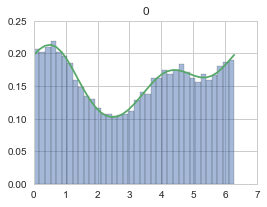

In [85]:
fig, ax = plt.subplots(figsize=(4,3))

x = linspace(0,2*pi, num=36+1)
y = von_mises_mixture_pdf(x, connection_params)
pd.DataFrame(phi).hist(bins=x, ax=ax, alpha=0.5, normed=True)
ax.plot(x, y, label='vonmises pdf')

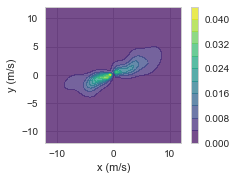

In [86]:
al_pdf = generate_al_pdf_from(speed_params, dir_params, connection_params, cartesian=True)

X = Y = PLOT_AXIS_RANGE
XX, YY=np.meshgrid(X,Y)
coords=np.array((XX.ravel(), YY.ravel())).T

x = [np.sqrt(x**2 + y**2) for x,y in coords]
alpha = [np.arctan2(y, x) for x,y in coords]
al_pdf_result = al_pdf(x, alpha)
al_Z = al_pdf_result.reshape(XX.shape)

fig = plt.figure(figsize=pdf_fig_size)
plot_2d_prob_density(X,Y,al_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

In [87]:
with np.errstate(divide='ignore'): # papermill has bugs
    display(gof_df(al_pdf_result, kde_result, BIN_WIDTH))

R_square    K_S Chi_square Chi_square_2       MSE RMSE / Max RMSE / Mean
0 -0.414928  0.199        inf          inf  0.000012      0.199       2.139

In [88]:
speed_params, dir_params, connection_params

((0.33500017366075685,
  0.58988891283843048,
  4.8540095546161659,
  2.6348222549027365),
 [[19.590595449930674, -2.8642687016743351, 0.20865858880247062],
  [5.8289767997835584, -2.8197268592286768, 0.16022097507515282],
  [18.933241662546124, 0.42769255502218029, 0.20351358146247797],
  [2.380072407656276, 0.60220347441169109, 0.30130149334017264],
  [1.386204627080948, -2.5911464344006214, 0.12630536131972595]],
 [[1.0663777372565459, 0.5812537460599575, 0.50074825065120965],
  [0.77519625985175877, -2.0300137267762617, 0.4992517493487903]])

In [89]:
# Empirical Power
if 'gofs_mean_set_df' in globals():
    display(gofs_mean_set_df)

k_s  r_square  r_square_dir
year_lim                                      
(2001, 2006)  0.046429  0.958321      0.928008
(1997, 2002)       NaN       NaN           NaN
(1991, 1996)       NaN       NaN           NaN

In [90]:
%%time
if df_all_years.index.year[0] <= 2000:    
    fig1, ax1 = plt.subplots(figsize=(2.8,2.5))
    fig2, ax2 = plt.subplots(figsize=(2.8,2.5))
    fig3, ax3 = plt.subplots(figsize=(2.8,2.5))
    prop_cycle = iter(mpl.rcParams['axes.color_cycle'])
    gofs_mean_set = []

    x = arange(0, df['speed'].max()+BIN_WIDTH, BIN_WIDTH)
    _, _, density_speed_expected_gmm, y_cdf_gmm, density_dir_expected = gmm_marginal_distribution(f, x, bin_width=BIN_WIDTH)
    _, _, density_expected_weibull, y_cdf_weibull = fit_weibull(df.speed, x)

    for year_length in [10]:
        start_year, end_year = df_all_years.index.year[0], 2015-year_length+1
        gofs = []
        for sub_start_year in arange(start_year, end_year+1):
            df_previous = df_all_years[str(sub_start_year):str(sub_start_year+year_length-1)]

            _, _, density_speed, y_ecdf_previous, density_dir = empirical_marginal_distribution(df_previous, x) 

            r_square_speed = sector_r_square(density_speed*BIN_WIDTH, density_speed_expected_gmm)
            r_square_speed_weibull = sector_r_square(density_speed*BIN_WIDTH, density_expected_weibull)

            k_s_speed = (np.abs(y_ecdf_previous - y_cdf_gmm)).max()
            k_s_speed_weibull = (np.abs(y_ecdf_previous - y_cdf_weibull)).max()

            r_square_dir = sector_r_square(density_dir*10, density_dir_expected[:-1])
            gofs.append({'year': sub_start_year, 
                         'r_square': r_square_speed, 'k_s': k_s_speed, 'r_square_dir': r_square_dir,
                          'r_square_weibulll': r_square_speed_weibull, 'k_s_weibulll': k_s_speed_weibull})

        gofs=pd.DataFrame(gofs).set_index(['year'])  
        year_lim = end_year-year_length-5, end_year-year_length
        gofs_mean = gofs.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
        gofs_mean['year_lim']=year_lim
        gofs_mean_set.append(gofs_mean)

        color = next(prop_cycle)
        # GMM agains previous data
        gofs.plot(y='r_square', ax=ax1, color=color, label='GMM on previous')
        gofs.plot(y='k_s', ax=ax2, color=color, label='GMM on previous')
        gofs.plot(y='r_square_dir', ax=ax3, color=color, label='GMM on previous')
        # Empricial agains previous data
        ax1.plot(gofs_univar_set[year_length].r_square, color=color, linestyle='--', label='Empirical')
        ax2.plot(gofs_univar_set[year_length].k_s, color=color, linestyle='--', label='Empirical')
        ax3.plot(gofs_univar_set[year_length].r_square_dir, color=color, linestyle='--', label='Empirical')
        color = next(prop_cycle)
        gofs.plot(y='r_square_weibulll', ax=ax1, label='Weibull', color=color)
        gofs.plot(y='k_s_weibulll', ax=ax2, label='Weibull', color=color)

        plt_configure(ax=ax1, ylabel='$\ R^2$', xlabel='start year', legend=True)
        plt_configure(ax=ax2, ylabel='K-S', xlabel='start year', legend=True)
        plt_configure(ax=ax3, ylabel='$\ R^2$', xlabel='start year', legend=True)

    align_figures()
    display(pd.DataFrame(gofs_mean_set).set_index('year_lim'))

Wall time: 2 ms


## 6.4 Sectoral Comaprison

In [91]:
%%time
incre = max(SECTOR_LENGTH, 10)
density_collection=Parallel(n_jobs=-1)(delayed(direction_compare)(gmm, df, angle, incre, bin_width=BIN_WIDTH) 
                                        for angle in arange(0, 360, incre))  
# This R square is computed as in paper 
# Comparison of bivariate distribution constructionapproaches for analysing wind speed anddirection data
# http://onlinelibrary.wiley.com/doi/10.1002/we.400/full
print(true_R_square(density_collection, len(df)))

(17.344451154731274, 0.00015767045854551807, 1172.0034313841188, 13.317781703578515, 0.91285852185156258, 0.91638532703800868)
Wall time: 15.3 s


In [92]:
al_params = [speed_params, dir_params, connection_params]

In [93]:
# %%time
# incre = max(SECTOR_LENGTH, 10)
# al_density_collection=Parallel(n_jobs=-1)(delayed(al_direction_compare)(al_params, df, angle, incre, bin_width=BIN_WIDTH) 
#                                         for angle in arange(0, 360, incre))  
# print(true_R_square(al_density_collection, len(df)))

In [94]:
# %%time
# true_R_square_mean_set=[]
# for year_length in [10]:
#     start_year, end_year = df_all_years.index.year[0], 2015-year_length+1
# #     start_year, end_year = 2005, 2015-year_length+1
#     df_standard = df_all_years[str(2015-year_length+1):str(2015)]
#     true_R_square_set = []
#     for sub_start_year in arange(start_year, end_year+1):
#         df_previous =  df_all_years[str(sub_start_year):str(sub_start_year+year_length-1)]
#         emp_density_collection=Parallel(n_jobs=-1)(delayed(emp_direction_compare)(df_previous, df_standard, angle, incre) 
#                                             for angle in arange(0, 360, incre))  
#         true_R_square_set.append(true_R_square(emp_density_collection, len(df)))
#     true_R_square_set=pd.DataFrame(true_R_square_set, index=arange(start_year, end_year+1))
#     year_lim = end_year-year_length-5, end_year-year_length
#     true_R_square_mean = true_R_square_set.query('index >= @year_lim[0] & index <= @year_lim[1]').mean()
#     true_R_square_mean['year_lim']=year_lim
#     true_R_square_mean_set.append(true_R_square_mean)
#     plot(true_R_square_set[5], label=year_length)
#     display(pd.DataFrame(true_R_square_mean_set).set_index('year_lim'))

In [95]:
%%time
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 20
    
gmm_vals=Parallel(n_jobs=-1)(delayed(gmm_weibull_empirical_direction)(gmm, df, angle, rebinned_angle, BIN_WIDTH) 
                                for angle in arange(0, 360, rebinned_angle))  

Wall time: 21.1 s


In [96]:
# %%time
# y_als=Parallel(n_jobs=-1)(delayed(al_direction)(al_params, df, angle, rebinned_angle, BIN_WIDTH) 
#                                     for angle in arange(0, 360, rebinned_angle))  

In [97]:
# Turn to parrallel would run 50% faster
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10, bin_width=1):
    start, end = 0, 360
    curve_collection = []
    max_speed = df['speed'].quantile(.99)

    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre, bin_width)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        sub_df, bins, start_radian, end_radian, data_size = sub_df_at_angle(df, angle, incre, bin_width)
        x = bins
        
        # 1. Fit Weibull, Empirical and GMM PDF, CDF
        gmm_val = [element for element in gmm_vals if element['angle'] == angle][0]
        density, y_ecdf = gmm_val['density'], gmm_val['y_ecdf']
        density_expected_gmm, y_cdf_gmm, direction_prob = gmm_val['density_expected_gmm'], gmm_val['y_cdf_gmm'], gmm_val['direction_prob']
        y_weibull, density_expected_weibull, y_cdf_weibull = gmm_val['y_weibull'], gmm_val['density_expected_weibull'], gmm_val['y_cdf_weibull']
        
        # 3. R square for GMM, Weibull
        R_square_gmm = sector_r_square(density, density_expected_gmm)                
        R_square_weibull = sector_r_square(density*bin_width, density_expected_weibull)

        # 4. K-S for GMM, Weibull
        cdf_diff, cdf_diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
        
        # Makeup for Angular-Linear
        if 'y_als' in globals():
            al = [element for element in y_als if element['angle'] == angle][0]
            y_al, y_cdf_al = al['y_al'], al['y_cdf_al']
            R_square_al = sector_r_square(density, y_al)
            k_s_al =  np.abs(y_ecdf - y_cdf_al).max()
        else:
            R_square_al = None
            k_s_al = None
                
        # 5. Make Plots
        fig = plt.figure(figsize=(10,1.9))
        # 5.1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        sub_df['speed'].hist(bins=bins, alpha=0.5, label='Data')                  
        plot(bins[:-1]+BIN_WIDTH/2, density_expected_gmm*data_size*bin_width,'-', color='black', label='GMM')
        plot(x, y_weibull*data_size*bin_width, '--', color='black',label='Weibull')   
        if 'y_als' in globals():
            ax1.plot(bins[:-1]+BIN_WIDTH/2, y_al*data_size*bin_width,'-.', color='black', label='AL')
        plt_configure(xlabel = "V", ylabel='Frequency', legend=True)
        plt.axis(plot_range)
        
        # 5.2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        plot(x, y_ecdf,'o', alpha=0.8, label='Data')
        plot(x, y_cdf_gmm,'-', color='black',label='GMM')
        plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
        if 'y_als' in globals():
            ax2.plot(x, y_cdf_al,'-.', color='black', label='AL')
        plt.gca().set_xlim(right = max_speed)
        plt_configure(xlabel = "V", ylabel='P', legend=True)
        
        curves = {'direction': angle, 'datasize': data_size,  
                  'weibull_pdf': y_weibull, 'weibull_cdf': y_cdf_weibull, 'ecdf': y_ecdf,
                  'max_cdf_diff_gmm': cdf_diff.max(), 'max_cdf_diff_weibull': cdf_diff_weibull.max(),  'max_cdf_diff_al': k_s_al, 
                  'r_square_gmm': R_square_gmm, 'r_square_weibull': R_square_weibull, 'r_square_al': R_square_al}
        curve_collection.append(curves)
        
        plt.tight_layout()
        plt.show()
        print('%s degree' % (angle))
        print('data size:', len(sub_df), 'weight', len(sub_df)/len(df))
        print('GMM', 'Weibull')
        print('R square', R_square_gmm,  R_square_weibull, R_square_al)
        print('max diff:', cdf_diff.max(), cdf_diff_weibull.max(), 
              'speed value:', x[cdf_diff.argmax()], x[cdf_diff_weibull.argmax()], 'y gmm', y_cdf_gmm[cdf_diff.argmax()])
        print(' ')
    return curve_collection

0 degree
data size: 2205 weight 0.06549829199465321
GMM Weibull
R square 0.922740163971 0.926599456732 None
max diff: 0.0771057614677 0.0660911662159 speed value: 6.0 6.0 y gmm 0.649878365516
 


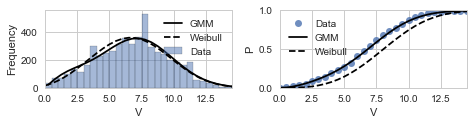

20 degree
data size: 5315 weight 0.15787910292588742
GMM Weibull
R square 0.90723270641 0.898294169925 None
max diff: 0.0259760976058 0.188356431151 speed value: 7.5 7.5 y gmm 0.588511202488
 


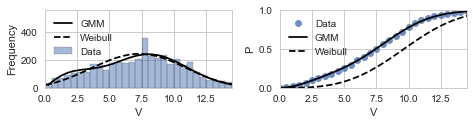

40 degree
data size: 4182 weight 0.12422397148373682
GMM Weibull
R square 0.886256140298 0.839585876822 None
max diff: 0.0129552996638 0.244271813857 speed value: 9.0 8.0 y gmm 0.677948126063
 


60 degree
data size: 1722 weight 0.05115104708153869
GMM Weibull
R square 0.820062239691 0.85685842478 None
max diff: 0.066505246662 0.0390043348093 speed value: 7.5 2.5 y gmm 0.824344967916
 


80 degree
data size: 1240 weight 0.03683350660923808
GMM Weibull
R square 0.900443037606 0.910703460603 None
max diff: 0.044769011138 0.0555748909032 speed value: 3.0 2.0 y gmm 0.416521311443
 


100 degree
data size: 551 weight 0.016367146888459826
GMM Weibull
R square 0.632510765685 0.949046624644 None
max diff: 0.192897659882 0.0598661584928 speed value: 4.5 1.5 y gmm 0.909776062785
 


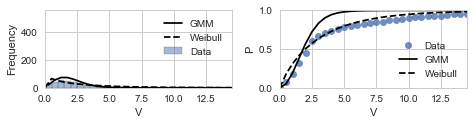

120 degree
data size: 392 weight 0.011644140799049458
GMM Weibull
R square 0.748350840951 0.837849612184 None
max diff: 0.208183228766 0.132386386841 speed value: 4.5 1.0 y gmm 0.968387310399
 


140 degree
data size: 470 weight 0.013961087182533789
GMM Weibull
R square 0.914137717065 0.840329096561 None
max diff: 0.0825243202656 0.142259272066 speed value: 7.0 1.0 y gmm 0.967630703244
 


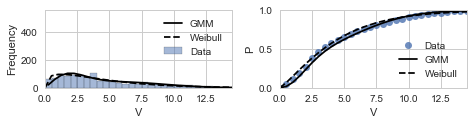

160 degree
data size: 1170 weight 0.03475419575226496
GMM Weibull
R square 0.870937868025 0.906375844847 None
max diff: 0.060810501138 0.0408472312087 speed value: 2.5 2.0 y gmm 0.322950182623
 


180 degree
data size: 3979 weight 0.11819396999851478
GMM Weibull
R square 0.87231267264 0.838944599464 None
max diff: 0.045374963161 0.0483198480156 speed value: 2.5 2.5 y gmm 0.129292038598
 


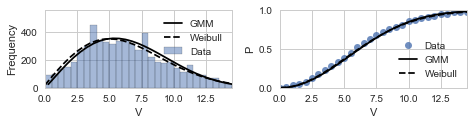

200 degree
data size: 6005 weight 0.17837516708747958
GMM Weibull
R square 0.929411459371 0.937119269164 None
max diff: 0.0469600912213 0.0377802196205 speed value: 6.0 6.0 y gmm 0.47960110778
 


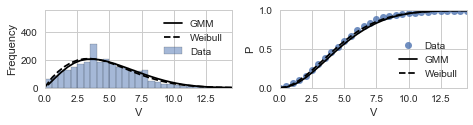

220 degree
data size: 2690 weight 0.07990494578939551
GMM Weibull
R square 0.912113738059 0.910774331369 None
max diff: 0.0559094690403 0.028365003111 speed value: 6.0 7.5 y gmm 0.692789415718
 


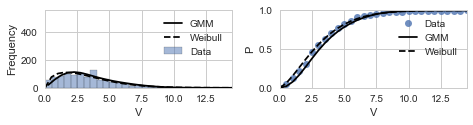

240 degree
data size: 1029 weight 0.030565869597504826
GMM Weibull
R square 0.888733647196 0.904588678875 None
max diff: 0.0787837039641 0.0548126799839 speed value: 2.5 2.0 y gmm 0.378942243558
 


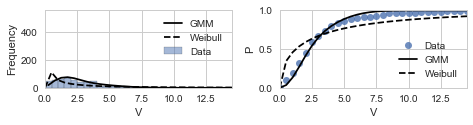

260 degree
data size: 528 weight 0.015683944749740088
GMM Weibull
R square 0.84770275633 0.0572996467034 None
max diff: 0.062863344862 0.263258913711 speed value: 1.0 1.0 y gmm 0.134106352108
 


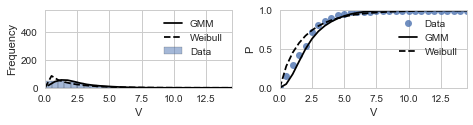

280 degree
data size: 341 weight 0.010129214317540472
GMM Weibull
R square 0.842472148574 0.864149211022 None
max diff: 0.113597100299 0.163843286042 speed value: 1.0 1.0 y gmm 0.176725480346
 


300 degree
data size: 319 weight 0.009475716619634636
GMM Weibull
R square 0.904795431865 0.926338497057 None
max diff: 0.143746992312 0.124447303531 speed value: 2.5 1.0 y gmm 0.624278086058
 


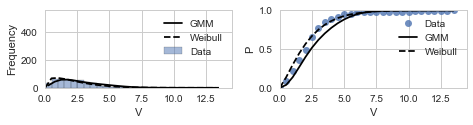

320 degree
data size: 444 weight 0.013188771721372346
GMM Weibull
R square 0.895426986285 0.947765917496 None
max diff: 0.152769738096 0.0839445251834 speed value: 3.0 2.0 y gmm 0.619752784427
 


340 degree
data size: 898 weight 0.026674587850883707
GMM Weibull
R square 0.790782596651 0.827250243785 None
max diff: 0.181658620514 0.105441943562 speed value: 4.0 2.0 y gmm 0.601192158996
 
Wall time: 9.2 s


In [98]:
%%time
curve_collection = model_data_comparison(df, SECTOR_LENGTH, rebinned_angle, BIN_WIDTH)

[0.8880957462113618, 0.877263095536223]


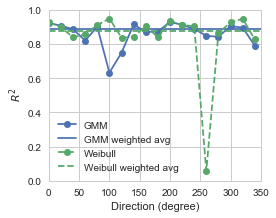

In [99]:
diff_df = pd.DataFrame(curve_collection) 

vals = [{'name': 'GMM', 'value': diff_df.r_square_gmm},
        {'name': 'Weibull', 'value': diff_df.r_square_weibull}]
if 'y_als' in globals():
    vals.append({'name': 'AL', 'value': diff_df.r_square_al})
means = plot_sectoral_comparison(vals, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="$\ R^2$", xlabel='Direction'+dir_unit_text)
ylim = min(plt.gca().get_ylim()[0],0.75)
plt.gca().set_ylim(top=1, bottom=ylim)
plt.tight_layout()
print(means)

In [100]:
vals = [{'name': 'GMM', 'value': diff_df.max_cdf_diff_gmm},
        {'name': 'Weibull', 'value': diff_df.max_cdf_diff_weibull},]
if 'y_als' in globals():
    vals.append({'name': 'AL', 'value': diff_df.max_cdf_diff_al})
means = plot_sectoral_comparison(vals, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="K-S", xlabel='Direction'+dir_unit_text)
ylim = max(plt.gca().get_ylim()[1],0.25)
plt.gca().set_ylim(top=ylim, bottom=0)
plt.tight_layout()
print(means)

[0.05594011857133093, 0.1022213421355416]


In [101]:
# Compare direction weight with previous figure
display(dir_fig)

# 7. Energy Evaluation

In [102]:
# x = arange(0, max_speed, 0.5)
# y_ =[]
# for x_ in x:
#     def sub_f(theta, V=x_):
#         return 0.5*1.225*V**3*(mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V
#     y_.append(integrate.nquad(sub_f, [[0, 2*pi]]))
# y = array(list(zip(*y_))[0])
# plot(x, y)

In [103]:
# for rad in  linspace(0,2*pi, num=9):
#     x = arange(0, max_speed, 0.5)
#     y = [0.5*1.225*x_**3*f(x_, rad) for x_ in x]
#     plot(x, y, label=rad/pi*180)
# plt_configure(legend=True, 
#               xlabel='Speed'+speed_unit_text, ylabel='Power densitiy per wind speed'+speed_power_density_unit, 
#               figsize=(4.5,3.5))

In [104]:
# for integrate_interval, line_style in zip([[0, inf], [10, 25], [0,10]],  ['-', '--', '-.']):
#     rads = linspace(0,2*pi, num=40)
#     y_ =[]
#     for rad in rads:
#         def sub_f(V,theta=rad):
#             return 0.5*1.225*V**3*(mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V
#         y_.append(integrate.nquad(sub_f, [integrate_interval]))
#     y = array(list(zip(*y_))[0])
#     plot(rads/pi*180, y, line_style, label=str(integrate_interval)+bare_speed_unit_text)
# plt_configure(legend=True, 
#               xlabel='Direction'+dir_unit_text, ylabel='Power densitiy per direction'+dir_power_density_unit, 
#               figsize=(4.5,3.5))

# 7. Result Variability & Cross-Validation

In [105]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
if 'FIT_METHOD' not in globals():
    FIT_METHOD = 'square_error'       
if 'KDE_KERNEL' not in globals():
    KDE_KERNEL = 'gaussian'
    
print(bandwidth, FIT_METHOD)

config = create_gmm_config(bandwidth, FITTING_RANGE, fit_limit, BIN_WIDTH, KDE_KERNEL, FIT_METHOD)

0.7 square_error


## 7.1  Result Variability

In [106]:
# %%time
results = Parallel(n_jobs=-1)(delayed(resampled_fitting)(df, NUMBER_OF_GAUSSIAN, config) for i in range(20))         

number of estimated clusters : 3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F0E97F0>]], dtype=object)

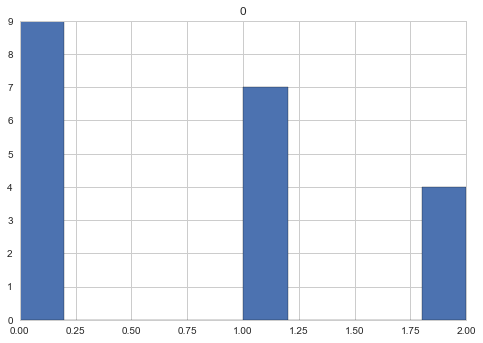

In [107]:
from sklearn.cluster import MeanShift, estimate_bandwidth

X = []
for result in results:
    X.append(result['gmm'][0][0:3])
X= np.asarray(X)

# The following bandwidth can be automatically detected using
ms_bandwidth = estimate_bandwidth(X)
ms = MeanShift(bandwidth=ms_bandwidth, bin_seeding=True)
ms.fit(X)

labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))

print("number of estimated clusters : %d" % n_clusters_)

pd.DataFrame(ms.labels_).hist()

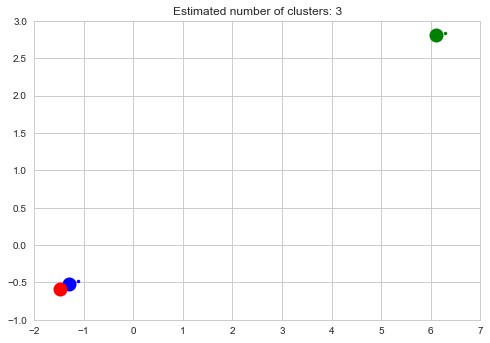

In [108]:
from itertools import cycle

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 1], X[my_members, 2], col + '.')
    plt.plot(cluster_center[1], cluster_center[2], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)

for result, label in zip(results, ms.labels_) :
    result['cluster_num']=label

Cluster Number: 0


weight  mean_x  mean_y  sig_x  sig_y   corr
1  0.335  -1.287  -0.511  3.284  1.636  0.610
2  0.320   6.196   2.869  2.521  2.670  0.476
3  0.260  -6.326  -1.622  3.915  2.249  0.016
4  0.085   0.637   2.571  1.609  2.584  0.641

R_square    K_S Chi_square        Chi_square_2           MSE RMSE / Max  \
0    0.994  0.014    723.950  15843985416955.820  5.562017e-08      0.013   

  RMSE / Mean  
0       0.144

R_square    K_S Chi_square        Chi_square_2           MSE RMSE / Max  \
0    0.994  0.014    825.453  14867202437678.713  4.731987e-08      0.012   

  RMSE / Mean  
0       0.133

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.339  -1.186  -0.490  3.459  1.635   0.633
2  0.307   6.323   2.920  2.477  2.717   0.507
3  0.253  -6.285  -1.706  3.789  2.231  -0.045
4  0.101   0.674   2.646  1.913  2.707   0.684

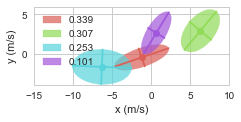

R_square    K_S Chi_square        Chi_square_2           MSE RMSE / Max  \
0    0.994  0.015   2652.082  81891460560002.578  5.082704e-08      0.013   

  RMSE / Mean  
0       0.138

R_square    K_S Chi_square        Chi_square_2           MSE RMSE / Max  \
0    0.994  0.013   1450.628  44818970038434.578  4.749549e-08      0.012   

  RMSE / Mean  
0       0.134

weight  mean_x  mean_y  sig_x  sig_y   corr
1  0.320  -1.290  -0.566  3.701  1.651  0.645
2  0.289   6.405   2.897  2.510  2.670  0.534
3  0.227  -6.590  -1.532  4.005  2.182  0.008
4  0.164   0.200   1.686  2.775  3.438  0.796

R_square    K_S Chi_square         Chi_square_2           MSE RMSE / Max  \
0    0.995  0.009   2103.666  108469843346966.047  4.568785e-08      0.012   

  RMSE / Mean  
0       0.131

R_square    K_S Chi_square        Chi_square_2           MSE RMSE / Max  \
0    0.994  0.009   1981.745  93809919448109.969  5.249075e-08      0.013   

  RMSE / Mean  
0       0.140

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.334  -1.268  -0.506  3.432  1.637   0.626
2  0.310   6.176   2.818  2.468  2.686   0.512
3  0.249  -6.344  -1.662  3.869  2.266  -0.061
4  0.107   0.651   2.498  1.909  2.762   0.664

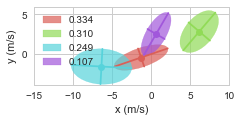

R_square    K_S Chi_square       Chi_square_2           MSE RMSE / Max  \
0    0.994  0.016    635.403  9140346584445.615  4.969356e-08      0.013   

  RMSE / Mean  
0       0.137

R_square    K_S Chi_square        Chi_square_2           MSE RMSE / Max  \
0    0.994  0.016    798.106  13134594765955.865  4.916741e-08      0.013   

  RMSE / Mean  
0       0.136

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.351  -1.219  -0.517  3.415  1.641   0.613
2  0.315   6.204   2.975  2.519  2.721   0.480
3  0.251  -6.291  -1.727  3.787  2.258  -0.048
4  0.083   0.638   2.641  1.528  2.402   0.605

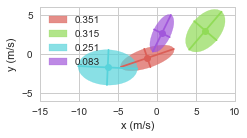

R_square    K_S Chi_square        Chi_square_2           MSE RMSE / Max  \
0    0.994  0.016    909.727  22231356531768.902  5.046337e-08      0.013   

  RMSE / Mean  
0       0.138

R_square    K_S Chi_square        Chi_square_2           MSE RMSE / Max  \
0    0.994  0.015   1061.557  22454210618941.879  4.866224e-08      0.013   

  RMSE / Mean  
0       0.135


Cluster Number: 1


weight  mean_x  mean_y  sig_x  sig_y   corr
1  0.329   6.150   2.824  2.526  2.670  0.503
2  0.325  -1.390  -0.584  3.144  1.624  0.597
3  0.265  -6.292  -1.695  3.872  2.246  0.016
4  0.081   0.796   2.741  1.497  2.369  0.543

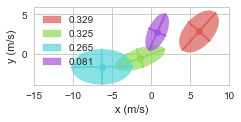

R_square    K_S Chi_square        Chi_square_2           MSE RMSE / Max  \
0    0.995  0.015   1249.683  28514296707846.742  4.359557e-08      0.012   

  RMSE / Mean  
0       0.128

R_square    K_S Chi_square        Chi_square_2           MSE RMSE / Max  \
0    0.994  0.016    999.143  23007485158474.180  4.877066e-08      0.013   

  RMSE / Mean  
0       0.135

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.315   6.169   2.823  2.557  2.687   0.525
2  0.314  -1.233  -0.498  3.359  1.606   0.625
3  0.254  -6.265  -1.722  3.682  2.210  -0.002
4  0.116   0.431   2.264  2.220  3.124   0.737

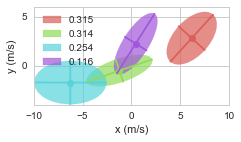

R_square    K_S Chi_square         Chi_square_2           MSE RMSE / Max  \
0    0.994  0.014   2549.062  104996050230776.609  4.959179e-08      0.013   

  RMSE / Mean  
0       0.136

R_square    K_S Chi_square        Chi_square_2           MSE RMSE / Max  \
0    0.994  0.014   1775.849  79129239425728.516  4.837821e-08      0.013   

  RMSE / Mean  
0       0.135

weight  mean_x  mean_y  sig_x  sig_y   corr
1  0.336   6.047   2.825  2.549  2.654  0.468
2  0.331  -1.518  -0.613  3.289  1.602  0.604
3  0.251  -6.467  -1.712  3.967  2.253  0.002
4  0.082   0.527   2.443  1.574  2.602  0.634

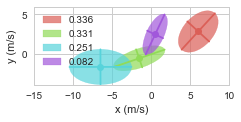

R_square    K_S Chi_square        Chi_square_2           MSE RMSE / Max  \
0    0.995  0.013   1043.181  22027915706003.113  4.571819e-08      0.012   

  RMSE / Mean  
0       0.131

R_square    K_S Chi_square        Chi_square_2           MSE RMSE / Max  \
0    0.994  0.014   1006.612  21376776783891.738  4.863157e-08      0.013   

  RMSE / Mean  
0       0.135

weight  mean_x  mean_y  sig_x  sig_y   corr
1  0.328   6.108   2.806  2.559  2.674  0.495
2  0.327  -1.477  -0.586  3.253  1.620  0.610
3  0.257  -6.318  -1.638  3.869  2.291  0.001
4  0.089   0.507   2.444  1.642  2.662  0.618

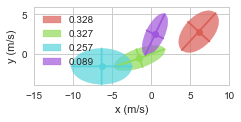

R_square    K_S Chi_square       Chi_square_2           MSE RMSE / Max  \
0    0.995  0.015    488.134  4814992246296.354  4.285983e-08      0.012   

  RMSE / Mean  
0       0.127

R_square    K_S Chi_square       Chi_square_2           MSE RMSE / Max  \
0    0.995  0.016    452.890  4257856510068.490  4.726272e-08      0.012   

  RMSE / Mean  
0       0.133

weight  mean_x  mean_y  sig_x  sig_y   corr
1  0.336   6.067   2.808  2.630  2.639  0.496
2  0.330  -1.432  -0.580  3.140  1.618  0.594
3  0.261  -6.431  -1.592  3.888  2.287  0.013
4  0.073   0.713   2.845  1.430  2.452  0.581

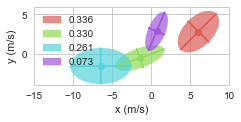

R_square    K_S Chi_square       Chi_square_2           MSE RMSE / Max  \
0    0.994  0.015    554.917  5033745227360.632  5.183966e-08      0.013   

  RMSE / Mean  
0       0.140

R_square    K_S Chi_square       Chi_square_2           MSE RMSE / Max  \
0    0.994  0.014    441.608  3954779793338.375  4.800315e-08      0.013   

  RMSE / Mean  
0       0.134


Cluster Number: 2


weight  mean_x  mean_y  sig_x  sig_y   corr
1  0.344  -1.436  -0.578  3.377  1.645  0.610
2  0.320   6.222   2.889  2.548  2.706  0.495
3  0.254  -6.230  -1.611  4.087  2.377  0.042
4  0.081   0.728   2.708  1.548  2.435  0.604

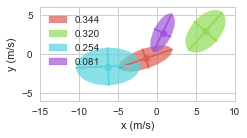

R_square    K_S Chi_square      Chi_square_2           MSE RMSE / Max  \
0    0.994  0.015    196.466  511609936630.948  5.112717e-08      0.013   

  RMSE / Mean  
0       0.139

R_square    K_S Chi_square      Chi_square_2           MSE RMSE / Max  \
0    0.994  0.012    153.634  449505384555.273  4.833744e-08      0.013   

  RMSE / Mean  
0       0.135

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.354  -1.483  -0.591  3.319  1.665   0.600
2  0.325   6.158   2.825  2.487  2.691   0.496
3  0.242  -6.432  -1.623  3.904  2.263  -0.055
4  0.079   0.693   2.706  1.526  2.301   0.579

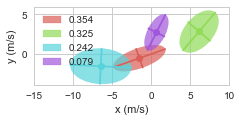

R_square    K_S Chi_square        Chi_square_2           MSE RMSE / Max  \
0    0.994  0.016    711.867  11040802200355.555  5.078545e-08      0.013   

  RMSE / Mean  
0       0.138

R_square    K_S Chi_square        Chi_square_2           MSE RMSE / Max  \
0    0.994  0.018    862.981  14546087044623.377  4.870960e-08      0.013   

  RMSE / Mean  
0       0.135

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.350  -1.431  -0.570  3.341  1.634   0.605
2  0.320   6.100   2.882  2.571  2.646   0.467
3  0.243  -6.531  -1.708  3.917  2.261  -0.003
4  0.086   0.538   2.357  1.525  2.524   0.593

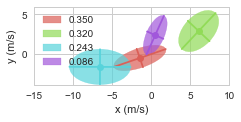

R_square    K_S Chi_square        Chi_square_2           MSE RMSE / Max  \
0    0.995  0.012    800.366  14200882925230.336  4.512056e-08      0.012   

  RMSE / Mean  
0       0.130

R_square    K_S Chi_square        Chi_square_2           MSE RMSE / Max  \
0    0.994  0.016    904.901  17002884872557.891  5.253215e-08      0.013   

  RMSE / Mean  
0       0.141

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.350  -1.558  -0.595  3.289  1.635   0.592
2  0.326   6.131   2.778  2.583  2.728   0.521
3  0.235  -6.659  -1.698  3.767  2.303  -0.071
4  0.089   0.768   2.659  1.674  2.565   0.628

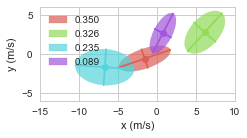

R_square    K_S Chi_square       Chi_square_2           MSE RMSE / Max  \
0    0.994  0.014    606.923  5701905374832.003  5.143793e-08      0.013   

  RMSE / Mean  
0       0.139

R_square    K_S Chi_square       Chi_square_2           MSE RMSE / Max  \
0    0.995  0.014    645.431  8253253888284.110  4.720787e-08      0.012   

  RMSE / Mean  
0       0.133

In [109]:
for cluster_num in arange(0, n_clusters_):
    print('Cluster Number:', cluster_num)
    display_num = 0
    for result in results:
        if result['cluster_num'] == cluster_num:
            display_num = display_num+1
            display(pretty_print_gmm(result['gmm']))
            fig,ax = plt.subplots(figsize=(3.5,3.5))
            plot_gmm_ellipses(result['gmm'],ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
            plt.show()

            display(gof_df(result['gmm_pdf_result'], result['kde_result'], BIN_WIDTH))
            display(gof_df(result['gmm_pdf_result'], kde_result, BIN_WIDTH))
            print('')
        if display_num == 5:
            break

## 7.2 Cross-validation, to select the number of Gaussian

In [110]:
%%time
from sklearn.model_selection import train_test_split, KFold

## 5-fold cross validation
gaussian_number_range = arange(1,6)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print('Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold) 

for number_of_gaussian in gaussian_number_range:
    print( '  ')
    print('Number of gaussian', number_of_gaussian)
    
    kf = KFold(n_splits=number_of_fold, shuffle=True) 

    CV_result = Parallel(n_jobs=-1)(delayed(fit_per_fold)(df, train_index, test_index, FIT_METHOD, number_of_gaussian, config) for train_index, test_index in kf.split(df))                        

    CV_result_train, CV_result_test = list(zip(*CV_result))
    CV_result_train, CV_result_test = list(CV_result_train), list(CV_result_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print('Train')
    pretty_pd_display(CV_result_train)
    print('Test')
    pretty_pd_display(CV_result_test)

Number of train/test dataset 25248.75 8416.25
  
Number of gaussian 1
Train


Chi_square  Chi_square_2       K_S       MSE  RMSE / Max  RMSE / Mean  \
0  3200.742457  3.411171e+15  0.056133  0.000001    0.058547     0.645643   
1  3295.011220  2.907476e+15  0.056233  0.000001    0.059794     0.636211   
2  2275.345076  3.016992e+15  0.055430  0.000001    0.060977     0.643274   
3  6110.430141  9.558177e+15  0.055035  0.000001    0.059721     0.637118   

   R_square  
0  0.871546  
1  0.874324  
2  0.872128  
3  0.874381

Test


Chi_square  Chi_square_2       K_S       MSE  RMSE / Max  RMSE / Mean  \
0  3890.274718  4.584215e+15  0.053260  0.000001    0.064949     0.636695   
1  3476.912434  4.403491e+15  0.068198  0.000001    0.062680     0.687309   
2  9325.158531  8.763492e+15  0.055979  0.000001    0.056481     0.634717   
3  3352.575324  6.966265e+15  0.051522  0.000001    0.057779     0.628660   

   R_square  
0  0.873662  
1  0.855963  
2  0.875405  
3  0.878166

  
Number of gaussian 2
Train


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  \
0  2.960469e+06  2.536093e+21  0.031485  2.779285e-07    0.029471   
1  2.058923e+07  3.314951e+23  0.028751  2.523650e-07    0.029284   
2  4.938975e+05  2.056966e+20  0.031509  2.631750e-07    0.029365   
3  5.470600e+06  7.640137e+21  0.030325  2.491844e-07    0.028633   

   RMSE / Mean  R_square  
0     0.323138  0.967917  
1     0.308098  0.970503  
2     0.314612  0.969360  
3     0.305948  0.971023

Test


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  \
0  3.991816e+05  1.140031e+20  0.028470  2.517272e-07    0.030814   
1  1.166730e+08  2.447948e+24  0.042192  3.201711e-07    0.030614   
2  3.795351e+06  1.491749e+21  0.035558  2.778999e-07    0.030060   
3  4.864481e+04  9.605554e+17  0.018232  3.187206e-07    0.031995   

   RMSE / Mean  R_square  
0     0.307848  0.970219  
1     0.346579  0.963471  
2     0.322940  0.967897  
3     0.346482  0.963046

  
Number of gaussian 3
Train


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0  3853.889529  5.947434e+14  0.021270  1.472913e-07    0.021813     0.235216   
1  2188.462985  3.224528e+14  0.019484  1.522438e-07    0.022966     0.239208   
2  5602.052658  2.089458e+15  0.019772  1.501726e-07    0.022088     0.237666   
3  5723.810446  1.726864e+15  0.020916  1.487520e-07    0.021644     0.236488   

   R_square  
0  0.982817  
1  0.982188  
2  0.982561  
3  0.982855

Test


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  \
0   1693.603003  1.865769e+14  0.024370  1.784644e-07    0.024611   
1   8289.162339  1.252756e+15  0.030920  1.786754e-07    0.022273   
2  11283.719664  6.459473e+15  0.020142  1.728323e-07    0.024009   
3   3986.093793  8.185241e+14  0.030718  1.936531e-07    0.026688   

   RMSE / Mean  R_square  
0     0.259283  0.979495  
1     0.259209  0.979675  
2     0.254642  0.979879  
3     0.269721  0.976970

  
Number of gaussian 4
Train


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0  1612.571635  4.367271e+13  0.013498  4.823978e-08    0.012524     0.134586   
1   450.553611  4.495521e+12  0.013851  4.671498e-08    0.012503     0.132570   
2  1086.568395  2.435950e+13  0.012691  4.382931e-08    0.011917     0.128391   
3   809.949167  1.408876e+13  0.015624  4.577279e-08    0.012186     0.131151   

   R_square  
0  0.994381  
1  0.994524  
2  0.994906  
3  0.994730

Test


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0   730.200457  2.106334e+13  0.022476  7.431473e-08    0.015725     0.167409   
1   807.091121  7.473091e+12  0.011607  7.854497e-08    0.015493     0.171611   
2  1779.926137  5.483011e+13  0.014697  8.480634e-08    0.016887     0.178399   
3  1160.089613  1.793682e+13  0.023746  8.032408e-08    0.016403     0.173840   

   R_square  
0  0.991428  
1  0.991108  
2  0.990155  
3  0.990405

  
Number of gaussian 5
Train


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0   642.965813  5.676436e+13  0.004732  3.067964e-08    0.010091     0.107423   
1   400.058290  6.773473e+13  0.004766  2.679942e-08    0.009231     0.100364   
2   570.079783  1.004129e+14  0.005163  2.848263e-08    0.009622     0.103415   
3  1191.183672  2.125940e+14  0.005474  3.060641e-08    0.010103     0.107291   

   R_square  
0  0.996419  
1  0.996915  
2  0.996688  
3  0.996421

Test


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  RMSE / Mean  \
0    29.677401  2.513672e+10  0.011971  5.721336e-08    0.013384     0.146511   
1  2251.862354  4.211326e+14  0.013164  7.411659e-08    0.016256     0.166936   
2   978.166762  1.230824e+14  0.007365  5.968011e-08    0.014096     0.150028   
3  1011.174780  2.136045e+14  0.010210  5.066072e-08    0.012506     0.137880   

   R_square  
0  0.993445  
1  0.991148  
2  0.993084  
3  0.994220

Wall time: 1min 38s


In [111]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print('Train gof mean, std')
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print('Test gof mean, std')
display(test_scores_mean)

Train gof mean, std


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  \
1  3.720382e+03  4.723454e+15  0.055708  1.091621e-06    0.059760   
2  7.378550e+06  8.546926e+22  0.030517  2.606632e-07    0.029188   
3  4.342054e+03  1.183380e+15  0.020360  1.496149e-07    0.022128   
4  9.899107e+02  2.165412e+13  0.013916  4.613921e-08    0.012283   
5  7.010719e+02  1.093765e+14  0.005034  2.914202e-08    0.009762   

   RMSE / Mean  R_square  
1     0.640562  0.873095  
2     0.312949  0.969701  
3     0.237145  0.982605  
4     0.131675  0.994635  
5     0.104623  0.996611

Test gof mean, std


Chi_square  Chi_square_2       K_S           MSE  RMSE / Max  \
1  5.011230e+03  6.179366e+15  0.057240  1.114525e-06    0.060472   
2  3.022903e+07  6.123887e+23  0.031113  2.921297e-07    0.030871   
3  6.313145e+03  2.179333e+15  0.026538  1.809063e-07    0.024395   
4  1.119327e+03  2.532584e+13  0.018132  7.949753e-08    0.016127   
5  1.067720e+03  1.894612e+14  0.010677  6.041770e-08    0.014060   

   RMSE / Mean  R_square  
1     0.646845  0.870799  
2     0.330962  0.966158  
3     0.260714  0.979005  
4     0.172815  0.990774  
5     0.150339  0.992974

R_square


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


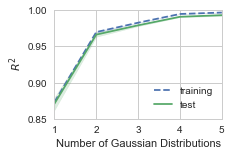

K_S


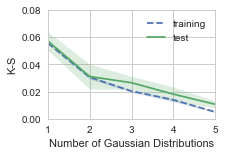

Chi_square


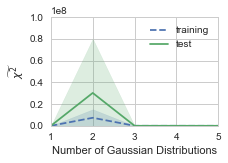

MSE


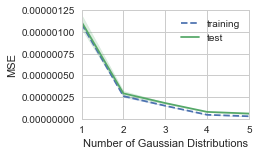

In [112]:
prop_cycle=mpl.rcParams['axes.color_cycle']
gaussian_number_range = train_scores_mean.index
for column, column_name in zip(['R_square','K_S','Chi_square','MSE'],["$\ R^2$", "K-S", "$\widetilde{\chi^2} $","MSE"]):
    plot(gaussian_number_range, train_scores_mean[column],
             '--', label = 'training', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    print(column)
    plt.locator_params(axis='y', nbins=5)
    plt_configure(xlabel='Number of Gaussian Distributions', ylabel=column_name, 
                  figsize=(3,2), legend={'loc':'best'})
    if column == 'R_square':
        plt.gca().set_ylim(top=1)
    if column == 'K_S' or column == 'Chi_square':
        plt.gca().set_ylim(bottom=0)
    plt.show()

In [113]:
# for fig in [fig_hist, fig_kde, fig_em, fig_gmm]:
#     display(fig)

In [114]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(file_path)
print(location_name)
current_file = 'GMM.ipynb'
output_file = 'D:/output_HTML/'+location_name+'.html' 

output_HTML(current_file, output_file)

cabo_de_gata
